# CRIME PREDICTION AND CLASSIFICATION OF CRIME IN NEW YORK CITY
In this part we will have the spatial analysis of the number of police stations in NYC, the count in each Borough 

# DATASET 01: RELATED TO POLICE STATIONS IN EACH BOROUGH OF NEW YORK CITY AND THEIR DISTRIBUTION

In [160]:
# Code to load the data into the dataframes
import pandas as pd
# Provide the full or relative path to your CSV file
#file_path_PoliceStationCount = r'\DataSet\PoliceStationsOfNewYorkCity.csv'
file_path_PoliceStationCount="DataSet//PoliceStationsOfNewYorkCity.csv"

# Load the dataset into a DataFrame
df_PoliceStationCount = pd.read_csv(file_path_PoliceStationCount)


In [161]:
# printing the data frame
df_PoliceStationCount 

Precinct         Phone                   Address        Borough
0     1st Precinct  212-334-0611         16 Ericsson Place      Manhattan
1     5th Precinct  212-334-0711       19 Elizabeth Street      Manhattan
2     6th Precinct  212-741-4811        233 West 10 Street      Manhattan
3     7th Precinct  212-477-7311        19 1/2 Pitt Street      Manhattan
4     9th Precinct  212-477-7811         321 East 5 Street      Manhattan
..             ...           ...                       ...            ...
72  115th Precinct  718-533-2002  92-15 Northern Boulevard         Queens
73  120th Precinct  718-876-8500       78 Richmond Terrace  Staten Island
74  121st Precinct  718-697-8700       970 Richmond Avenue  Staten Island
75  122nd Precinct  718-667-2211      2320 Hylan Boulevard  Staten Island
76  123rd Precinct  718-948-9311           116 Main Street  Staten Island

[77 rows x 4 columns]

# Step 01: Data Cleaning and Data Preprocessing

Checking for Junk Data, Missing Data or Duplicate Data

In [162]:
# Check for missing values
missing_values = df_PoliceStationCount.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = df_PoliceStationCount[df_PoliceStationCount.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Missing Values:
Precinct    0
Phone       0
Address     0
Borough     0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [Precinct, Phone, Address, Borough]
Index: []


In [163]:
! pip install --upgrade pip


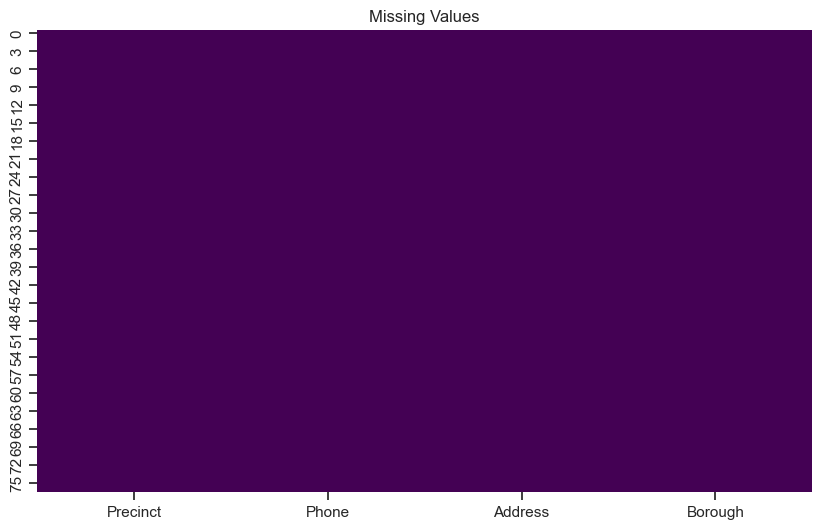

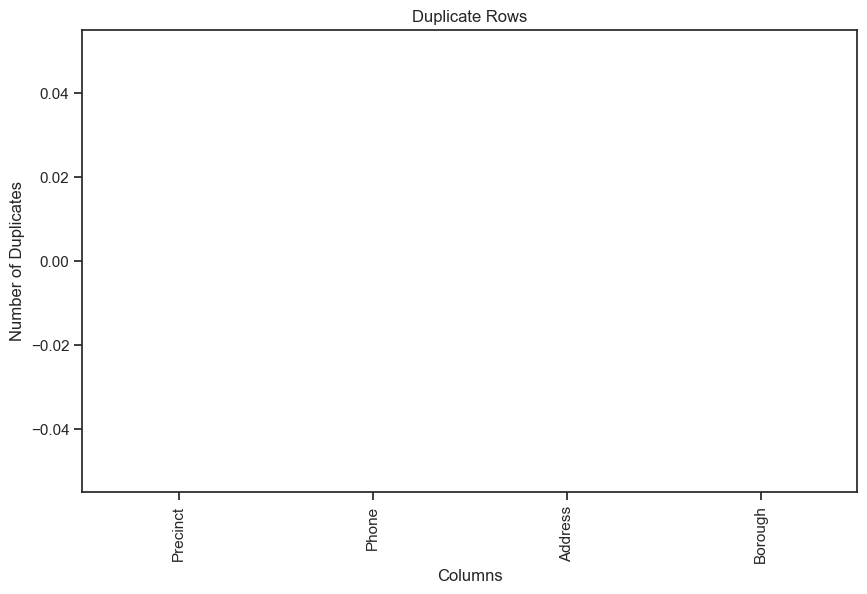

In [164]:
# The graphical representation for missing and duplicate values

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_PoliceStationCount.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()

# Visualize the number of duplicate rows in each column
duplicate_rows = df_PoliceStationCount[df_PoliceStationCount.duplicated()]
duplicate_counts = duplicate_rows.apply(lambda x: x.value_counts().get(True, 0))
plt.figure(figsize=(10, 6))
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values)
plt.xlabel("Columns")
plt.ylabel("Number of Duplicates")
plt.title("Duplicate Rows")
plt.xticks(rotation=90)
plt.show()


In [165]:
# Check the data types of columns
data_types = df_PoliceStationCount.dtypes
print("Data Types:")
print(data_types)

Data Types:
Precinct    object
Phone       object
Address     object
Borough     object
dtype: object


Analysis on Step 01 data cleaning and Data analysis is that there is no JUNK or MISSING or DUPLICATE ROWS 

# Step 02:-  EDA on the dataset about the police station dataset

01.  Summary Statistics for "Precinct" and "Borough":

In [166]:
# Summary statistics for "Precinct" and "Borough"
summary_precinct = df_PoliceStationCount['Precinct'].describe()
summary_borough = df_PoliceStationCount['Borough'].describe()
print("Summary Statistics for Precinct:")
print(summary_precinct)
print("\nSummary Statistics for Borough:")
print(summary_borough)


Summary Statistics for Precinct:
count               77
unique              77
top       1st Precinct
freq                 1
Name: Precinct, dtype: object

Summary Statistics for Borough:
count           77
unique           5
top       Brooklyn
freq            23
Name: Borough, dtype: object


2. Categorical Analysis for "Borough":

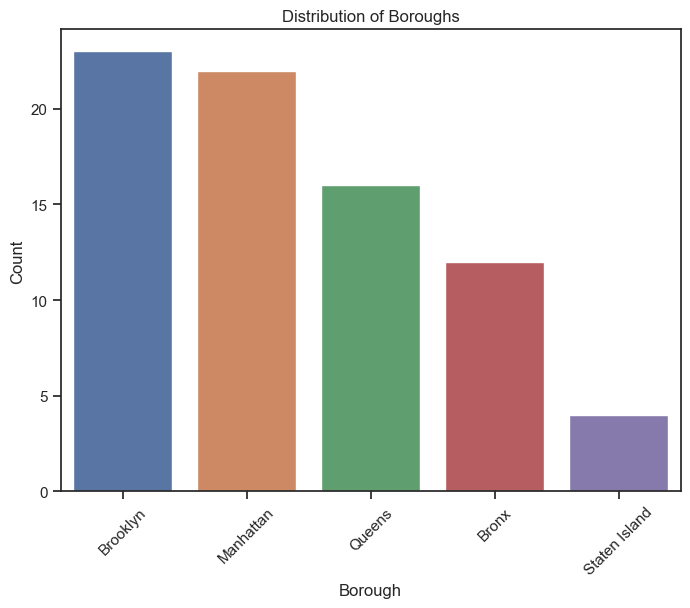

In [167]:
# Categorical analysis for "Borough"
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df_PoliceStationCount, x='Borough', order=df_PoliceStationCount['Borough'].value_counts().index)
plt.title("Distribution of Boroughs")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


3. Cross-tabulations:

In [168]:
# Cross-tabulation of "Borough" and "Precinct"
cross_tab = pd.crosstab(df_PoliceStationCount['Borough'], df_PoliceStationCount['Precinct'])
print("Cross-tabulation of Borough and Precinct:")
print(cross_tab)


Cross-tabulation of Borough and Precinct:
Precinct       100th Precinct  101st Precinct  102nd Precinct  103rd Precinct  \
Borough                                                                         
Bronx                       0               0               0               0   
Brooklyn                    0               0               0               0   
Manhattan                   0               0               0               0   
Queens                      1               1               1               1   
Staten Island               0               0               0               0   

Precinct       104th Precinct  105th Precinct  106th Precinct  107th Precinct  \
Borough                                                                         
Bronx                       0               0               0               0   
Brooklyn                    0               0               0               0   
Manhattan                   0               0               0     

4. Geospatial Analysis

In [169]:
! pip install geopy

! pip install folium --upgrade
! pip install markupsafe --upgrade




In [170]:
! pip install geopandas
! pip install shapely

In [171]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from geopy.exc import GeocoderTimedOut

# Initialize geocoder with timeout
geolocator = Nominatim(user_agent="geospatial_analysis", timeout=10)

# Geocode addresses and create a GeoDataFrame with retries
geometry = []

for index, row in df_PoliceStationCount.iterrows():
    location = None
    retries = 3  # Define the number of retries

    for _ in range(retries):
        try:
            location = geolocator.geocode(row["Address"])
            if location:
                break
        except GeocoderTimedOut:
            pass

    if location:
        geometry.append(Point(location.longitude, location.latitude))
    else:
        geometry.append(None)

df_PoliceStationCount["geometry"] = geometry
gdf = gpd.GeoDataFrame(df_PoliceStationCount, geometry="geometry")


In [172]:
print(gdf.head())
first_geometry = gdf.at[0, 'geometry']
area = gdf.at[0, 'geometry'].area


       Precinct         Phone              Address    Borough  \
0  1st Precinct  212-334-0611    16 Ericsson Place  Manhattan   
1  5th Precinct  212-334-0711  19 Elizabeth Street  Manhattan   
2  6th Precinct  212-741-4811   233 West 10 Street  Manhattan   
3  7th Precinct  212-477-7311   19 1/2 Pitt Street  Manhattan   
4  9th Precinct  212-477-7811    321 East 5 Street  Manhattan   

                     geometry  
0  POINT (-74.00835 40.72060)  
1  POINT (-73.99749 40.71619)  
2  POINT (-95.39937 29.78983)  
3  POINT (-73.98377 40.71629)  
4  POINT (-95.38987 29.78019)  


In [173]:
from shapely.geometry import Point

# Create a Point object for a specific location
point = Point(-74.0060, 40.7128)

# Check if the point is within any of the precinct polygons
for index, row in gdf.iterrows():
    if point.within(row['geometry']):
        print(f"The point is within {row['Precinct']}")


In [174]:
# oad the NYC precincts GeoJSON data

import geopandas as gpd

# Load the NYC precincts GeoJSON data
gdf_nyc_precincts = gpd.read_file("D:\\NCI\\NCISEM3\\Project\\nyc_precincts.geojson")


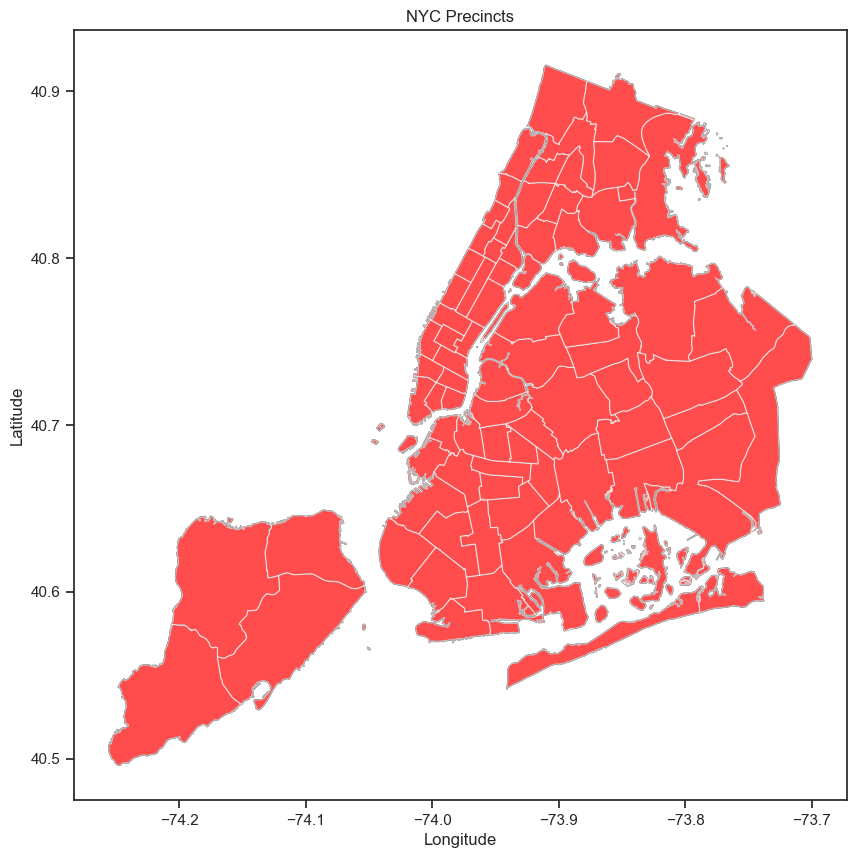

In [175]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a base map of NYC
world = gdf_nyc_precincts
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot the precincts on the map
gdf_nyc_precincts.plot(ax=ax, color='red', alpha=0.7)

# Set labels
ax.set_title("NYC Precincts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the map
plt.show()


Creating a new column by merging Address and Borough as AddressBorough

In [176]:

# Join the "Address" and "Borough" columns and create a new column "AddressBorough"
df_PoliceStationCount['AddressBorough'] = df_PoliceStationCount['Address'] + ', ' + df_PoliceStationCount['Borough']

# Print the DataFrame to view the result
print(df_PoliceStationCount)
# Convert the "AddressBorough" column to a NumPy array
address_borough_array = df_PoliceStationCount['AddressBorough'].to_numpy()



          Precinct         Phone                   Address        Borough  \
0     1st Precinct  212-334-0611         16 Ericsson Place      Manhattan   
1     5th Precinct  212-334-0711       19 Elizabeth Street      Manhattan   
2     6th Precinct  212-741-4811        233 West 10 Street      Manhattan   
3     7th Precinct  212-477-7311        19 1/2 Pitt Street      Manhattan   
4     9th Precinct  212-477-7811         321 East 5 Street      Manhattan   
..             ...           ...                       ...            ...   
72  115th Precinct  718-533-2002  92-15 Northern Boulevard         Queens   
73  120th Precinct  718-876-8500       78 Richmond Terrace  Staten Island   
74  121st Precinct  718-697-8700       970 Richmond Avenue  Staten Island   
75  122nd Precinct  718-667-2211      2320 Hylan Boulevard  Staten Island   
76  123rd Precinct  718-948-9311           116 Main Street  Staten Island   

                                        geometry  \
0                 POINT

In [177]:
# Print the array
print(address_borough_array)

['16 Ericsson Place, Manhattan' '19 Elizabeth Street, Manhattan'
 '233 West 10 Street, Manhattan' '19 1/2 Pitt Street, Manhattan'
 '321 East 5 Street, Manhattan' '230 West 20th Street, Manhattan'
 '230 East 21st Street, Manhattan' '357 West 35th Street, Manhattan'
 '167 East 51st Street, Manhattan' '306 West 54th Street, Manhattan'
 '153 East 67th Street, Manhattan' '120 West 82nd Street, Manhattan'
 '86th St & Transverse Road, Manhattan' '164 East 102nd Street, Manhattan'
 '151 West 100th Street, Manhattan' '120 East 119th Street, Manhattan'
 '520 West 126th Street, Manhattan' '2271-89 8th Avenue, Manhattan'
 '451 West 151st Street, Manhattan' '250 West 135th Street, Manhattan'
 '2207 Amsterdam Avenue, Manhattan' '4295 Broadway, Manhattan'
 '257 Alexander Avenue, Bronx' '1035 Longwood Avenue, Bronx'
 '830 Washington Avenue, Bronx' '900 Fteley Avenue, Bronx'
 '2 East 169th Street, Bronx' '2877 Barkley Avenue, Bronx'
 '2120 Ryer Avenue, Bronx' '4111 Laconia Avenue, Bronx'
 '450 Cross Br

In [178]:
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="nyc_geocoding")

coordinates = []
for address in address_borough_array:
    location = geolocator.geocode(address)
    if location:
        coordinates.append((location.latitude, location.longitude))
    else:
        coordinates.append(None)

# coordinates now contains (latitude, longitude) for each address


In [179]:
#Save the map as an HTML file or display it in a Jupyter Notebook

import folium

# Create a base map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add markers for each address
for coord in coordinates:
    if coord:
        folium.Marker(coord).add_to(nyc_map)

# Save the map as an HTML file or display it in a Jupyter Notebook
nyc_map.save("nyc_address_map.html")


# DATASET 02: RELATED TO POPULATION OF EACH BORORUGH THEIR LAND AREA AND THE GDP OF EACH BORORUGH

In [180]:
# Code to load the data into the dataframes
import pandas as pd
# Provide the full or relative path to your CSV file
file_path_PopulationAreaWithGDP="DataSet//PopulationAreaWithGDP.csv"

# Load the dataset into a DataFrame
df_PopulationAreaWithGDP = pd.read_csv(file_path_PopulationAreaWithGDP)

In [181]:
df_PopulationAreaWithGDP

Borough    County Census (2020)  square (miles)  square (km)  \
0      The Bronx     Bronx     14,72,654            42.2        109.3   
1       Brooklyn     Kings     27,36,074            69.4        179.7   
2      Manhattan  New York     16,94,251            22.7         58.8   
3         Queens    Queens     24,05,464           108.7        281.5   
4  Staten Island  Richmond      4,95,747            57.5        148.9   

  people/  sq. mile people/ sq. km billions GDP (2012 US$) 2  
0            34,920                  13,482          $38.726  
1            39,438                  15,227          $92.300  
2            74,781                  28,872         $651.619  
3            22,125                   8,542          $88.578  
4             8,618                   3,327          $14.806

SINCE THERE ARE ONLY 5 VALUES AND THEY DO NOT NEED TO BE CLEANED OR TRANSFORMED

Text(0.5, 1.0, 'Census (2020) Distribution')

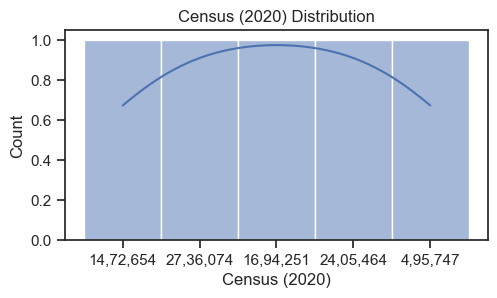

In [182]:
# Data Distribution Plots
plt.figure(figsize=(12, 6))

# Histogram of Census (2020)
plt.subplot(2, 2, 1)
sns.histplot(df_PopulationAreaWithGDP['Census (2020)'], bins=20, kde=True)
plt.title('Census (2020) Distribution')

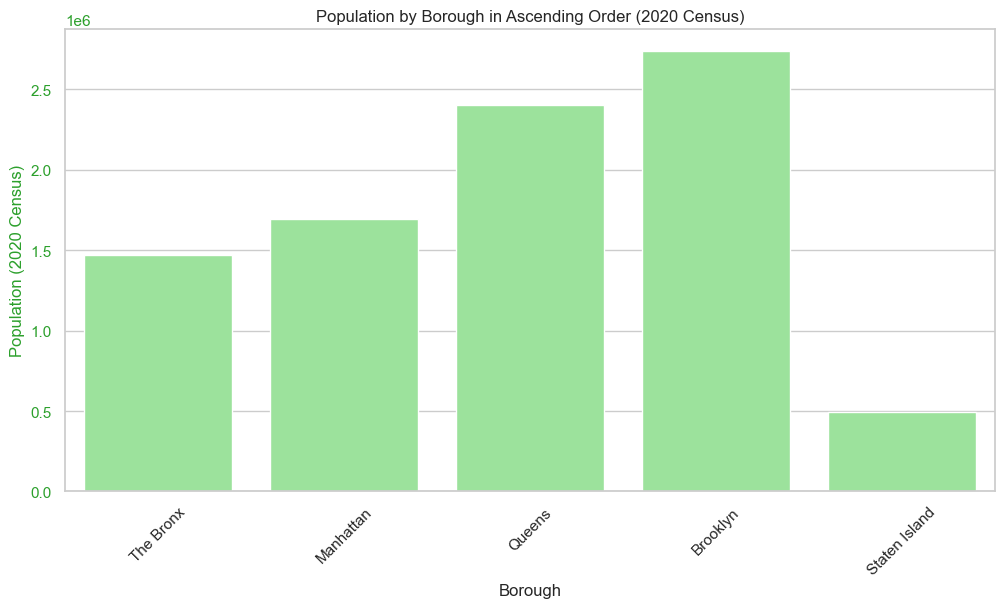

In [183]:
# Sort the data by population in ascending order
df = df_PopulationAreaWithGDP.sort_values('Census (2020)')

# Convert 'Census (2020)' to a numeric type
df['Census (2020)'] = df['Census (2020)'].str.replace(',', '').astype(int)

# Set the plotting style
sns.set(style="whitegrid")

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Borough', y='Census (2020)', color='lightgreen', label='Population (2020 Census)')
ax.set_xlabel('Borough')
ax.set_ylabel('Population (2020 Census)', color='tab:green')

# Customize the appearance and legend
ax.tick_params(axis='y', labelcolor='tab:green')

# Set the title
ax.set_title('Population by Borough in Ascending Order (2020 Census)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

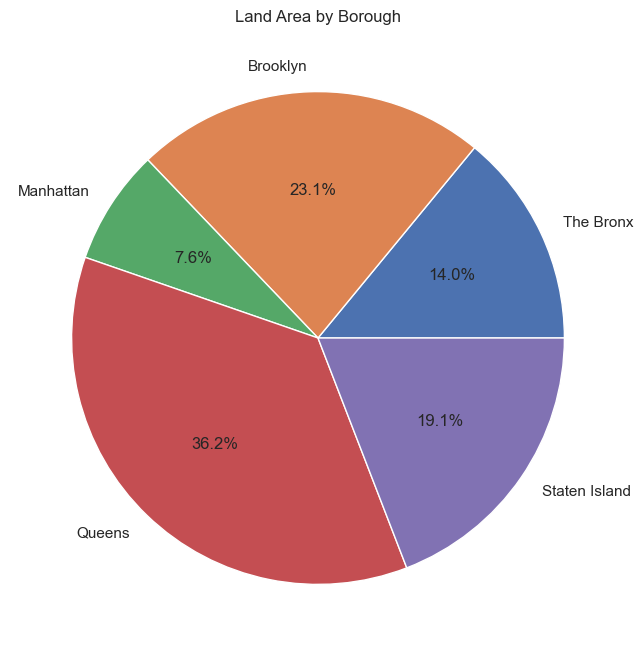

In [184]:
# Find the borough with the maximum land area
max_land_borough = df_PopulationAreaWithGDP[df_PopulationAreaWithGDP["square (miles)"] == df_PopulationAreaWithGDP["square (miles)"].max()]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_PopulationAreaWithGDP["square (miles)"], labels=df_PopulationAreaWithGDP["Borough"], autopct='%1.1f%%')
plt.title("Land Area by Borough")
plt.show()

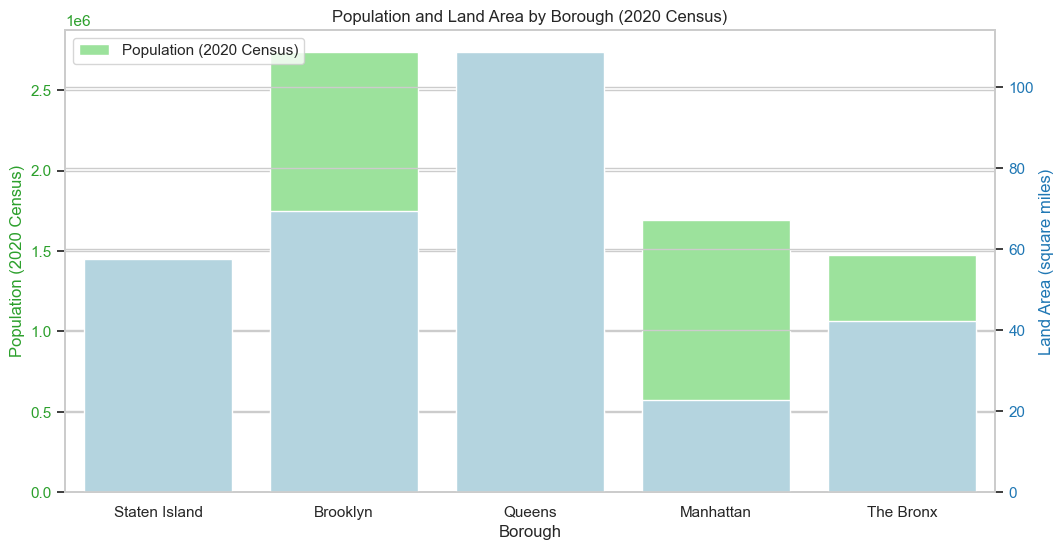

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sort the data by population in descending order
df = df_PopulationAreaWithGDP.sort_values('Census (2020)', ascending=False)

# Convert 'Census (2020)' to a numeric type
df['Census (2020)'] = df['Census (2020)'].str.replace(',', '').astype(int)

# Set the plotting style
sns.set(style="whitegrid")

# Create a barplot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='Borough', y='Census (2020)', color='lightgreen', label='Population (2020 Census)')
ax.set_xlabel('Borough')
ax.set_ylabel('Population (2020 Census)', color='tab:green')

# Create a second y-axis for land area
ax2 = ax.twinx()
sns.barplot(data=df, x='Borough', y='square (miles)', color='lightblue', ax=ax2, label='Land Area (square miles)')
ax2.set_ylabel('Land Area (square miles)', color='tab:blue')

# Customize the appearance and legend
ax.tick_params(axis='y', labelcolor='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Set the title
ax.set_title('Population and Land Area by Borough (2020 Census)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add the legend
ax.legend(loc='upper left')

# Display the plot
plt.show()


# DATASET 03: The dataset appears to contain information related to reported complaints, including details such as complaint date and time, location, crime description, suspect information, and victim demographics, with potential links to law enforcement and jurisdiction.

In [186]:
! pip install chart-studio

In [187]:
nRowsRead = None

In [188]:


# Code to load the data into the dataframes
import pandas as pd
# Provide the full or relative path to your CSV file
file_path_NYPD_Complaint_Data_Historic="DataSet//CrimeNYC.csv"

# Load the dataset into a DataFrame
df_NYPD_Complaint_Data_Historic = pd.read_csv(file_path_NYPD_Complaint_Data_Historic,
                                            delimiter=',', dtype={'CMPLNT_NUM' : 'int64', 'CMPLNT_FR_DT' : 'string', 'CMPLNT_FR_TM' : 'string', 'CMPLNT_TO_DT' : 'string', 'CMPLNT_TO_TM' : 'string', 
                                                                  'ADDR_PCT_CD' : 'string', 'RPT_DT' : 'string', 'KY_CD' : 'int64', 'OFNS_DESC' : 'string', 'PD_CD' : 'float64', 'PD_DESC' : 'string', 
                                                                  'CRM_ATPT_CPTD_CD' : 'string', 'LAW_CAT_CD' : 'string', 'BORO_NM' : 'string', 'LOC_OF_OCCUR_DESC' : 'string', 'PREM_TYP_DESC' : 'string', 
                                                                  'JURIS_DESC' : 'string', 'JURISDICTION_CODE' : 'float64', 'PARKS_NM' : 'string', 'HADEVELOPT' : 'string', 'HOUSING_PSA' : 'string', 
                                                                  'X_COORD_CD' : 'float64', 'Y_COORD_CD' : 'float64', 'SUSP_AGE_GROUP' : 'string', 'SUSP_RACE' : 'string', 'SUSP_SEX' : 'string', 
                                                                  'TRANSIT_DISTRICT' : 'string', 'Latitude' : 'float64', 'Longitude' : 'float64', 'Lat_Lon' : 'string', 'PATROL_BORO' : 'string', 
                                                                  'STATION_NAME' : 'string', 'VIC_AGE_GROUP' : 'string', 'VIC_RACE' : 'string', 'VIC_SEX' : 'string'},
                                                                    nrows=nRowsRead)
nRow, nCol = df_NYPD_Complaint_Data_Historic.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1048575 rows and 35 columns


In [189]:
# Create a backup of the original DataFrame
df_NYPD_Complaint_Data_Historic_UpdatedBackup = df_NYPD_Complaint_Data_Historic.copy()
df_NYPD_Complaint_Data_Historic_UpdatedBackup.head(10)

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM ADDR_PCT_CD  \
0   325341655   02-11-2015     15:00:00         <NA>         <NA>          73   
1   393816841   03/17/2012     10:30:00   03/17/2012     11:00:00          69   
2   802896158   10/27/2016     13:48:00   11-03-2016     13:49:00          71   
3   633812343   11/27/2014     19:00:00   11/27/2014     22:30:00         112   
4   300349533   12-11-2013     13:30:00   12-11-2013     14:15:00          24   
5   944253539   08/28/2013     11:00:00   08/28/2013     11:30:00          63   
6   608679532   12-04-2013     18:30:00   12-04-2013     18:40:00         101   
7   882178622   09/14/2013     08:40:00   09/14/2013     08:40:00          49   
8   240183498   01/31/2013     23:47:00         <NA>         <NA>          40   
9   895680254   09/17/2016     00:05:00   09/17/2016     00:15:00          60   

       RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ... SUSP_SEX  \
0  02-11-2015    359  OFFENSES AGAINST PUBLIC ADMINI  749.0  ...        M   
1  03/17/2012    344    ASSAULT 3 & RELATED OFFENSES  114.0  ...     <NA>   
2  11-03-2016    578                   HARRASSMENT 2  638.0  ...        M   
3  11/28/2014    104                            RAPE  157.0  ...        M   
4  12-12-2013    109                   GRAND LARCENY  438.0  ...     <NA>   
5  08/28/2013    341                   PETIT LARCENY  333.0  ...     <NA>   
6  12-05-2013    361   OFF. AGNST PUB ORD SENSBLTY &  639.0  ...        F   
7  09/14/2013    578                   HARRASSMENT 2  638.0  ...        M   
8  01/31/2013    352               CRIMINAL TRESPASS  205.0  ...     <NA>   
9  09/17/2016    351  CRIMINAL MISCHIEF & RELATED OF  259.0  ...        M   

  TRANSIT_DISTRICT   Latitude  Longitude                        Lat_Lon  \
0             <NA>  40.664239 -73.908425  (40.664239422, -73.908425011)   
1             <NA>  40.644590 -73.892672  (40.644589618, -73.892672426)   
2             <NA>  40.658758 -73.942435  (40.658758183, -73.942434788)   
3             <NA>  40.722364 -73.851474  (40.722363687, -73.851473894)   
4             <NA>  40.793465 -73.968950  (40.793464597, -73.968949638)   
5             <NA>  40.625320 -73.917874  (40.625319998, -73.917873518)   
6             <NA>  40.600172 -73.756663  (40.600171728, -73.756663063)   
7             <NA>  40.851041 -73.861441  (40.851041106, -73.861441322)   
8             <NA>  40.805504 -73.916477  (40.805504347, -73.916477252)   
9             <NA>  40.572501 -73.999098  (40.572500982, -73.999097946)   

                PATROL_BORO STATION_NAME  VIC_AGE_GROUP        VIC_RACE  \
0   PATROL BORO BKLYN NORTH         <NA>            <18           BLACK   
1   PATROL BORO BKLYN SOUTH         <NA>          45-64           BLACK   
2   PATROL BORO BKLYN SOUTH         <NA>          18-24           BLACK   
3  PATROL BORO QUEENS NORTH         <NA>          25-44           WHITE   
4     PATROL BORO MAN NORTH         <NA>          45-64           WHITE   
5   PATROL BORO BKLYN SOUTH         <NA>           <NA>         UNKNOWN   
6  PATROL BORO QUEENS SOUTH         <NA>          45-64           BLACK   
7         PATROL BORO BRONX         <NA>          25-44  WHITE HISPANIC   
8         PATROL BORO BRONX         <NA>           <NA>         UNKNOWN   
9   PATROL BORO BKLYN SOUTH         <NA>          25-44           BLACK   

  VIC_SEX  
0       M  
1       F  
2       M  
3       F  
4       F  
5       D  
6       F  
7       F  
8       E  
9       F  

[10 rows x 35 columns]

In [190]:
# Printing the information about the columns in the dataset

df_NYPD_Complaint_Data_Historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048402 non-null  string 
 2   CMPLNT_FR_TM       1048559 non-null  string 
 3   CMPLNT_TO_DT       727459 non-null   string 
 4   CMPLNT_TO_TM       728449 non-null   string 
 5   ADDR_PCT_CD        1048050 non-null  string 
 6   RPT_DT             1048575 non-null  string 
 7   KY_CD              1048575 non-null  int64  
 8   OFNS_DESC          1044372 non-null  string 
 9   PD_CD              1047714 non-null  float64
 10  PD_DESC            1047714 non-null  string 
 11  CRM_ATPT_CPTD_CD   1048572 non-null  string 
 12  LAW_CAT_CD         1048575 non-null  string 
 13  BORO_NM            1045995 non-null  string 
 14  LOC_OF_OCCUR_DESC  812380 non-null   string 
 15  PREM_TYP_DESC      1041104 non-n

In [191]:
# Printing the number of data present in the data set

df_NYPD_Complaint_Data_Historic.count()

CMPLNT_NUM           1048575
CMPLNT_FR_DT         1048402
CMPLNT_FR_TM         1048559
CMPLNT_TO_DT          727459
CMPLNT_TO_TM          728449
ADDR_PCT_CD          1048050
RPT_DT               1048575
KY_CD                1048575
OFNS_DESC            1044372
PD_CD                1047714
PD_DESC              1047714
CRM_ATPT_CPTD_CD     1048572
LAW_CAT_CD           1048575
BORO_NM              1045995
LOC_OF_OCCUR_DESC     812380
PREM_TYP_DESC        1041104
JURIS_DESC           1048575
JURISDICTION_CODE    1047714
PARKS_NM                 153
HADEVELOPT             51468
HOUSING_PSA            79987
X_COORD_CD           1044025
Y_COORD_CD           1044025
SUSP_AGE_GROUP        146188
SUSP_RACE             422753
SUSP_SEX              377554
TRANSIT_DISTRICT       21703
Latitude             1044025
Longitude            1044025
Lat_Lon              1044025
PATROL_BORO          1047633
STATION_NAME           21703
VIC_AGE_GROUP         699341
VIC_RACE             1048472
VIC_SEX       

In [192]:
df_NYPD_Complaint_Data_Historic.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM ADDR_PCT_CD  \
0   325341655   02-11-2015     15:00:00         <NA>         <NA>          73   
1   393816841   03/17/2012     10:30:00   03/17/2012     11:00:00          69   
2   802896158   10/27/2016     13:48:00   11-03-2016     13:49:00          71   
3   633812343   11/27/2014     19:00:00   11/27/2014     22:30:00         112   
4   300349533   12-11-2013     13:30:00   12-11-2013     14:15:00          24   

       RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ... SUSP_SEX  \
0  02-11-2015    359  OFFENSES AGAINST PUBLIC ADMINI  749.0  ...        M   
1  03/17/2012    344    ASSAULT 3 & RELATED OFFENSES  114.0  ...     <NA>   
2  11-03-2016    578                   HARRASSMENT 2  638.0  ...        M   
3  11/28/2014    104                            RAPE  157.0  ...        M   
4  12-12-2013    109                   GRAND LARCENY  438.0  ...     <NA>   

  TRANSIT_DISTRICT   Latitude  Longitude                        Lat_Lon  \
0             <NA>  40.664239 -73.908425  (40.664239422, -73.908425011)   
1             <NA>  40.644590 -73.892672  (40.644589618, -73.892672426)   
2             <NA>  40.658758 -73.942435  (40.658758183, -73.942434788)   
3             <NA>  40.722364 -73.851474  (40.722363687, -73.851473894)   
4             <NA>  40.793465 -73.968950  (40.793464597, -73.968949638)   

                PATROL_BORO STATION_NAME  VIC_AGE_GROUP VIC_RACE VIC_SEX  
0   PATROL BORO BKLYN NORTH         <NA>            <18    BLACK       M  
1   PATROL BORO BKLYN SOUTH         <NA>          45-64    BLACK       F  
2   PATROL BORO BKLYN SOUTH         <NA>          18-24    BLACK       M  
3  PATROL BORO QUEENS NORTH         <NA>          25-44    WHITE       F  
4     PATROL BORO MAN NORTH         <NA>          45-64    WHITE       F  

[5 rows x 35 columns]

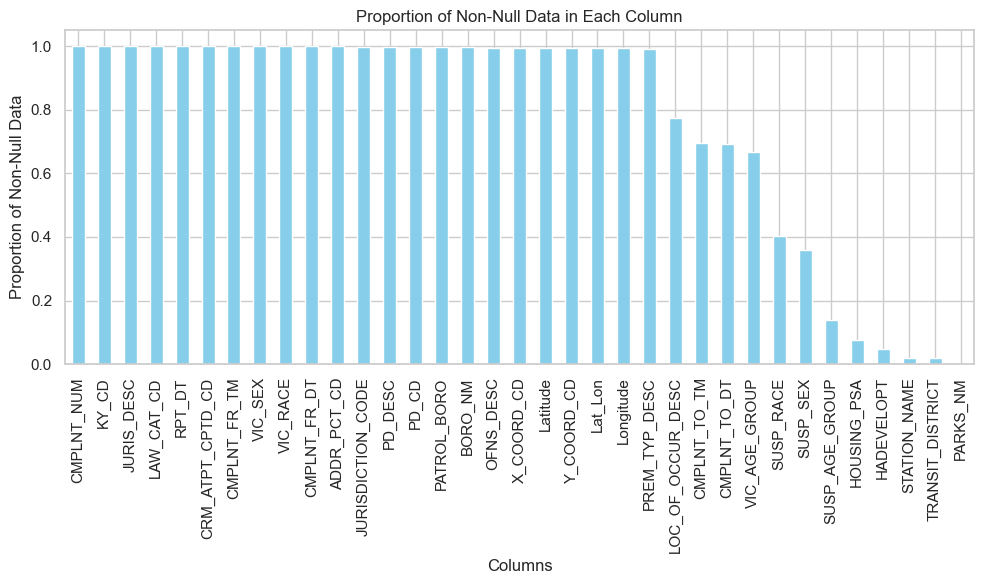

CMPLNT_NUM            0.000000
CMPLNT_FR_DT          0.016499
CMPLNT_FR_TM          0.001526
CMPLNT_TO_DT         30.624037
CMPLNT_TO_TM         30.529624
ADDR_PCT_CD           0.050068
RPT_DT                0.000000
KY_CD                 0.000000
OFNS_DESC             0.400830
PD_CD                 0.082111
PD_DESC               0.082111
CRM_ATPT_CPTD_CD      0.000286
LAW_CAT_CD            0.000000
BORO_NM               0.246048
LOC_OF_OCCUR_DESC    22.525332
PREM_TYP_DESC         0.712491
JURIS_DESC            0.000000
JURISDICTION_CODE     0.082111
PARKS_NM             99.985409
HADEVELOPT           95.091624
HOUSING_PSA          92.371838
X_COORD_CD            0.433922
Y_COORD_CD            0.433922
SUSP_AGE_GROUP       86.058413
SUSP_RACE            59.683094
SUSP_SEX             63.993610
TRANSIT_DISTRICT     97.930239
Latitude              0.433922
Longitude             0.433922
Lat_Lon               0.433922
PATROL_BORO           0.089836
STATION_NAME         97.930239
VIC_AGE_

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Calculate the proportion of non-null data in each column
non_null_proportions = (df_NYPD_Complaint_Data_Historic.count() / len(df_NYPD_Complaint_Data_Historic)).sort_values(ascending=False)

# Create a bar chart to visualize the proportions
plt.figure(figsize=(10, 6))
non_null_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Non-Null Data in Each Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Non-Null Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the chart
plt.show()


import pandas as pd

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Calculate the percentage of missing data in each column
missing_percentage = (df_NYPD_Complaint_Data_Historic.isnull().mean() * 100)


# Display the columns
print(missing_percentage)


# STEP 01: Data cleaning and Data Preprocessing

Assiging the right data type for the data columns, Making some mathematical trandformation, removing Null values, NaN values and Junk values from the dataset

1.1 Categorise the correct data type

In [194]:
df_NYPD_Complaint_Data_Historic.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM ADDR_PCT_CD  \
0   325341655   02-11-2015     15:00:00         <NA>         <NA>          73   
1   393816841   03/17/2012     10:30:00   03/17/2012     11:00:00          69   
2   802896158   10/27/2016     13:48:00   11-03-2016     13:49:00          71   
3   633812343   11/27/2014     19:00:00   11/27/2014     22:30:00         112   
4   300349533   12-11-2013     13:30:00   12-11-2013     14:15:00          24   

       RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ... SUSP_SEX  \
0  02-11-2015    359  OFFENSES AGAINST PUBLIC ADMINI  749.0  ...        M   
1  03/17/2012    344    ASSAULT 3 & RELATED OFFENSES  114.0  ...     <NA>   
2  11-03-2016    578                   HARRASSMENT 2  638.0  ...        M   
3  11/28/2014    104                            RAPE  157.0  ...        M   
4  12-12-2013    109                   GRAND LARCENY  438.0  ...     <NA>   

  TRANSIT_DISTRICT   Latitude  Longitude                        Lat_Lon  \
0             <NA>  40.664239 -73.908425  (40.664239422, -73.908425011)   
1             <NA>  40.644590 -73.892672  (40.644589618, -73.892672426)   
2             <NA>  40.658758 -73.942435  (40.658758183, -73.942434788)   
3             <NA>  40.722364 -73.851474  (40.722363687, -73.851473894)   
4             <NA>  40.793465 -73.968950  (40.793464597, -73.968949638)   

                PATROL_BORO STATION_NAME  VIC_AGE_GROUP VIC_RACE VIC_SEX  
0   PATROL BORO BKLYN NORTH         <NA>            <18    BLACK       M  
1   PATROL BORO BKLYN SOUTH         <NA>          45-64    BLACK       F  
2   PATROL BORO BKLYN SOUTH         <NA>          18-24    BLACK       M  
3  PATROL BORO QUEENS NORTH         <NA>          25-44    WHITE       F  
4     PATROL BORO MAN NORTH         <NA>          45-64    WHITE       F  

[5 rows x 35 columns]

1.2 Removing the Missing values

In [195]:
# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Calculate the proportion of non-null data in each column
non_null_proportions = (df_NYPD_Complaint_Data_Historic.count() / len(df_NYPD_Complaint_Data_Historic)).sort_values(ascending=False)

# Display the proportions
print(non_null_proportions)

CMPLNT_NUM           1.000000
KY_CD                1.000000
JURIS_DESC           1.000000
LAW_CAT_CD           1.000000
RPT_DT               1.000000
CRM_ATPT_CPTD_CD     0.999997
CMPLNT_FR_TM         0.999985
VIC_SEX              0.999903
VIC_RACE             0.999902
CMPLNT_FR_DT         0.999835
ADDR_PCT_CD          0.999499
JURISDICTION_CODE    0.999179
PD_DESC              0.999179
PD_CD                0.999179
PATROL_BORO          0.999102
BORO_NM              0.997540
OFNS_DESC            0.995992
X_COORD_CD           0.995661
Latitude             0.995661
Y_COORD_CD           0.995661
Lat_Lon              0.995661
Longitude            0.995661
PREM_TYP_DESC        0.992875
LOC_OF_OCCUR_DESC    0.774747
CMPLNT_TO_TM         0.694704
CMPLNT_TO_DT         0.693760
VIC_AGE_GROUP        0.666944
SUSP_RACE            0.403169
SUSP_SEX             0.360064
SUSP_AGE_GROUP       0.139416
HOUSING_PSA          0.076282
HADEVELOPT           0.049084
STATION_NAME         0.020698
TRANSIT_DI

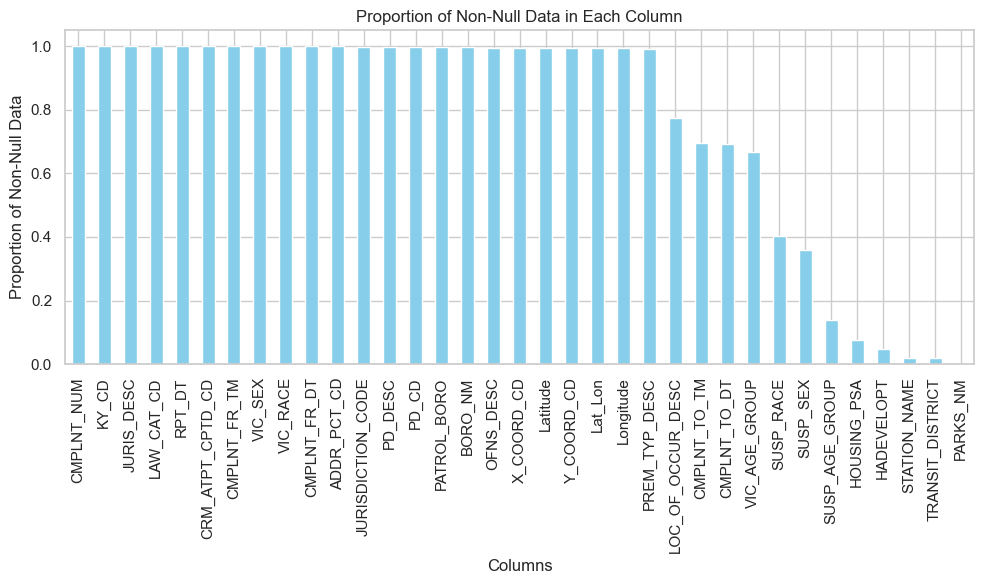

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Calculate the proportion of non-null data in each column
non_null_proportions = (df_NYPD_Complaint_Data_Historic.count() / len(df_NYPD_Complaint_Data_Historic)).sort_values(ascending=False)

# Create a bar chart to visualize the proportions
plt.figure(figsize=(10, 6))
non_null_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Non-Null Data in Each Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Non-Null Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the chart
plt.show()




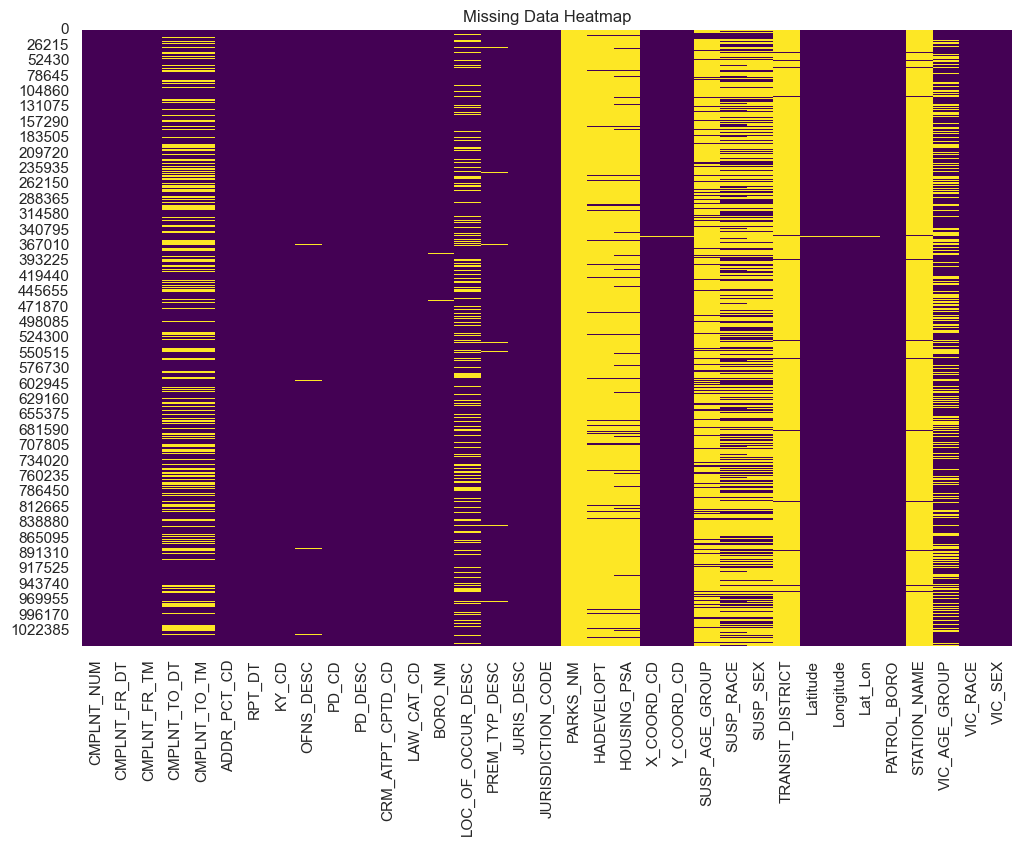

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Generate a matrix of Boolean values indicating the presence of missing values
missing_data_matrix = df_NYPD_Complaint_Data_Historic.isnull()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data_matrix, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [198]:

import pandas as pd

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Calculate the percentage of missing data in each column
missing_percentage = (df_NYPD_Complaint_Data_Historic.isnull().mean() * 100)


# Display the columns
print(missing_percentage)


CMPLNT_NUM            0.000000
CMPLNT_FR_DT          0.016499
CMPLNT_FR_TM          0.001526
CMPLNT_TO_DT         30.624037
CMPLNT_TO_TM         30.529624
ADDR_PCT_CD           0.050068
RPT_DT                0.000000
KY_CD                 0.000000
OFNS_DESC             0.400830
PD_CD                 0.082111
PD_DESC               0.082111
CRM_ATPT_CPTD_CD      0.000286
LAW_CAT_CD            0.000000
BORO_NM               0.246048
LOC_OF_OCCUR_DESC    22.525332
PREM_TYP_DESC         0.712491
JURIS_DESC            0.000000
JURISDICTION_CODE     0.082111
PARKS_NM             99.985409
HADEVELOPT           95.091624
HOUSING_PSA          92.371838
X_COORD_CD            0.433922
Y_COORD_CD            0.433922
SUSP_AGE_GROUP       86.058413
SUSP_RACE            59.683094
SUSP_SEX             63.993610
TRANSIT_DISTRICT     97.930239
Latitude              0.433922
Longitude             0.433922
Lat_Lon               0.433922
PATROL_BORO           0.089836
STATION_NAME         97.930239
VIC_AGE_

In [199]:
! pip install plotly


In [200]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# Calculate the percentage of missing data in each column
missing_percentage = (df_NYPD_Complaint_Data_Historic.isnull().mean() * 100)

# Sort columns by missing percentage in ascending order
columns_sorted_by_missing = missing_percentage.sort_values(ascending=True)

# Calculate the percentiles of missing data manually
percentiles = (columns_sorted_by_missing.rank(ascending=False) / len(columns_sorted_by_missing))

# Create hover text with formatted percentiles as numbers
hover_text = percentiles.map(lambda x: f'{x:.2%}')

# Create a heatmap with hover text
fig = go.Figure(data=go.Heatmap(
    z=[percentiles],
    x=percentiles.index,
    y=["Percentile"],
    hoverinfo='x+y+z+text',
    text=hover_text,
    colorscale='Viridis',
    colorbar=dict(title='Percentile')
))

fig.update_layout(
    title='Missing Data Percentiles Heatmap',
    xaxis=dict(side='top')
)

fig.show()


1.3 Removing Unwanted Columns

Missing Values in df_NYPD_Complaint_Data_Historic:
         CMPLNT_NUM  CMPLNT_FR_DT  CMPLNT_FR_TM  CMPLNT_TO_DT  CMPLNT_TO_TM  \
0             False         False         False          True          True   
1             False         False         False         False         False   
2             False         False         False         False         False   
3             False         False         False         False         False   
4             False         False         False         False         False   
...             ...           ...           ...           ...           ...   
1048570       False         False         False         False         False   
1048571       False         False         False          True          True   
1048572       False         False         False         False         False   
1048573       False         False         False         False         False   
1048574       False         False         False         False         False   



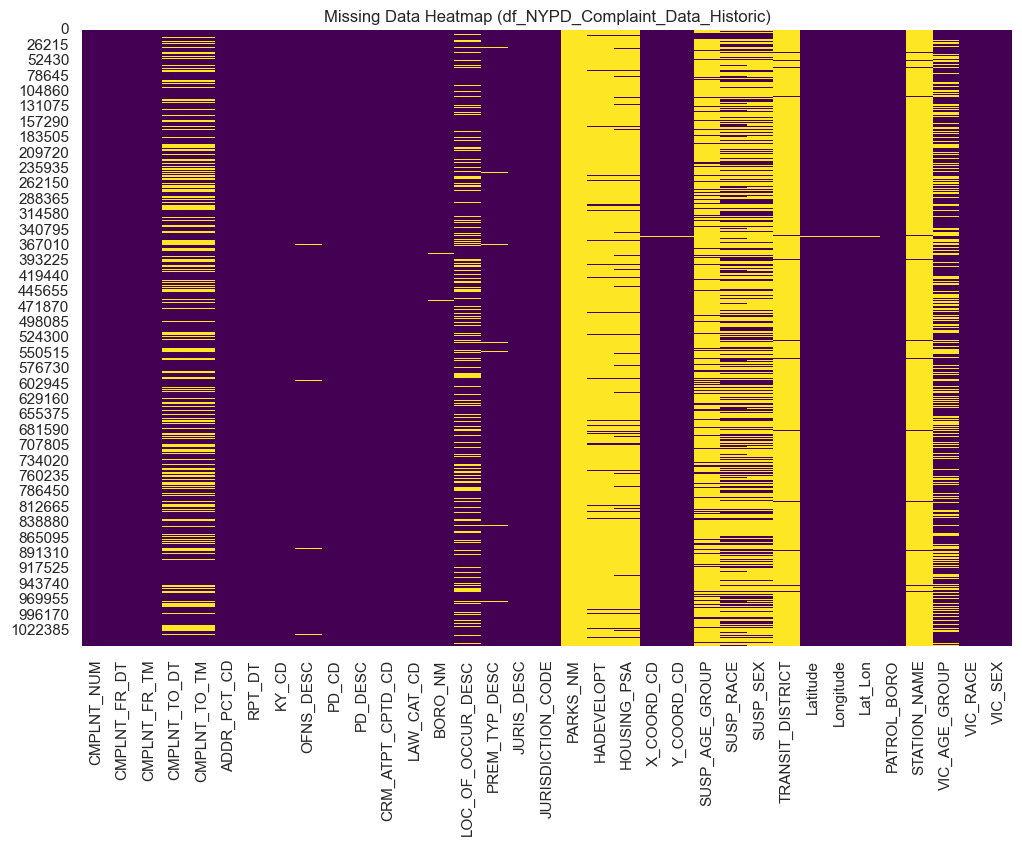

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Calculate missing values
missing_values = df_NYPD_Complaint_Data_Historic.isnull()

# Print missing values (True for missing, False for non-missing)
print("Missing Values in df_NYPD_Complaint_Data_Historic:")
print(missing_values)

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (df_NYPD_Complaint_Data_Historic)')
plt.show()


In [202]:
import pandas as pd

# Assuming you have a DataFrame df_NYPD_Complaint_Data_Historic
# You can load your data if you haven't already

# List of columns to move to a new DataFrame
columns_to_move = [
    'PARKS_NM',
    'HADEVELOPT',
    'HOUSING_PSA',
    'TRANSIT_DISTRICT',
    'STATION_NAME',
    'SUSP_AGE_GROUP'
]

# Create a new DataFrame with the specified columns
new_df = df_NYPD_Complaint_Data_Historic[columns_to_move]

# Remove the specified columns from the original DataFrame
df_NYPD_Complaint_Data_Historic.drop(columns=columns_to_move, inplace=True)

# Display the new DataFrame (new_df) and the modified original DataFrame (df_NYPD_Complaint_Data_Historic)
print("New DataFrame:")
print(new_df)

print("\nModified Original DataFrame:")
print(df_NYPD_Complaint_Data_Historic)


New DataFrame:
        PARKS_NM HADEVELOPT HOUSING_PSA TRANSIT_DISTRICT STATION_NAME  \
0           <NA>     TILDEN         405             <NA>         <NA>   
1           <NA>       <NA>        <NA>             <NA>         <NA>   
2           <NA>       <NA>        <NA>             <NA>         <NA>   
3           <NA>       <NA>        <NA>             <NA>         <NA>   
4           <NA>       <NA>        <NA>             <NA>         <NA>   
...          ...        ...         ...              ...          ...   
1048570     <NA>       <NA>         365             <NA>         <NA>   
1048571     <NA>       <NA>        <NA>             <NA>         <NA>   
1048572     <NA>       <NA>        <NA>             <NA>         <NA>   
1048573     <NA>       <NA>        <NA>             <NA>         <NA>   
1048574     <NA>       <NA>        <NA>             <NA>         <NA>   

        SUSP_AGE_GROUP  
0                25-44  
1                 <NA>  
2                  <18  
3       

In [203]:
df_NYPD_Complaint_Data_Historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048402 non-null  string 
 2   CMPLNT_FR_TM       1048559 non-null  string 
 3   CMPLNT_TO_DT       727459 non-null   string 
 4   CMPLNT_TO_TM       728449 non-null   string 
 5   ADDR_PCT_CD        1048050 non-null  string 
 6   RPT_DT             1048575 non-null  string 
 7   KY_CD              1048575 non-null  int64  
 8   OFNS_DESC          1044372 non-null  string 
 9   PD_CD              1047714 non-null  float64
 10  PD_DESC            1047714 non-null  string 
 11  CRM_ATPT_CPTD_CD   1048572 non-null  string 
 12  LAW_CAT_CD         1048575 non-null  string 
 13  BORO_NM            1045995 non-null  string 
 14  LOC_OF_OCCUR_DESC  812380 non-null   string 
 15  PREM_TYP_DESC      1041104 non-n

In [204]:
import pandas as pd

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Calculate the count of missing data in each column
missing_count = df_NYPD_Complaint_Data_Historic.isnull().sum()

# Display the count of missing data for each column
print("Count of Missing Data in df_NYPD_Complaint_Data_Historic:")
print(missing_count)


Count of Missing Data in df_NYPD_Complaint_Data_Historic:
CMPLNT_NUM                0
CMPLNT_FR_DT            173
CMPLNT_FR_TM             16
CMPLNT_TO_DT         321116
CMPLNT_TO_TM         320126
ADDR_PCT_CD             525
RPT_DT                    0
KY_CD                     0
OFNS_DESC              4203
PD_CD                   861
PD_DESC                 861
CRM_ATPT_CPTD_CD          3
LAW_CAT_CD                0
BORO_NM                2580
LOC_OF_OCCUR_DESC    236195
PREM_TYP_DESC          7471
JURIS_DESC                0
JURISDICTION_CODE       861
X_COORD_CD             4550
Y_COORD_CD             4550
SUSP_RACE            625822
SUSP_SEX             671021
Latitude               4550
Longitude              4550
Lat_Lon                4550
PATROL_BORO             942
VIC_AGE_GROUP        349234
VIC_RACE                103
VIC_SEX                 102
dtype: int64


1. Applying "Mean" to these columns with missing values ADDR_PCT_CD, X_COORD_CD, Y_COORD_CD, SUSP_AGE_GROUP, Latitude, Longitude, Lat_Lon, VIC_AGE_GROUP.
2. Applying "Not Available" to these columns with missing values OFNS_DESC,PD_DESC, CRM_ATPT_CPTD_CD, PREM_TYP_DESC, SUSP_SEX, VIC_RACE,  VIC_SEX
3. Applying "Zero" to these columns with missing values PD_CD, JURISDICTION_CODE 
4. Applying "Bororugh Name not available" to these columns with missing values BORO_NM, PATROL_BORO 
5. Handle 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM'
'CMPLNT_FR_DT' with '1900-01-01'
'CMPLNT_FR_TM' with '00:00:00'
'CMPLNT_TO_DT'with '1900-01-01'
'CMPLNT_TO_TM'with '00:00:00'

 6. Handle 'ADDR_PCT_CD'
'ADDR_PCT_CD' with -1



In [205]:
import pandas as pd

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Identify numeric columns for which you can calculate the mean
numeric_columns = df_NYPD_Complaint_Data_Historic.select_dtypes(include=[float, int]).columns

# Convert the identified numeric columns to float data type
df_NYPD_Complaint_Data_Historic[numeric_columns] = df_NYPD_Complaint_Data_Historic[numeric_columns].astype(float)

# Apply "Mean" to numeric columns
df_NYPD_Complaint_Data_Historic[numeric_columns] = df_NYPD_Complaint_Data_Historic[numeric_columns].fillna(df_NYPD_Complaint_Data_Historic[numeric_columns].mean())

# Display the DataFrame
print(df_NYPD_Complaint_Data_Historic)


          CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0        325341655.0   02-11-2015     15:00:00         <NA>         <NA>   
1        393816841.0   03/17/2012     10:30:00   03/17/2012     11:00:00   
2        802896158.0   10/27/2016     13:48:00   11-03-2016     13:49:00   
3        633812343.0   11/27/2014     19:00:00   11/27/2014     22:30:00   
4        300349533.0   12-11-2013     13:30:00   12-11-2013     14:15:00   
...              ...          ...          ...          ...          ...   
1048570  668010856.0   12/17/2009     19:35:00   12/17/2009     19:40:00   
1048571  280168491.0   06-04-2009     16:30:00         <NA>         <NA>   
1048572  353690161.0   11/16/2009     14:15:00   11/16/2009     14:30:00   
1048573  613308429.0   02/18/2010     19:05:00   02/18/2010     19:18:00   
1048574  642178371.0   05/23/2006     00:00:00   05/23/2006     00:48:00   

        ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
0     

In [206]:
df_NYPD_Complaint_Data_Historic.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0  325341655.0   02-11-2015     15:00:00         <NA>         <NA>   
1  393816841.0   03/17/2012     10:30:00   03/17/2012     11:00:00   
2  802896158.0   10/27/2016     13:48:00   11-03-2016     13:49:00   
3  633812343.0   11/27/2014     19:00:00   11/27/2014     22:30:00   
4  300349533.0   12-11-2013     13:30:00   12-11-2013     14:15:00   

  ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ...  \
0          73  02-11-2015  359.0  OFFENSES AGAINST PUBLIC ADMINI  749.0  ...   
1          69  03/17/2012  344.0    ASSAULT 3 & RELATED OFFENSES  114.0  ...   
2          71  11-03-2016  578.0                   HARRASSMENT 2  638.0  ...   
3         112  11/28/2014  104.0                            RAPE  157.0  ...   
4          24  12-12-2013  109.0                   GRAND LARCENY  438.0  ...   

  Y_COORD_CD       SUSP_RACE SUSP_SEX   Latitude  Longitude  \
0   181287.0           BLACK        M  40.664239 -73.908425   
1   174133.0            <NA>     <NA>  40.644590 -73.892672   
2   179282.0           BLACK        M  40.658758 -73.942435   
3   202485.0  WHITE HISPANIC        M  40.722364 -73.851474   
4   228356.0            <NA>     <NA>  40.793465 -73.968950   

                         Lat_Lon               PATROL_BORO  VIC_AGE_GROUP  \
0  (40.664239422, -73.908425011)   PATROL BORO BKLYN NORTH            <18   
1  (40.644589618, -73.892672426)   PATROL BORO BKLYN SOUTH          45-64   
2  (40.658758183, -73.942434788)   PATROL BORO BKLYN SOUTH          18-24   
3  (40.722363687, -73.851473894)  PATROL BORO QUEENS NORTH          25-44   
4  (40.793464597, -73.968949638)     PATROL BORO MAN NORTH          45-64   

   VIC_RACE  VIC_SEX  
0     BLACK        M  
1     BLACK        F  
2     BLACK        M  
3     WHITE        F  
4     WHITE        F  

[5 rows x 29 columns]

In [207]:
import pandas as pd

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Define the columns and their respective fill values
columns_to_fill = {
    'ADDR_PCT_CD': 'mean',
    'X_COORD_CD': 'mean',
    'Y_COORD_CD': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Lat_Lon': 'mean',
    'VIC_AGE_GROUP': 'mean',
    'OFNS_DESC': 'Unknown',
    'PD_DESC': 'Unknown',
    'CRM_ATPT_CPTD_CD': 'Unknown',
    'PREM_TYP_DESC': 'Unknown',
    'SUSP_SEX': 'Unknown',
    'VIC_RACE': 'Unknown',
    'VIC_SEX': 'Unknown',
    'PD_CD': 0,
    'JURISDICTION_CODE': 0,
    'BORO_NM': 'Borough Name not available',
    'PATROL_BORO': 'Borough Name not available',
    'CMPLNT_FR_DT': 'Unknown',
    'CMPLNT_FR_TM':'Unknown',
    'CMPLNT_TO_DT':'Unknown',
    'CMPLNT_TO_TM': 'Unknown',
    'LOC_OF_OCCUR_DESC': 'Unknown',
    'SUSP_RACE':'Unknown',


}

# Loop through columns and apply fill values
for column, fill_value in columns_to_fill.items():
    if fill_value == 'mean' and column in df_NYPD_Complaint_Data_Historic.select_dtypes(include=[float, int]).columns:
        df_NYPD_Complaint_Data_Historic[column] = df_NYPD_Complaint_Data_Historic[column].fillna(df_NYPD_Complaint_Data_Historic[column].mean())
    else:
        df_NYPD_Complaint_Data_Historic[column] = df_NYPD_Complaint_Data_Historic[column].fillna(fill_value)

# Display the DataFrame
print(df_NYPD_Complaint_Data_Historic)


          CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0        325341655.0   02-11-2015     15:00:00      Unknown      Unknown   
1        393816841.0   03/17/2012     10:30:00   03/17/2012     11:00:00   
2        802896158.0   10/27/2016     13:48:00   11-03-2016     13:49:00   
3        633812343.0   11/27/2014     19:00:00   11/27/2014     22:30:00   
4        300349533.0   12-11-2013     13:30:00   12-11-2013     14:15:00   
...              ...          ...          ...          ...          ...   
1048570  668010856.0   12/17/2009     19:35:00   12/17/2009     19:40:00   
1048571  280168491.0   06-04-2009     16:30:00      Unknown      Unknown   
1048572  353690161.0   11/16/2009     14:15:00   11/16/2009     14:30:00   
1048573  613308429.0   02/18/2010     19:05:00   02/18/2010     19:18:00   
1048574  642178371.0   05/23/2006     00:00:00   05/23/2006     00:48:00   

        ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
0     

In [208]:
import pandas as pd
import numpy as np
from dateutil.parser import parse


# Function to parse date with inferred format
def parse_date(date_str):
    try:
        return parse(date_str)
    except ValueError:
        return pd.NaT  # Return Not-a-Time for unparseable dates

# Convert columns with both date and time
for column in ['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT']:
    df_NYPD_Complaint_Data_Historic[column] = df_NYPD_Complaint_Data_Historic[column].apply(parse_date)

# Handle time columns (no date)
time_format = "%H:%M:%S"
for column in ['CMPLNT_FR_TM', 'CMPLNT_TO_TM']:
    df_NYPD_Complaint_Data_Historic[column] = df_NYPD_Complaint_Data_Historic[column].apply(lambda x: pd.to_datetime(x, format=time_format, errors='coerce'))

# Handle non-integer values in 'ADDR_PCT_CD'
# Fill NaN values in 'ADDR_PCT_CD' with a specific integer value (e.g., -1)
df_NYPD_Complaint_Data_Historic['ADDR_PCT_CD'].fillna(-1, inplace=True)

# Convert 'ADDR_PCT_CD' to an integer data type, handling non-integer values separately
df_NYPD_Complaint_Data_Historic['ADDR_PCT_CD'] = pd.to_numeric(df_NYPD_Complaint_Data_Historic['ADDR_PCT_CD'], errors='coerce').astype(pd.Int32Dtype())

# Replace non-finite values in 'JURISDICTION_CODE' with -1
df_NYPD_Complaint_Data_Historic['JURISDICTION_CODE'].replace([np.nan, np.inf, -np.inf], -1, inplace=True)

# Convert 'JURISDICTION_CODE' to an integer data type
df_NYPD_Complaint_Data_Historic['JURISDICTION_CODE'] = df_NYPD_Complaint_Data_Historic['JURISDICTION_CODE'].astype(int)

# Specify the data types for the remaining columns
data_types = {
    'CMPLNT_NUM': int,
    'KY_CD': int,
    'OFNS_DESC': str,
    'PD_CD': int,
    'PD_DESC': str,
    'CRM_ATPT_CPTD_CD': str,
    'LAW_CAT_CD': str,
    'BORO_NM': str,
    'LOC_OF_OCCUR_DESC': str,
    'PREM_TYP_DESC': str,
    'JURIS_DESC': str,
    'JURISDICTION_CODE': int,
    'X_COORD_CD': int,
    'Y_COORD_CD': int,
    'SUSP_RACE': str,
    'SUSP_SEX': str,
    'Latitude': float,
    'Longitude': float,
    'Lat_Lon': str,
    'PATROL_BORO': str,
    'VIC_AGE_GROUP': str,
    'VIC_RACE': str,
    'VIC_SEX': str
}

# Apply the data type conversions using astype()
df_NYPD_Complaint_Data_Historic = df_NYPD_Complaint_Data_Historic.astype(data_types)

# Create a new DataFrame with the updated data types
df_NYPD_Complaint_Data_Historic_updated = df_NYPD_Complaint_Data_Historic

# Specify the path where you want to save the updated DataFrame to a new CSV file
output_csv_path = "DataSet//NYPD_Complaint_Data_Historic_DTupdated_dataset.csv"

# Write the updated DataFrame to a new CSV file
df_NYPD_Complaint_Data_Historic_updated.to_csv(output_csv_path, index=False)

# Display the first few rows of the updated DataFrame
df_NYPD_Complaint_Data_Historic_updated.head()


CMPLNT_NUM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_DT  \
0   325341655   2015-02-11 1900-01-01 15:00:00          NaT   
1   393816841   2012-03-17 1900-01-01 10:30:00   2012-03-17   
2   802896158   2016-10-27 1900-01-01 13:48:00   2016-11-03   
3   633812343   2014-11-27 1900-01-01 19:00:00   2014-11-27   
4   300349533   2013-12-11 1900-01-01 13:30:00   2013-12-11   

         CMPLNT_TO_TM  ADDR_PCT_CD     RPT_DT  KY_CD  \
0                 NaT           73 2015-02-11    359   
1 1900-01-01 11:00:00           69 2012-03-17    344   
2 1900-01-01 13:49:00           71 2016-11-03    578   
3 1900-01-01 22:30:00          112 2014-11-28    104   
4 1900-01-01 14:15:00           24 2013-12-12    109   

                        OFNS_DESC  PD_CD  ... Y_COORD_CD       SUSP_RACE  \
0  OFFENSES AGAINST PUBLIC ADMINI    749  ...     181287           BLACK   
1    ASSAULT 3 & RELATED OFFENSES    114  ...     174133         Unknown   
2                   HARRASSMENT 2    638  ...     179282           BLACK   
3                            RAPE    157  ...     202485  WHITE HISPANIC   
4                   GRAND LARCENY    438  ...     228356         Unknown   

  SUSP_SEX   Latitude  Longitude                        Lat_Lon  \
0        M  40.664239 -73.908425  (40.664239422, -73.908425011)   
1  Unknown  40.644590 -73.892672  (40.644589618, -73.892672426)   
2        M  40.658758 -73.942435  (40.658758183, -73.942434788)   
3        M  40.722364 -73.851474  (40.722363687, -73.851473894)   
4  Unknown  40.793465 -73.968950  (40.793464597, -73.968949638)   

                PATROL_BORO  VIC_AGE_GROUP  VIC_RACE  VIC_SEX  
0   PATROL BORO BKLYN NORTH            <18     BLACK        M  
1   PATROL BORO BKLYN SOUTH          45-64     BLACK        F  
2   PATROL BORO BKLYN SOUTH          18-24     BLACK        M  
3  PATROL BORO QUEENS NORTH          25-44     WHITE        F  
4     PATROL BORO MAN NORTH          45-64     WHITE        F  

[5 rows x 29 columns]

In [209]:
import pandas as pd

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame with fill values applied
# You can load your data if you haven't already

# Count missing values in each column
missing_count = df_NYPD_Complaint_Data_Historic.isnull().sum()

# Display the count of missing data for each column
print("Count of Missing Data After Filling:")
print(missing_count)


Count of Missing Data After Filling:
CMPLNT_NUM                0
CMPLNT_FR_DT            173
CMPLNT_FR_TM             16
CMPLNT_TO_DT         321116
CMPLNT_TO_TM         320593
ADDR_PCT_CD             525
RPT_DT                    0
KY_CD                     0
OFNS_DESC                 0
PD_CD                     0
PD_DESC                   0
CRM_ATPT_CPTD_CD          0
LAW_CAT_CD                0
BORO_NM                   0
LOC_OF_OCCUR_DESC         0
PREM_TYP_DESC             0
JURIS_DESC                0
JURISDICTION_CODE         0
X_COORD_CD                0
Y_COORD_CD                0
SUSP_RACE                 0
SUSP_SEX                  0
Latitude                  0
Longitude                 0
Lat_Lon                   0
PATROL_BORO               0
VIC_AGE_GROUP             0
VIC_RACE                  0
VIC_SEX                   0
dtype: int64


In [210]:
# Handle 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM'
df_NYPD_Complaint_Data_Historic['CMPLNT_FR_DT'].fillna('1900-01-01', inplace=True)
df_NYPD_Complaint_Data_Historic['CMPLNT_FR_TM'].fillna('00:00:00', inplace=True)
df_NYPD_Complaint_Data_Historic['CMPLNT_TO_DT'].fillna('1900-01-01', inplace=True)
df_NYPD_Complaint_Data_Historic['CMPLNT_TO_TM'].fillna('00:00:00', inplace=True)

# Handle 'ADDR_PCT_CD'
df_NYPD_Complaint_Data_Historic['ADDR_PCT_CD'].fillna(-1, inplace=True)


In [211]:
import pandas as pd

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame with fill values applied
# You can load your data if you haven't already

# Count missing values in each column
missing_count = df_NYPD_Complaint_Data_Historic.isnull().sum()

# Display the count of missing data for each column
print("Count of Missing Data After Filling:")
print(missing_count)


Count of Missing Data After Filling:
CMPLNT_NUM           0
CMPLNT_FR_DT         0
CMPLNT_FR_TM         0
CMPLNT_TO_DT         0
CMPLNT_TO_TM         0
ADDR_PCT_CD          0
RPT_DT               0
KY_CD                0
OFNS_DESC            0
PD_CD                0
PD_DESC              0
CRM_ATPT_CPTD_CD     0
LAW_CAT_CD           0
BORO_NM              0
LOC_OF_OCCUR_DESC    0
PREM_TYP_DESC        0
JURIS_DESC           0
JURISDICTION_CODE    0
X_COORD_CD           0
Y_COORD_CD           0
SUSP_RACE            0
SUSP_SEX             0
Latitude             0
Longitude            0
Lat_Lon              0
PATROL_BORO          0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
dtype: int64


1.4 To Check Duplicates in the dataframe

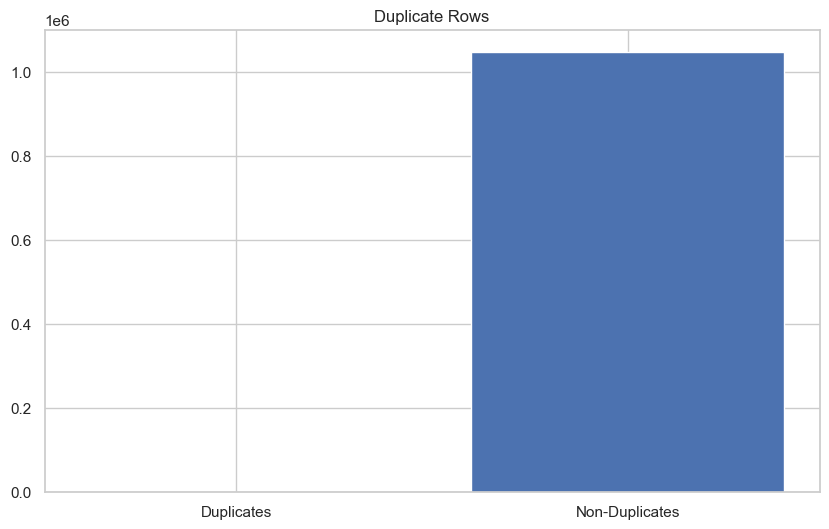

Number of duplicate rows: 0
Sample duplicate rows:
Empty DataFrame
Columns: [CMPLNT_NUM, CMPLNT_FR_DT, CMPLNT_FR_TM, CMPLNT_TO_DT, CMPLNT_TO_TM, ADDR_PCT_CD, RPT_DT, KY_CD, OFNS_DESC, PD_CD, PD_DESC, CRM_ATPT_CPTD_CD, LAW_CAT_CD, BORO_NM, LOC_OF_OCCUR_DESC, PREM_TYP_DESC, JURIS_DESC, JURISDICTION_CODE, X_COORD_CD, Y_COORD_CD, SUSP_RACE, SUSP_SEX, Latitude, Longitude, Lat_Lon, PATROL_BORO, VIC_AGE_GROUP, VIC_RACE, VIC_SEX]
Index: []

[0 rows x 29 columns]


In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Define the columns for checking duplicates
columns_to_check = [
    'CMPLNT_NUM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
    'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC',
    'JURIS_DESC', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD',
     'SUSP_SEX', 'Latitude', 'Longitude', 'Lat_Lon',
    'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'
]

# Check for duplicates based on the specified columns
duplicates = df_NYPD_Complaint_Data_Historic[df_NYPD_Complaint_Data_Historic.duplicated(subset=columns_to_check, keep=False)]

# Plot the duplicates
plt.figure(figsize=(10, 6))
plt.title("Duplicate Rows")
duplicates_count = duplicates.shape[0]
plt.bar(['Duplicates', 'Non-Duplicates'], [duplicates_count, len(df_NYPD_Complaint_Data_Historic) - duplicates_count])
plt.show()

# Display information about the duplicate rows
print("Number of duplicate rows:", duplicates_count)
print("Sample duplicate rows:")
print(duplicates.head())


1.5 To Check for outliers and also plot them

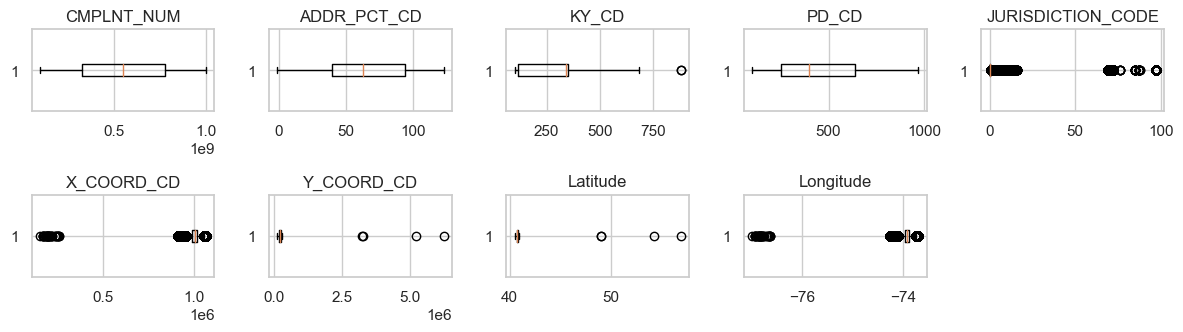

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Select numeric columns for outlier detection
numeric_columns = df_NYPD_Complaint_Data_Historic.select_dtypes(include=['number'])

# Create subplots to display box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df_NYPD_Complaint_Data_Historic[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


1.6 Normalization and Standardization of Data

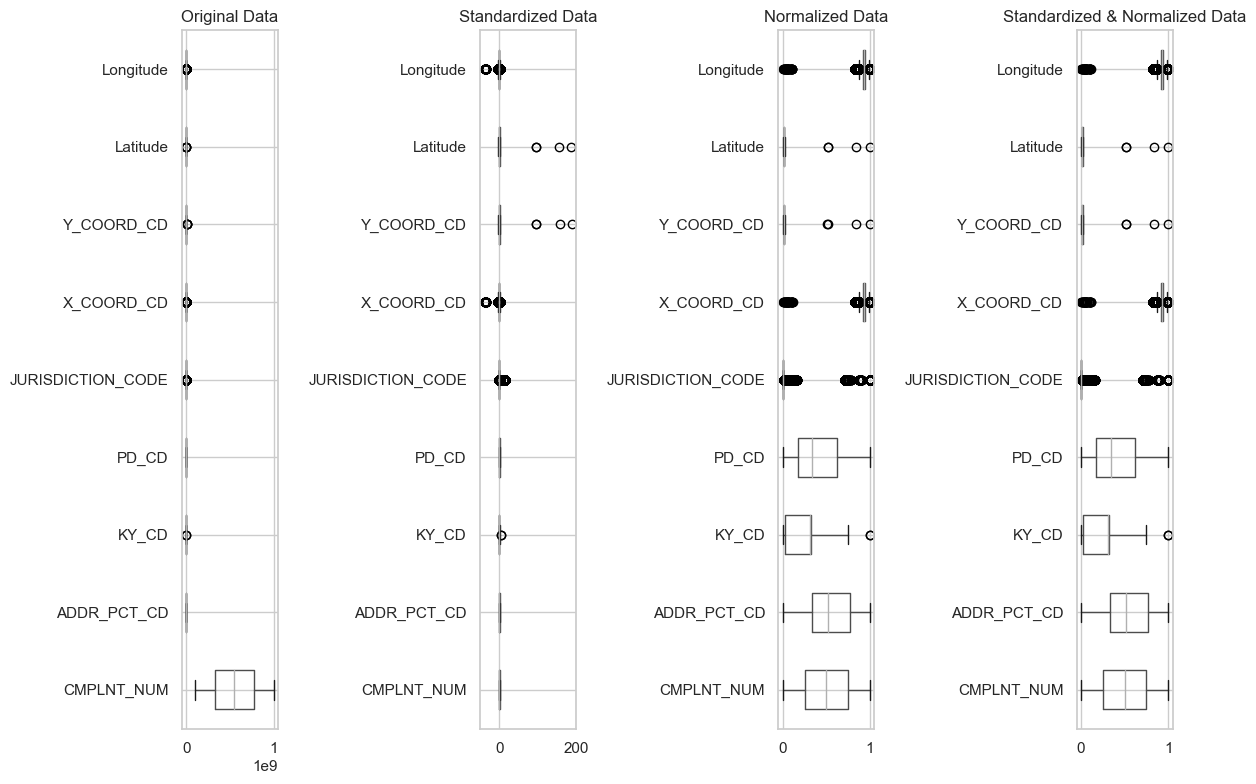

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have the df_NYPD_Complaint_Data_Historic DataFrame
# You can load your data if you haven't already

# Select the numeric columns to be standardized and normalized
numeric_columns = df_NYPD_Complaint_Data_Historic.select_dtypes(include=['number'])

# Create a copy of the original DataFrame for visualization
df_original = numeric_columns.copy()

# Create a StandardScaler for standardization
scaler_standardization = StandardScaler()
df_NYPD_Complaint_Standardized = scaler_standardization.fit_transform(numeric_columns)
df_NYPD_Complaint_Standardized = pd.DataFrame(df_NYPD_Complaint_Standardized, columns=numeric_columns.columns)

# Create a MinMaxScaler for normalization
scaler_normalization = MinMaxScaler()
df_NYPD_Complaint_Normalized = scaler_normalization.fit_transform(numeric_columns)
df_NYPD_Complaint_Normalized = pd.DataFrame(df_NYPD_Complaint_Normalized, columns=numeric_columns.columns)

# Plot the original data
plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1)
plt.title("Original Data")
df_original.boxplot(vert=False)

# Plot the standardized data
plt.subplot(1, 4, 2)
plt.title("Standardized Data")
df_NYPD_Complaint_Standardized.boxplot(vert=False)

# Plot the normalized data
plt.subplot(1, 4, 3)
plt.title("Normalized Data")
df_NYPD_Complaint_Normalized.boxplot(vert=False)

# Plot the standardized and normalized data (both)
plt.subplot(1, 4, 4)
plt.title("Standardized & Normalized Data")
df_NYPD_Complaint_Normalized.boxplot(vert=False)

plt.tight_layout()
plt.show()


# STEP 02: EDA ON THE DATASET 

 The treemap visualization will represent the hierarchy of data by borough, patrol borough, and law category, with block sizes indicating the number of crime records in each category. This is a useful way to visually explore and understand the distribution of crime data across different categories and locations.

In [215]:
import plotly.express as px
import plotly.graph_objects as go

handling_first_graph_data = (df_NYPD_Complaint_Data_Historic[['BORO_NM', 'PATROL_BORO','LAW_CAT_CD']]).fillna('Unknow')
handling_first_graph_data['crime_count'] = [1] * len(handling_first_graph_data.BORO_NM.values)

fig = px.treemap(handling_first_graph_data, path =['BORO_NM', 'PATROL_BORO','LAW_CAT_CD'], values='crime_count')
fig.show()

In [216]:
df_NYPD_Complaint_Data_Historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int32         
 1   CMPLNT_FR_DT       1048575 non-null  datetime64[ns]
 2   CMPLNT_FR_TM       1048575 non-null  datetime64[ns]
 3   CMPLNT_TO_DT       1048575 non-null  datetime64[ns]
 4   CMPLNT_TO_TM       1048575 non-null  datetime64[ns]
 5   ADDR_PCT_CD        1048575 non-null  Int32         
 6   RPT_DT             1048575 non-null  datetime64[ns]
 7   KY_CD              1048575 non-null  int32         
 8   OFNS_DESC          1048575 non-null  object        
 9   PD_CD              1048575 non-null  int32         
 10  PD_DESC            1048575 non-null  object        
 11  CRM_ATPT_CPTD_CD   1048575 non-null  object        
 12  LAW_CAT_CD         1048575 non-null  object        
 13  BORO_NM            1048575 

They express mostly like economy-offence or (rarely) tech-offence situation. In the city wherever is there people(without psychology) and street will be the same next year so I ask that economical issue can be used like red cabbage juice? Economical position create a good background for the offence. For Brooklyn(like other cities), unbalanced economical distribution maybe causes more crime than other cities.

In [217]:
import pandas as pd

# Assuming you have the DataFrame Unfilter_year_data
Unfilter_year_data = df_NYPD_Complaint_Data_Historic_UpdatedBackup[['CMPLNT_FR_DT', 'BORO_NM', 'VIC_SEX', 'VIC_RACE']].copy()

def convert_date(date_str):
    for date_format in ["%m/%d/%Y", "%d-%m-%Y"]:
        try:
            return pd.to_datetime(date_str, format=date_format)
        except ValueError:
            continue
    return pd.NaT  # Use pd.NaT to represent missing datetime values

Unfilter_year_data['CMPLNT_FR_DT'] = Unfilter_year_data['CMPLNT_FR_DT'].apply(convert_date)

# Filter out the 'UNKNOWN' values
Unfilter_year_data = Unfilter_year_data.dropna(subset=['CMPLNT_FR_DT'])

Unfilter_year_data['YEAR'] = Unfilter_year_data['CMPLNT_FR_DT'].dt.year

# The rest of your code remains the same
City = Unfilter_year_data['BORO_NM'].unique()
Years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
Year_values = []

for city in City:
    Filter_data = Unfilter_year_data[Unfilter_year_data['BORO_NM'] == city]
    Year_crime_count = Filter_data.groupby('YEAR').size().values

    valid_years = Years[-len(Year_crime_count):]
    Year_values.append(list(Year_crime_count))

import plotly.graph_objects as go
fig = go.Figure()
Color_list = ['mediumslateblue', 'lightseagreen', 'orange', 'deeppink', 'pink']

for Index in range(5):
    fig.add_trace(go.Bar(name=City[Index], x=valid_years, y=Year_values[Index]))
    fig.add_trace(go.Scatter(name=City[Index], x=valid_years, y=Year_values[Index], line=dict(color=Color_list[Index], width=2)))

fig.show()


That's graph not fit my knowledge capacity soo more cleaver or people who understand these subtype of crime.

In [218]:
# We prepare the parent value
graph_data = (df_NYPD_Complaint_Data_Historic[['LAW_CAT_CD', 'PD_DESC']]).fillna('Unknow')
parent_values = list(((graph_data.groupby('LAW_CAT_CD')).count())['PD_DESC'].values)

# we add the new columns , regroup again and reindex data set to label data
graph_data['count'] = [1] * len(graph_data['LAW_CAT_CD'].values)
staced_data= (graph_data.groupby(['LAW_CAT_CD', 'PD_DESC']).count())
sorted_staced_data = staced_data.reindex((staced_data["count"].sort_values(ascending=False)).index.values)

# We prepare label value
label_value = list(sorted_staced_data['count'].values)
total_values= parent_values +  label_value[0:75]
total_values.insert(0,0)

# sepere the index to label and parent labels
parrent_list , label_list = ['','Crime range','Crime range','Crime range' ],['Crime range','FELONY','MISDEMEANOR','VIOLATION']

for index in list(sorted_staced_data.index.values)[0:75] :
    parrent_list.append(index[0])
    label_list.append(index[1])

In [219]:
fig = go.Figure(go.Sunburst( labels = label_list, parents = parrent_list, values = total_values))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [220]:
graph_dataset = df_NYPD_Complaint_Data_Historic[['CMPLNT_NUM','OFNS_DESC','LAW_CAT_CD','BORO_NM']].dropna()

sus_ID_set = (graph_dataset.groupby("CMPLNT_NUM").count())

sorting_index = (sus_ID_set.OFNS_DESC.sort_values(ascending=False)).index.values

In [221]:
fig = go.Figure()

Top_tenID = list(sorting_index)[0:10]
theta_list = ['FELONY','VIOLATION', 'MISDEMEANOR', 'FELONY']
color_list = ['antiquewhite','steelblue','cyan','skyblue','lightslategray',
              'mediumblue','olive','fuchsia','maroon','lightgoldenrodyellow']

Size = 33
for index in range(10):
    
    temp_dataset = graph_dataset.loc[(graph_dataset['CMPLNT_NUM']== Top_tenID[index])]
    value_list = list(temp_dataset.LAW_CAT_CD.values)
    
    count_list = [value_list.count(value) for value in theta_list[0:3]]
   
    fig.add_trace(go.Scatterpolargl(
      name = str(Top_tenID[index]),
      r = count_list,
      theta = theta_list,
      marker=dict(size=Size, color=color_list[index])
    ))

    Size -= 2.5
    
    fig.update_layout(
        polar = dict(
        radialaxis_angle = -45,
        angularaxis = dict(
        direction = "clockwise",
        period = 6)))
    
fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.6))


fig.update_layout(
    title = "Top 10 players of NY",
    font_size = 15,
    polar = dict(
      bgcolor = "rgb(213, 213, 213)",
      angularaxis = dict(
        linewidth = 3,
        showline=True,
        linecolor='azure'
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        gridcolor = "white",
        gridwidth = 3,
      )
    ),
    paper_bgcolor = "rgb(190, 190, 190)")
fig.show()

Some personal information combination (Race,Age scale)

In [222]:
Race_data = (df_NYPD_Complaint_Data_Historic[['SUSP_RACE','VIC_RACE']]).fillna('UNKNOWN')
Race_data['SUSP_RACE'].value_counts(dropna = False)

Race_data['VIC_RACE'].value_counts(dropna = False)



UNKNOWN                           363768
BLACK                             243900
WHITE                             190111
WHITE HISPANIC                    163450
ASIAN / PACIFIC ISLANDER           51186
BLACK HISPANIC                     31614
AMERICAN INDIAN/ALASKAN NATIVE      4434
Unknown                              103
OTHER                                  9
Name: VIC_RACE, dtype: int64

In [223]:
Indexer = list(Race_data['SUSP_RACE'].unique())
Values_dict = {}
Source = []
Target = []
Data_values_list = zip(list(Race_data['SUSP_RACE'].values),list(Race_data['VIC_RACE'].values))

for sus , vic in Data_values_list:
    try: 
        text = str(sus + "___" + vic)
        Values_dict[text] += 1
    except KeyError:
        Values_dict[text] = 1
        Source.append(Indexer.index(sus))
        Target.append(Indexer.index(vic) + 8)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.4,),
      label = (Indexer * 2),
      color = ["olive","rosybrown","crimson","lightskyblue","bisque","seagreen","brown","wheat"] * 2
    ),
    link = dict(
      source = Source,
      target = Target,
      value = list(Values_dict.values())
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In that graph probably most efficient graph pf that kernel because they totally kill the racism on the crime. Just look with person section.

In [224]:
# I just separate the data to easily handling

graph_data = (df_NYPD_Complaint_Data_Historic[['LAW_CAT_CD','VIC_AGE_GROUP','VIC_RACE']]).dropna()

Crimetype_data= list(graph_data.LAW_CAT_CD.unique())
Vicage_data= list(graph_data.VIC_AGE_GROUP.unique())[0:6]
Vicrace_data= list(graph_data.VIC_RACE.unique())
# To sankey diagram I crate soma list and value and "LINK MAP"(Actually thats look like sweet word)
Indexer = Crimetype_data + Vicage_data + Vicrace_data
Values_dict = {}
Source = []
Target = []
Data_values_list = zip(list(graph_data['LAW_CAT_CD'].values),list(graph_data['VIC_AGE_GROUP'].values),
                       list(graph_data['VIC_RACE'].values))
# For loop to create link map
for sus, vic_age, vic_race in Data_values_list:
    if (vic_age in Vicage_data) and ((sus and vic_age and vic_race) !='UNKNOWN'):
        try: 
            text = str(sus + "___" + vic_age + "___" + vic_race)
            Values_dict[text] += 1
        except KeyError:
            Values_dict[text] = 1
            Source.append(Indexer.index(sus))
            Target.append(Indexer.index(vic_age))
            Source.append(Indexer.index(vic_age))
            Target.append(Indexer.index(vic_race))
# With seventy-five per cent probability that's the most useless code in the kernel. 
# Probable that is result of extremely boring midterm week.

# Function to create color to lines
import random
color_list = []

def color_creater(List):
    if len(List) == len(Values_dict) :
        return 0
    else:
        first_rgb = random.randint(0,255)
        second_rgb = random.randint(0,255)    
        third_rgb = random.randint(0,255)    
    
        color_text = f"rgba({str(first_rgb)},{str(second_rgb)},{str(third_rgb)},0.1)"
        if color_text not in color_list :
            color_list.append(color_text)
        color_creater(List)

color_creater(color_list)
# And result ....
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.4,),
      label = (Indexer),
      color = ["olive","rosybrown","crimson","lightskyblue","bisque","seagreen","brown","wheat"] * 2
    ),
    link = dict(
      source = Source, 
      target = Target,
      value = list(Values_dict.values()),
      color = color_list
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [225]:
df_NYPD_Complaint_Data_Historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int32         
 1   CMPLNT_FR_DT       1048575 non-null  datetime64[ns]
 2   CMPLNT_FR_TM       1048575 non-null  datetime64[ns]
 3   CMPLNT_TO_DT       1048575 non-null  datetime64[ns]
 4   CMPLNT_TO_TM       1048575 non-null  datetime64[ns]
 5   ADDR_PCT_CD        1048575 non-null  Int32         
 6   RPT_DT             1048575 non-null  datetime64[ns]
 7   KY_CD              1048575 non-null  int32         
 8   OFNS_DESC          1048575 non-null  object        
 9   PD_CD              1048575 non-null  int32         
 10  PD_DESC            1048575 non-null  object        
 11  CRM_ATPT_CPTD_CD   1048575 non-null  object        
 12  LAW_CAT_CD         1048575 non-null  object        
 13  BORO_NM            1048575 

In [226]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace "df" with the actual name of your DataFrame

# Count "UNKNOWN" values in each column
unknown_counts = df_NYPD_Complaint_Data_Historic.eq("Unknown").sum()

# Now, "unknown_counts" contains the count of "UNKNOWN" values in each column
print(unknown_counts)


CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
CMPLNT_TO_DT              0
CMPLNT_TO_TM              0
ADDR_PCT_CD               0
RPT_DT                    0
KY_CD                     0
OFNS_DESC              4203
PD_CD                     0
PD_DESC                 861
CRM_ATPT_CPTD_CD          3
LAW_CAT_CD                0
BORO_NM                   0
LOC_OF_OCCUR_DESC    236195
PREM_TYP_DESC          7471
JURIS_DESC                0
JURISDICTION_CODE         0
X_COORD_CD                0
Y_COORD_CD                0
SUSP_RACE            625822
SUSP_SEX             671021
Latitude                  0
Longitude                 0
Lat_Lon                   0
PATROL_BORO               0
VIC_AGE_GROUP             0
VIC_RACE                103
VIC_SEX                 102
dtype: int64


In [227]:
"""Drop unnecessary columns"""
dfcrime = df_NYPD_Complaint_Data_Historic.copy()
#dfcrime = dfcrime.loc[1:10000]
dfcrime.drop(['JURIS_DESC', 'ADDR_PCT_CD', 'X_COORD_CD', 'Y_COORD_CD', 
              'Latitude', 'Longitude', 'Lat_Lon', 'LOC_OF_OCCUR_DESC', 'JURISDICTION_CODE', 'SUSP_RACE','SUSP_SEX',
              'KY_CD', 'PD_CD','PATROL_BORO','VIC_AGE_GROUP','VIC_RACE','VIC_SEX' ], axis=1, inplace=True) 
dfcrime.columns
new_column_names = ['CMPLT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM',
                   'RPT_DT', 'OFNS_DESC', 'PD_DESC', 'CRM_STTUS', 'LAW_CAT_CD', 'CRM_ATPT_CPTD_CD',
                   'BORO_NM']
dfcrime.columns = new_column_names

df_NYPD_Complaint_Data_Historic.head()

CMPLNT_NUM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_DT  \
0   325341655   2015-02-11 1900-01-01 15:00:00   1900-01-01   
1   393816841   2012-03-17 1900-01-01 10:30:00   2012-03-17   
2   802896158   2016-10-27 1900-01-01 13:48:00   2016-11-03   
3   633812343   2014-11-27 1900-01-01 19:00:00   2014-11-27   
4   300349533   2013-12-11 1900-01-01 13:30:00   2013-12-11   

         CMPLNT_TO_TM  ADDR_PCT_CD     RPT_DT  KY_CD  \
0 2023-12-01 00:00:00           73 2015-02-11    359   
1 1900-01-01 11:00:00           69 2012-03-17    344   
2 1900-01-01 13:49:00           71 2016-11-03    578   
3 1900-01-01 22:30:00          112 2014-11-28    104   
4 1900-01-01 14:15:00           24 2013-12-12    109   

                        OFNS_DESC  PD_CD  ... Y_COORD_CD       SUSP_RACE  \
0  OFFENSES AGAINST PUBLIC ADMINI    749  ...     181287           BLACK   
1    ASSAULT 3 & RELATED OFFENSES    114  ...     174133         Unknown   
2                   HARRASSMENT 2    638  ...     179282           BLACK   
3                            RAPE    157  ...     202485  WHITE HISPANIC   
4                   GRAND LARCENY    438  ...     228356         Unknown   

  SUSP_SEX   Latitude  Longitude                        Lat_Lon  \
0        M  40.664239 -73.908425  (40.664239422, -73.908425011)   
1  Unknown  40.644590 -73.892672  (40.644589618, -73.892672426)   
2        M  40.658758 -73.942435  (40.658758183, -73.942434788)   
3        M  40.722364 -73.851474  (40.722363687, -73.851473894)   
4  Unknown  40.793465 -73.968950  (40.793464597, -73.968949638)   

                PATROL_BORO  VIC_AGE_GROUP  VIC_RACE  VIC_SEX  
0   PATROL BORO BKLYN NORTH            <18     BLACK        M  
1   PATROL BORO BKLYN SOUTH          45-64     BLACK        F  
2   PATROL BORO BKLYN SOUTH          18-24     BLACK        M  
3  PATROL BORO QUEENS NORTH          25-44     WHITE        F  
4     PATROL BORO MAN NORTH          45-64     WHITE        F  

[5 rows x 29 columns]

In [228]:
import pandas as pd

# Assuming dfcrime is your DataFrame
df2 = dfcrime.copy()
df2.head()

CMPLT_NUM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_DT  \
0  325341655   2015-02-11 1900-01-01 15:00:00   1900-01-01   
1  393816841   2012-03-17 1900-01-01 10:30:00   2012-03-17   
2  802896158   2016-10-27 1900-01-01 13:48:00   2016-11-03   
3  633812343   2014-11-27 1900-01-01 19:00:00   2014-11-27   
4  300349533   2013-12-11 1900-01-01 13:30:00   2013-12-11   

         CMPLNT_TO_TM     RPT_DT                       OFNS_DESC  \
0 2023-12-01 00:00:00 2015-02-11  OFFENSES AGAINST PUBLIC ADMINI   
1 1900-01-01 11:00:00 2012-03-17    ASSAULT 3 & RELATED OFFENSES   
2 1900-01-01 13:49:00 2016-11-03                   HARRASSMENT 2   
3 1900-01-01 22:30:00 2014-11-28                            RAPE   
4 1900-01-01 14:15:00 2013-12-12                   GRAND LARCENY   

                                             PD_DESC  CRM_STTUS   LAW_CAT_CD  \
0                     VIOLATION OF ORDER OF PROTECTI  COMPLETED  MISDEMEANOR   
1                                OBSTR BREATH/CIRCUL  COMPLETED  MISDEMEANOR   
2                              HARASSMENT,SUBD 3,4,5  COMPLETED    VIOLATION   
3                                             RAPE 1  COMPLETED       FELONY   
4  LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...  COMPLETED       FELONY   

  CRM_ATPT_CPTD_CD                     BORO_NM  
0         BROOKLYN  RESIDENCE - PUBLIC HOUSING  
1         BROOKLYN             RESIDENCE-HOUSE  
2         BROOKLYN               PUBLIC SCHOOL  
3           QUEENS      RESIDENCE - APT. HOUSE  
4        MANHATTAN       DOCTOR/DENTIST OFFICE

In [229]:
# Create a datetime index of times that crimes were reported to have been committed
df2 = dfcrime.copy()

# Ensure 'CMPLNT_FR_DT' is in datetime format
df2['CMPLNT_FR_DT'] = pd.to_datetime(df2['CMPLNT_FR_DT'], format='%Y-%m-%d', errors='coerce')

# Drop rows with missing 'CMPLNT_FR_DT'
df2.dropna(subset=['CMPLNT_FR_DT'], inplace=True)

# Get dummy columns for crime categories
df2 = df2.join(df2['LAW_CAT_CD'].str.get_dummies())

# Set 'CMPLNT_FR_DT' as the index
df2.set_index('CMPLNT_FR_DT', inplace=True)

df2.head()


CMPLT_NUM        CMPLNT_FR_TM CMPLNT_TO_DT        CMPLNT_TO_TM  \
CMPLNT_FR_DT                                                                   
2015-02-11    325341655 1900-01-01 15:00:00   1900-01-01 2023-12-01 00:00:00   
2012-03-17    393816841 1900-01-01 10:30:00   2012-03-17 1900-01-01 11:00:00   
2016-10-27    802896158 1900-01-01 13:48:00   2016-11-03 1900-01-01 13:49:00   
2014-11-27    633812343 1900-01-01 19:00:00   2014-11-27 1900-01-01 22:30:00   
2013-12-11    300349533 1900-01-01 13:30:00   2013-12-11 1900-01-01 14:15:00   

                 RPT_DT                       OFNS_DESC  \
CMPLNT_FR_DT                                              
2015-02-11   2015-02-11  OFFENSES AGAINST PUBLIC ADMINI   
2012-03-17   2012-03-17    ASSAULT 3 & RELATED OFFENSES   
2016-10-27   2016-11-03                   HARRASSMENT 2   
2014-11-27   2014-11-28                            RAPE   
2013-12-11   2013-12-12                   GRAND LARCENY   

                                                        PD_DESC  CRM_STTUS  \
CMPLNT_FR_DT                                                                 
2015-02-11                       VIOLATION OF ORDER OF PROTECTI  COMPLETED   
2012-03-17                                  OBSTR BREATH/CIRCUL  COMPLETED   
2016-10-27                                HARASSMENT,SUBD 3,4,5  COMPLETED   
2014-11-27                                               RAPE 1  COMPLETED   
2013-12-11    LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...  COMPLETED   

               LAW_CAT_CD CRM_ATPT_CPTD_CD                     BORO_NM  \
CMPLNT_FR_DT                                                             
2015-02-11    MISDEMEANOR         BROOKLYN  RESIDENCE - PUBLIC HOUSING   
2012-03-17    MISDEMEANOR         BROOKLYN             RESIDENCE-HOUSE   
2016-10-27      VIOLATION         BROOKLYN               PUBLIC SCHOOL   
2014-11-27         FELONY           QUEENS      RESIDENCE - APT. HOUSE   
2013-12-11         FELONY        MANHATTAN       DOCTOR/DENTIST OFFICE   

              FELONY  MISDEMEANOR  VIOLATION  
CMPLNT_FR_DT                                  
2015-02-11         0            1          0  
2012-03-17         0            1          0  
2016-10-27         0            0          1  
2014-11-27         1            0          0  
2013-12-11         1            0          0

C:\Users\Manu\AppData\Local\Temp\ipykernel_11484\4256531769.py:7: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



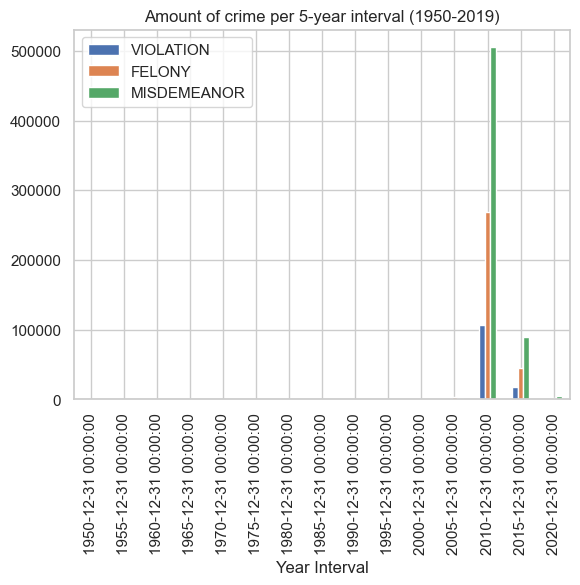

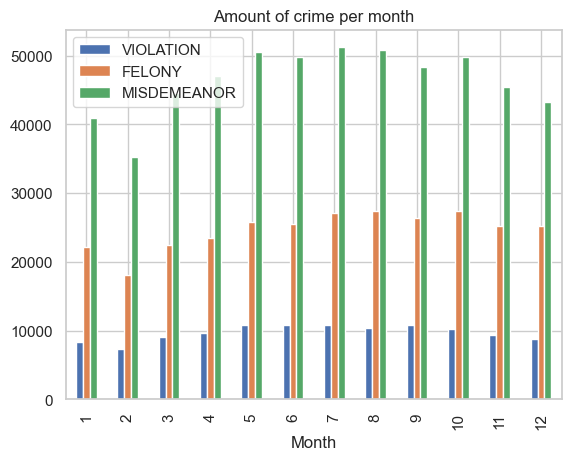

Significantly more crimes happen on the 1st of the month


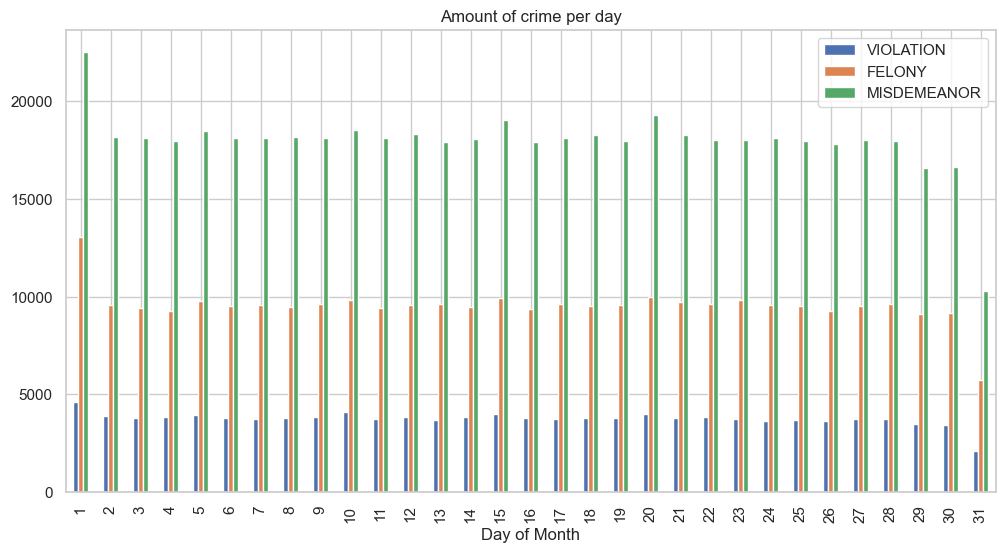

It seems like more crimes happen in the afternoon than at night


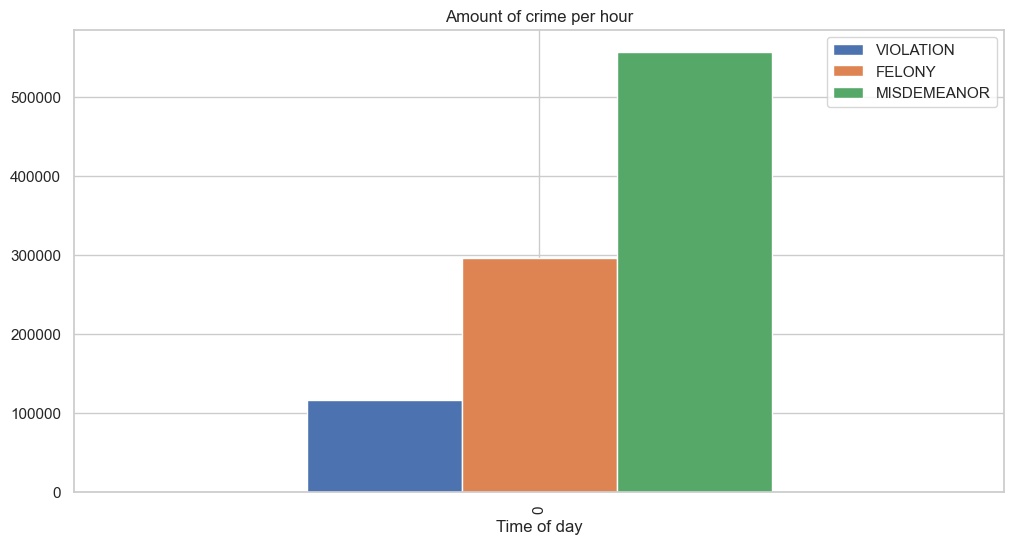

In [230]:
"""Analysis of Violations, Felonies and Misdemeanor"""
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your original DataFrame
# Slice the dataframe to include data from 1950 to 2019
dfYear = df2.loc['1950':'2019']

# Group by a 5-year interval and sum the crime categories
vis0 = dfYear.groupby(pd.Grouper(freq='5Y'))[['VIOLATION', 'FELONY', 'MISDEMEANOR']].sum()

# Plot the bar chart
vis0.plot.bar()
plt.title('Amount of crime per 5-year interval (1950-2019)')
plt.xlabel('Year Interval')
plt.show()


dfMonth = df2.iloc[:969550] 
dfMonth.index = dfMonth.index.month
vis1 = dfMonth.groupby([dfMonth.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis1.plot.bar()
plt.title('Amount of crime per month')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.show()

dfDay = df2.iloc[:969550] 
print ("Significantly more crimes happen on the 1st of the month")
dfDay.index = dfDay.index.day
vis2 = dfDay.groupby([dfDay.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis2.plot.bar(figsize=(12,6))
plt.title('Amount of crime per day')
plt.xlabel('Day of Month')
plt.show()

dfHour = df2.iloc[:969550] 
print ("It seems like more crimes happen in the afternoon than at night")
dfHour.index = dfHour.index.hour  
vis3 = dfHour.groupby([dfHour.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis3.plot.bar(figsize=(12,6))
plt.title('Amount of crime per hour')
plt.xlabel('Time of day')
plt.show()

In [231]:
dfMarijane = df2.copy()
dfMarijane = dfMarijane[dfMarijane['OFNS_DESC']=='DANGEROUS DRUGS']
length = len(dfMarijane['PD_DESC'])
Marijane = dfMarijane['PD_DESC'].str.contains('MARIJUANA')*1
Marijane = Marijane.sum()
perctge = Marijane/length
print(str(perctge)+'% of dangerous drugs crimes are related to marijuana')

0.5374879571339959% of dangerous drugs crimes are related to marijuana


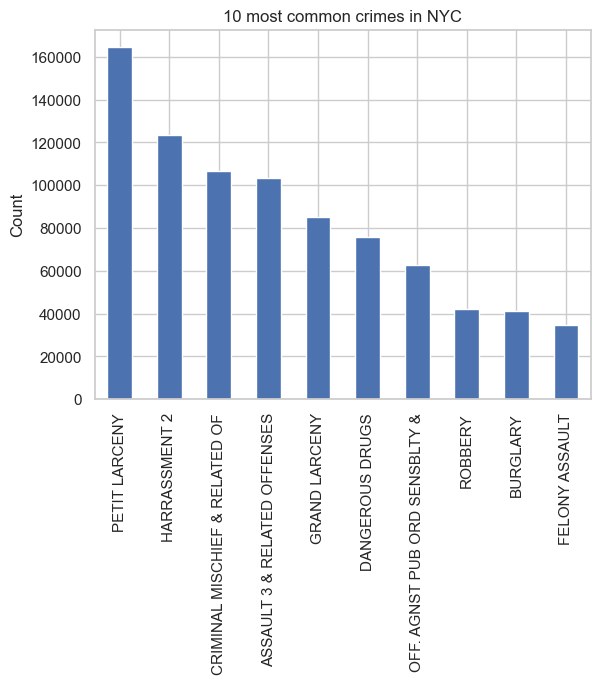

In [232]:
"""10 most common crimes in NYC, by year"""

df2['OFNS_DESC'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('10 most common crimes in NYC')
plt.show()

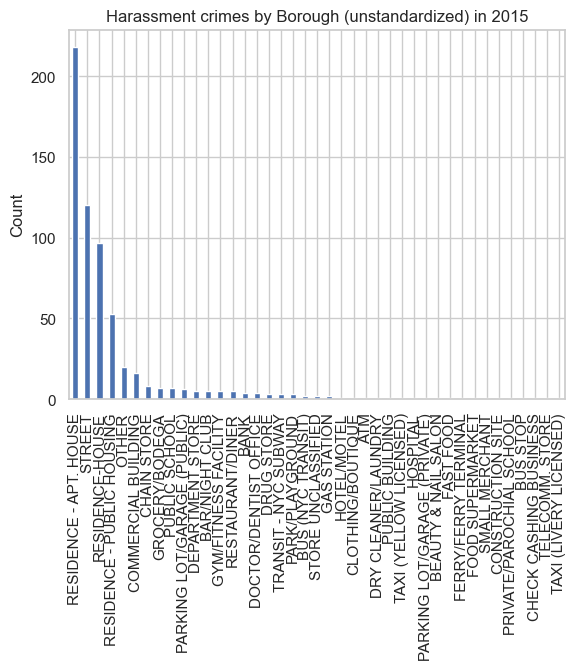

In [233]:
import matplotlib.pyplot as plt

# Filter harassment crimes for 2015
Boro_Crime = df2[df2['OFNS_DESC'] == 'HARRASSMENT 2']
Boro_Crime = Boro_Crime[Boro_Crime.index.year == 2015]

# Create a bar plot
Boro_Crime['BORO_NM'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.title('Harassment crimes by Borough (unstandardized) in 2015')
plt.show()


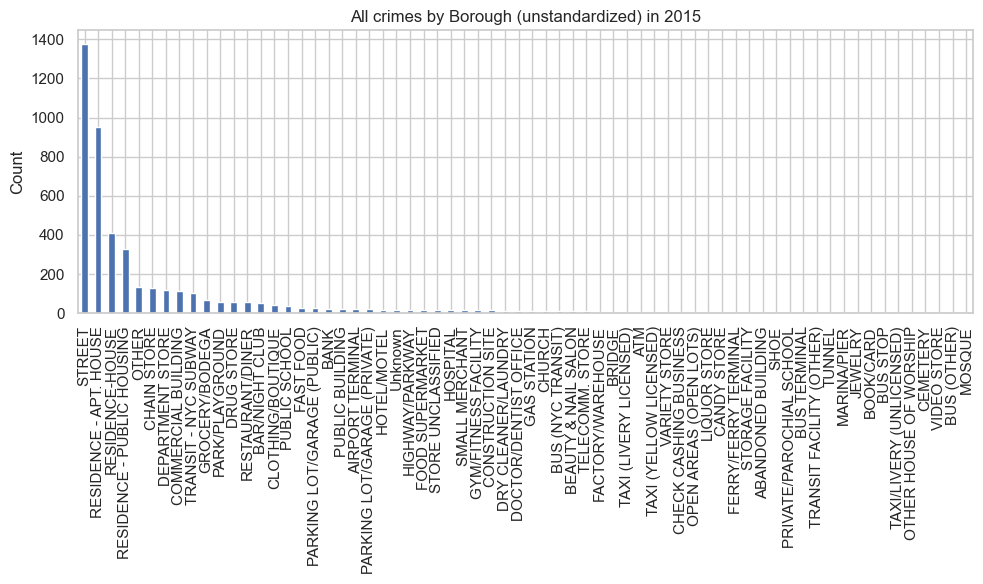

In [234]:
import matplotlib.pyplot as plt

# Filter all crimes for 2015
All_crimes = df2[df2.index.year == 2015]

# Set a larger figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a bar plot
All_crimes['BORO_NM'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.title('All crimes by Borough (unstandardized) in 2015')
plt.tight_layout()  # This helps prevent overlapping labels
plt.show()


# STEP 03: DATA MODELLING

3.1. CHECKING THE STATISTICAL DATA OF THE DATASET

In [235]:
df_NYPD_Complaint_Data_Historic.head()
df_NYPD_Complaint_Data_Historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int32         
 1   CMPLNT_FR_DT       1048575 non-null  datetime64[ns]
 2   CMPLNT_FR_TM       1048575 non-null  datetime64[ns]
 3   CMPLNT_TO_DT       1048575 non-null  datetime64[ns]
 4   CMPLNT_TO_TM       1048575 non-null  datetime64[ns]
 5   ADDR_PCT_CD        1048575 non-null  Int32         
 6   RPT_DT             1048575 non-null  datetime64[ns]
 7   KY_CD              1048575 non-null  int32         
 8   OFNS_DESC          1048575 non-null  object        
 9   PD_CD              1048575 non-null  int32         
 10  PD_DESC            1048575 non-null  object        
 11  CRM_ATPT_CPTD_CD   1048575 non-null  object        
 12  LAW_CAT_CD         1048575 non-null  object        
 13  BORO_NM            1048575 

In [236]:
description = df_NYPD_Complaint_Data_Historic.describe(include='all')
print(description)


C:\Users\Manu\AppData\Local\Temp\ipykernel_11484\1054893674.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



          CMPLNT_NUM         CMPLNT_FR_DT         CMPLNT_FR_TM  \
count   1.048575e+06              1048575              1048575   
unique           NaN                 5901                 1441   
top              NaN  2007-01-01 00:00:00  1900-01-01 12:00:00   
freq             NaN                  736                28301   
first            NaN  1900-01-01 00:00:00  1900-01-01 00:00:00   
last             NaN  2018-12-30 00:00:00  2023-12-01 00:00:00   
mean    5.500142e+08                  NaN                  NaN   
std     2.597276e+08                  NaN                  NaN   
min     1.000031e+08                  NaN                  NaN   
25%     3.252658e+08                  NaN                  NaN   
50%     5.498646e+08                  NaN                  NaN   
75%     7.748268e+08                  NaN                  NaN   
max     9.999999e+08                  NaN                  NaN   

               CMPLNT_TO_DT         CMPLNT_TO_TM   ADDR_PCT_CD  \
count    

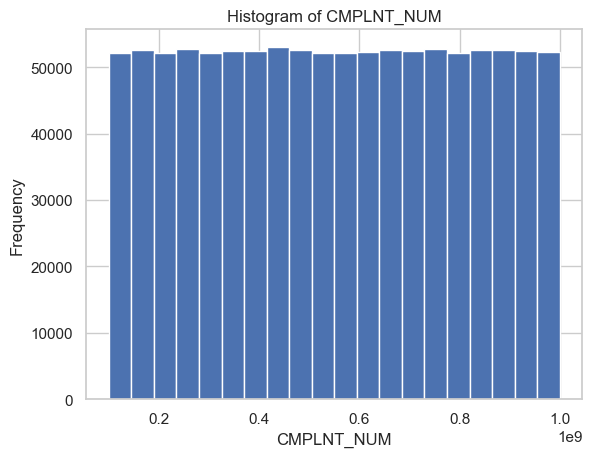

In [237]:
#Histogram: You can create histograms for numeric columns to visualize their distribution. For example, if you want to plot a histogram for the 'CMPLNT_NUM' column, you can use Matplotlib:

import matplotlib.pyplot as plt

plt.hist(df_NYPD_Complaint_Data_Historic['CMPLNT_NUM'], bins=20)
plt.xlabel('CMPLNT_NUM')
plt.ylabel('Frequency')
plt.title('Histogram of CMPLNT_NUM')
plt.show()

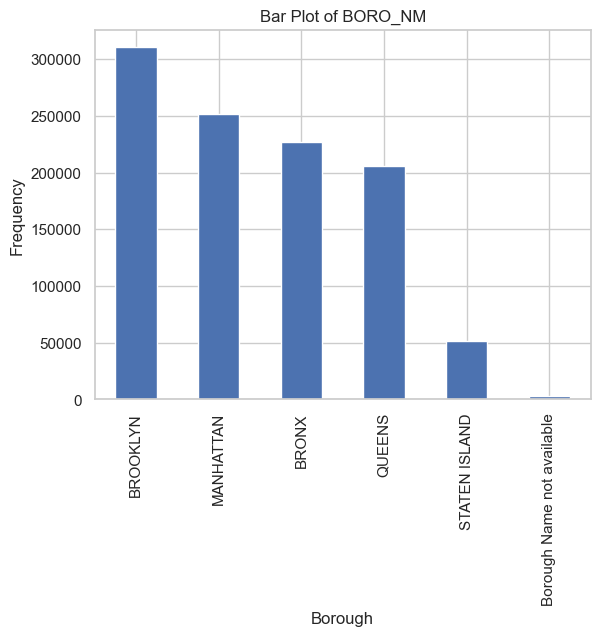

In [238]:
#Bar Plot: You can create bar plots to visualize categorical data. For instance, if you want to plot the frequency of unique values in the 'BORO_NM' column:
import matplotlib.pyplot as plt

df_NYPD_Complaint_Data_Historic['BORO_NM'].value_counts().plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Frequency')
plt.title('Bar Plot of BORO_NM')
plt.show()


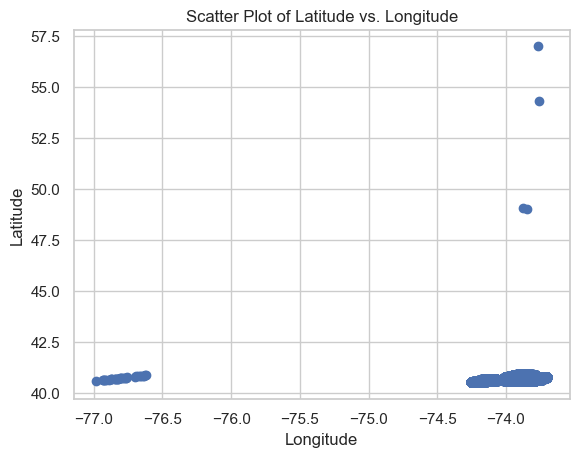

In [239]:
# Scatter Plot: You can create scatter plots to visualize the relationship between two numeric columns. For example, if you want to see the relationship between 'Latitude' and 'Longitude':
import matplotlib.pyplot as plt

plt.scatter(df_NYPD_Complaint_Data_Historic['Longitude'], df_NYPD_Complaint_Data_Historic['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.show()


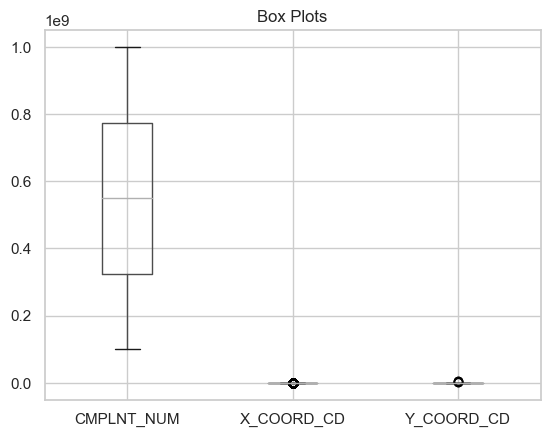

In [240]:
# Box Plot: To create box plots for numeric columns to visualize summary statistics:

import matplotlib.pyplot as plt

df_NYPD_Complaint_Data_Historic.boxplot(column=['CMPLNT_NUM', 'X_COORD_CD', 'Y_COORD_CD'])
plt.title('Box Plots')
plt.show()


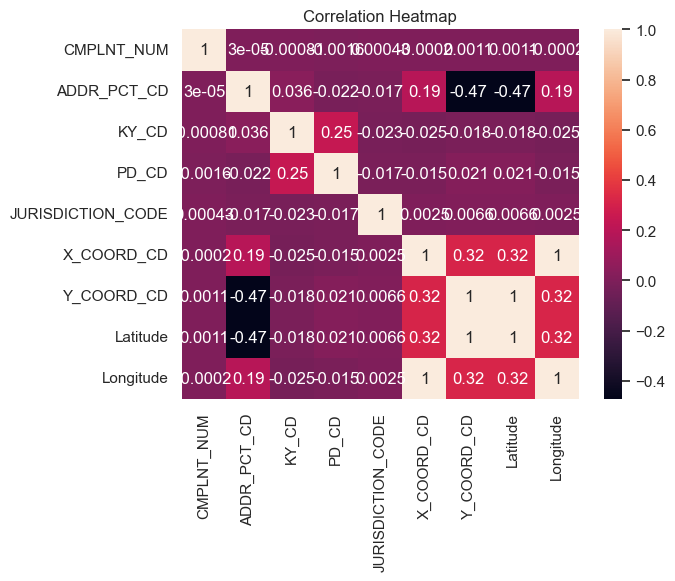

In [241]:
import seaborn as sns

# Select only the numeric columns from the DataFrame
numeric_columns = df_NYPD_Complaint_Data_Historic.select_dtypes(include=['int32', 'float64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [242]:
df_NYPD_Complaint_Data_Historic.head()

CMPLNT_NUM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_DT  \
0   325341655   2015-02-11 1900-01-01 15:00:00   1900-01-01   
1   393816841   2012-03-17 1900-01-01 10:30:00   2012-03-17   
2   802896158   2016-10-27 1900-01-01 13:48:00   2016-11-03   
3   633812343   2014-11-27 1900-01-01 19:00:00   2014-11-27   
4   300349533   2013-12-11 1900-01-01 13:30:00   2013-12-11   

         CMPLNT_TO_TM  ADDR_PCT_CD     RPT_DT  KY_CD  \
0 2023-12-01 00:00:00           73 2015-02-11    359   
1 1900-01-01 11:00:00           69 2012-03-17    344   
2 1900-01-01 13:49:00           71 2016-11-03    578   
3 1900-01-01 22:30:00          112 2014-11-28    104   
4 1900-01-01 14:15:00           24 2013-12-12    109   

                        OFNS_DESC  PD_CD  ... Y_COORD_CD       SUSP_RACE  \
0  OFFENSES AGAINST PUBLIC ADMINI    749  ...     181287           BLACK   
1    ASSAULT 3 & RELATED OFFENSES    114  ...     174133         Unknown   
2                   HARRASSMENT 2    638  ...     179282           BLACK   
3                            RAPE    157  ...     202485  WHITE HISPANIC   
4                   GRAND LARCENY    438  ...     228356         Unknown   

  SUSP_SEX   Latitude  Longitude                        Lat_Lon  \
0        M  40.664239 -73.908425  (40.664239422, -73.908425011)   
1  Unknown  40.644590 -73.892672  (40.644589618, -73.892672426)   
2        M  40.658758 -73.942435  (40.658758183, -73.942434788)   
3        M  40.722364 -73.851474  (40.722363687, -73.851473894)   
4  Unknown  40.793465 -73.968950  (40.793464597, -73.968949638)   

                PATROL_BORO  VIC_AGE_GROUP  VIC_RACE  VIC_SEX  
0   PATROL BORO BKLYN NORTH            <18     BLACK        M  
1   PATROL BORO BKLYN SOUTH          45-64     BLACK        F  
2   PATROL BORO BKLYN SOUTH          18-24     BLACK        M  
3  PATROL BORO QUEENS NORTH          25-44     WHITE        F  
4     PATROL BORO MAN NORTH          45-64     WHITE        F  

[5 rows x 29 columns]

In [243]:
import pandas as pd

# Create a datetime index of times that crimes were reported to have been committed
df_FlattedData = df_NYPD_Complaint_Data_Historic.copy()

# Assuming df_FlattedData is your DataFrame with the specified columns
# If 'CMPLNT_FR_DT' is not already a datetime column, you can convert it using df_FlattedData['CMPLNT_FR_DT'] = pd.to_datetime(df_FlattedData['CMPLNT_FR_DT'], format='%Y-%m-%d', errors='coerce')

# Drop rows with missing 'CMPLNT_FR_DT'
df_FlattedData.dropna(subset=['CMPLNT_FR_DT'], inplace=True)

# Create a new 'Year' column
df_FlattedData['ComplaintYear'] = df_FlattedData['CMPLNT_FR_DT'].dt.year

# Get dummy columns for crime categories
df_dummy = pd.get_dummies(df_FlattedData['LAW_CAT_CD'])

# Concatenate the dummy columns with the original DataFrame
df_FlattedData = pd.concat([df_FlattedData, df_dummy], axis=1)

# Set 'CMPLNT_FR_DT' as the index
df_FlattedData.set_index('CMPLNT_FR_DT', inplace=True)

df_FlattedData.head()


CMPLNT_NUM        CMPLNT_FR_TM CMPLNT_TO_DT        CMPLNT_TO_TM  \
CMPLNT_FR_DT                                                                    
2015-02-11     325341655 1900-01-01 15:00:00   1900-01-01 2023-12-01 00:00:00   
2012-03-17     393816841 1900-01-01 10:30:00   2012-03-17 1900-01-01 11:00:00   
2016-10-27     802896158 1900-01-01 13:48:00   2016-11-03 1900-01-01 13:49:00   
2014-11-27     633812343 1900-01-01 19:00:00   2014-11-27 1900-01-01 22:30:00   
2013-12-11     300349533 1900-01-01 13:30:00   2013-12-11 1900-01-01 14:15:00   

              ADDR_PCT_CD     RPT_DT  KY_CD                       OFNS_DESC  \
CMPLNT_FR_DT                                                                  
2015-02-11             73 2015-02-11    359  OFFENSES AGAINST PUBLIC ADMINI   
2012-03-17             69 2012-03-17    344    ASSAULT 3 & RELATED OFFENSES   
2016-10-27             71 2016-11-03    578                   HARRASSMENT 2   
2014-11-27            112 2014-11-28    104                            RAPE   
2013-12-11             24 2013-12-12    109                   GRAND LARCENY   

              PD_CD                                            PD_DESC  ...  \
CMPLNT_FR_DT                                                            ...   
2015-02-11      749                     VIOLATION OF ORDER OF PROTECTI  ...   
2012-03-17      114                                OBSTR BREATH/CIRCUL  ...   
2016-10-27      638                              HARASSMENT,SUBD 3,4,5  ...   
2014-11-27      157                                             RAPE 1  ...   
2013-12-11      438  LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...  ...   

              Longitude                        Lat_Lon  \
CMPLNT_FR_DT                                             
2015-02-11   -73.908425  (40.664239422, -73.908425011)   
2012-03-17   -73.892672  (40.644589618, -73.892672426)   
2016-10-27   -73.942435  (40.658758183, -73.942434788)   
2014-11-27   -73.851474  (40.722363687, -73.851473894)   
2013-12-11   -73.968950  (40.793464597, -73.968949638)   

                           PATROL_BORO VIC_AGE_GROUP VIC_RACE VIC_SEX  \
CMPLNT_FR_DT                                                            
2015-02-11     PATROL BORO BKLYN NORTH           <18    BLACK       M   
2012-03-17     PATROL BORO BKLYN SOUTH         45-64    BLACK       F   
2016-10-27     PATROL BORO BKLYN SOUTH         18-24    BLACK       M   
2014-11-27    PATROL BORO QUEENS NORTH         25-44    WHITE       F   
2013-12-11       PATROL BORO MAN NORTH         45-64    WHITE       F   

              ComplaintYear  FELONY  MISDEMEANOR VIOLATION  
CMPLNT_FR_DT                                                
2015-02-11             2015       0            1         0  
2012-03-17             2012       0            1         0  
2016-10-27             2016       0            0         1  
2014-11-27             2014       1            0         0  
2013-12-11             2013       1            0         0  

[5 rows x 32 columns]

In [244]:
df_FlattedData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2015-02-11 to 2006-05-23
Data columns (total 32 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int32         
 1   CMPLNT_FR_TM       1048575 non-null  datetime64[ns]
 2   CMPLNT_TO_DT       1048575 non-null  datetime64[ns]
 3   CMPLNT_TO_TM       1048575 non-null  datetime64[ns]
 4   ADDR_PCT_CD        1048575 non-null  Int32         
 5   RPT_DT             1048575 non-null  datetime64[ns]
 6   KY_CD              1048575 non-null  int32         
 7   OFNS_DESC          1048575 non-null  object        
 8   PD_CD              1048575 non-null  int32         
 9   PD_DESC            1048575 non-null  object        
 10  CRM_ATPT_CPTD_CD   1048575 non-null  object        
 11  LAW_CAT_CD         1048575 non-null  object        
 12  BORO_NM            1048575 non-null  object        
 13  LOC_OF_OCCUR

In [245]:
import pandas as pd

# Assuming df_FlattedData is your DataFrame with the specified columns

# Create a new 'ComplaintYear' column
df_FlattedData['ComplaintYear'] = df_FlattedData.index.year

# Group by 'ComplaintYear' and 'BORO_NM' and aggregate the counts for each category
df_grouped = df_FlattedData.groupby(['ComplaintYear', 'BORO_NM'])[['FELONY', 'MISDEMEANOR', 'VIOLATION', 'Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']].agg('sum').reset_index()

# Display the resulting DataFrame
print(df_grouped.head())

# Save the grouped DataFrame to a CSV file
df_grouped.to_csv('DataSet//grouped_crime_data_with_coordinates.csv', index=False)


   ComplaintYear        BORO_NM  FELONY  MISDEMEANOR  VIOLATION     Latitude  \
0           1900          BRONX     7.0         14.0        8.0  1184.598068   
1           1900       BROOKLYN    23.0         19.0        8.0  2032.534966   
2           1900      MANHATTAN    19.0         17.0        7.0  1753.370636   
3           1900         QUEENS    18.0         21.0        4.0  1751.222587   
4           1900  STATEN ISLAND     0.0          9.0        1.0   405.939703   

     Longitude  X_COORD_CD  Y_COORD_CD  
0 -2142.281357  29572062.0   7201494.0  
1 -3697.955300  49779825.0   8817303.0  
2 -3180.750532  42668630.0   9546701.0  
3 -3175.813221  44037732.0   8765609.0  
4  -741.304197   9480088.0   1557127.0  


In [246]:
# Count using the shape attribute
num_rows_shape = df_grouped.shape[0]
print(f"Number of rows using shape: {num_rows_shape}")

# Count using the len() function
num_rows_len = len(df_grouped)
print(f"Number of rows using len(): {num_rows_len}")


Number of rows using shape: 218
Number of rows using len(): 218


# DATASET 04: The dataset seems to encompass a comprehensive set of socio-economic indicators, allowing for a detailed analysis of the demographic, economic, and educational characteristics of each borough over time. Analyzing this dataset could provide insights into the disparities and trends among different areas within the studied region.

In [247]:
# Code to load the data into the dataframes
import pandas as pd
# Provide the full or relative path to your CSV file
#file_path_PoliceStationCount = r'\DataSet\PoliceStationsOfNewYorkCity.csv'
file_path_CompleteDs="DataSet//CompleteDs.csv"

# Load the dataset into a DataFrame
df_CompleteDS = pd.read_csv(file_path_CompleteDs)


In [248]:
# printing the data frame
df_CompleteDS 

Bor_Names  Years  Population_  Children_aged_0_15  Working_age_16_64  \
0         BROOKLYN   1950      1451277            348306.0             928817   
1           QUEENS   1950      2738175            657162.0            1752432   
2        MANHATTAN   1950      1960101            470424.0            1254465   
3            BRONX   1950      1550849            372204.0             992543   
4    STATEN_ISLAND   1950       191555             45973.0             122595   
..             ...    ...          ...                 ...                ...   
345       BROOKLYN   2019      1446788            347229.0             925944   
346         QUEENS   2019      2648452            635628.0            1695009   
347      MANHATTAN   2019      1638281            393187.0            1048500   
348          BRONX   2019      2330295            559271.0            1491389   
349  STATEN_ISLAND   2019       487155            116917.0             311779   

     Older_people_aged_65+  Population_density_persons_per_sq_km  \
0                   174153                           8062.650000   
1                   328581                           9779.196429   
2                   235212                          33165.837560   
3                   186102                          14098.627270   
4                    22987                           1260.230263   
..                     ...                                   ...   
345                 173615                           8037.711111   
346                 317814                           9458.757143   
347                 196594                          27720.490690   
348                 279635                          21184.500000   
349                  58459                           3204.967105   

     Poverty_Rate  UnEmployment_Rate  Change_in_housing_price_in_%  \
0      175604.517          85625.343                           -13   
1      331319.175          82145.250                           -14   
2      237172.221          39202.020                            29   
3      187652.729          69788.205                           -16   
4       23178.155           5938.205                            -8   
..            ...                ...                           ...   
345    175061.348          85360.492                           130   
346    320462.692          79453.560                           115   
347    198232.001          32765.620                           185   
348    281965.695         279635.400                           104   
349     58945.755          15101.805                            99   

     CD_103_Income_in_%  Education_Rate  Doctorate  Professional     Masters  \
0                  -9.8      1030406.67  21769.155      43538.31  150932.808   
1                 -19.4      2053631.25  41072.625      82145.25  284770.200   
2                 -28.5      1411272.72  29401.515      58803.03  203850.504   
3                  21.3       977034.87  23262.735      46525.47  161288.296   
4                 -14.2       151328.45   2873.325       5746.65   19921.720   
..                  ...             ...        ...           ...         ...   
345               599.0      1027219.48  21701.820      43403.64  150465.952   
346               234.6      1986339.00  39726.780      79453.56  275439.008   
347               442.2      1179562.32  24574.215      49148.43  170381.224   
348               670.2      1468085.85  34954.425      69908.85  242350.680   
349               167.8       384852.45   7307.325      14614.65   50664.120   

      Bachelors   Associate  HighSchool       None  
0    309122.001   92881.728   348306.48  42087.033  
1    583231.275  175243.200   657162.00  79407.075  
2    417501.513  125446.464   470424.24  56842.929  
3    330330.837   99254.336   372203.76  44974.621  
4     40801.215   12259.520    45973.20   5555.095  
..          ...         ...         ...        ...  
345  308165.844   92594.432   347229.12  41956

# Step 01: Data Cleaning and Data Preprocessing

Checking for Junk Data, Missing Data or Duplicate Data

In [249]:
# Check for missing values
missing_values = df_CompleteDS.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = df_CompleteDS[df_CompleteDS.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Missing Values:
Bor_Names                               0
Years                                   0
Population_                             0
Children_aged_0_15                      0
Working_age_16_64                       0
Older_people_aged_65+                   0
Population_density_persons_per_sq_km    0
Poverty_Rate                            0
UnEmployment_Rate                       0
Change_in_housing_price_in_%            0
CD_103_Income_in_%                      0
Education_Rate                          0
Doctorate                               0
Professional                            0
Masters                                 0
Bachelors                               0
Associate                               0
HighSchool                              0
None                                    0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [Bor_Names, Years, Population_, Children_aged_0_15, Working_age_16_64, Older_people_aged_65+, Population_density_persons_per_sq_km, 

In [250]:
# Display the data types of each column
print(df_CompleteDS.dtypes)

Bor_Names                                object
Years                                     int64
Population_                               int64
Children_aged_0_15                      float64
Working_age_16_64                         int64
Older_people_aged_65+                     int64
Population_density_persons_per_sq_km    float64
Poverty_Rate                            float64
UnEmployment_Rate                       float64
Change_in_housing_price_in_%              int64
CD_103_Income_in_%                      float64
Education_Rate                          float64
Doctorate                               float64
Professional                            float64
Masters                                 float64
Bachelors                               float64
Associate                               float64
HighSchool                              float64
None                                    float64
dtype: object


In [251]:
print(df_CompleteDS.describe())


             Years   Population_  Children_aged_0_15  Working_age_16_64  \
count   350.000000  3.500000e+02          350.000000       3.500000e+02   
mean   1984.500000  1.535044e+06       368410.624914       9.824284e+05   
std      20.234124  7.194961e+05       172679.081658       4.604775e+05   
min    1950.000000  1.915550e+05        45973.000000       1.225950e+05   
25%    1967.000000  1.297223e+06       311333.250000       8.302225e+05   
50%    1984.500000  1.539233e+06       369416.000000       9.851090e+05   
75%    2002.000000  1.987174e+06       476922.000000       1.271791e+06   
max    2019.000000  2.738176e+06       657162.000000       1.752433e+06   

       Older_people_aged_65+  Population_density_persons_per_sq_km  \
count             350.000000                            350.000000   
mean           184205.300000                          12698.650634   
std             86339.426815                           9016.913539   
min             22987.000000                

# Step 02:-  EDA on the dataset about the police station dataset

Distribution of Population:

Plot histograms to visualize the distribution of the 'Population' column.

In [252]:
print(df_CompleteDS.columns)


Index(['Bor_Names', 'Years', 'Population_', 'Children_aged_0_15',
       'Working_age_16_64', 'Older_people_aged_65+',
       'Population_density_persons_per_sq_km', 'Poverty_Rate',
       'UnEmployment_Rate', 'Change_in_housing_price_in_%',
       'CD_103_Income_in_%', 'Education_Rate', 'Doctorate', 'Professional',
       'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None'],
      dtype='object')


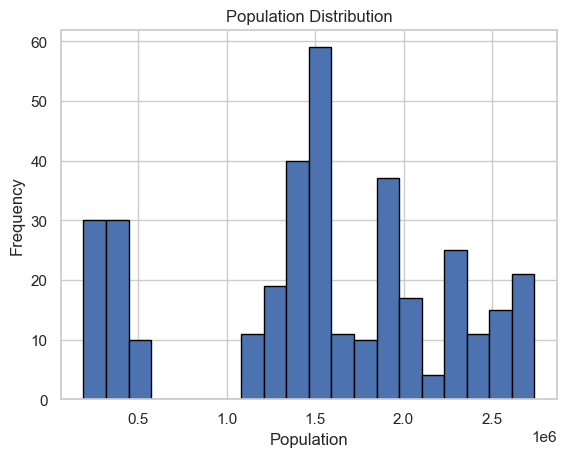

In [253]:
import matplotlib.pyplot as plt

plt.hist(df_CompleteDS['Population_'], bins=20, edgecolor='black')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


Population Density:

Visualize the population density using a histogram or a kernel density plot.

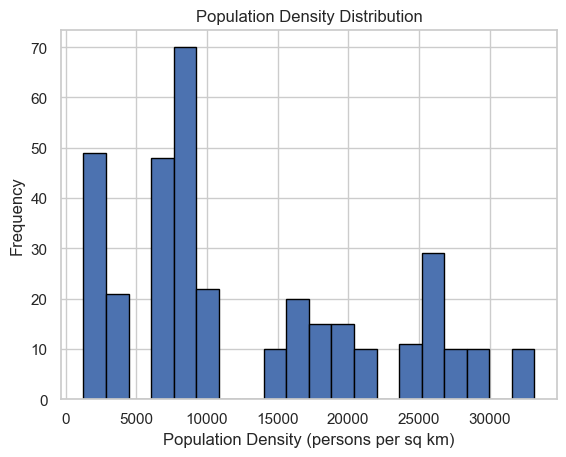

In [254]:
plt.hist(df_CompleteDS['Population_density_persons_per_sq_km'], bins=20, edgecolor='black')
plt.title('Population Density Distribution')
plt.xlabel('Population Density (persons per sq km)')
plt.ylabel('Frequency')
plt.show()


Correlation Analysis:

Use a correlation matrix to explore relationships between numerical columns.

In [255]:
correlation_matrix = df_CompleteDS.corr()
print(correlation_matrix)


                                         Years  Population_  \
Years                                 1.000000     0.039346   
Population_                           0.039346     1.000000   
Children_aged_0_15                    0.039346     1.000000   
Working_age_16_64                     0.039346     1.000000   
Older_people_aged_65+                 0.039345     1.000000   
Population_density_persons_per_sq_km  0.012308     0.450214   
Poverty_Rate                          0.039346     1.000000   
UnEmployment_Rate                     0.219989     0.570992   
Change_in_housing_price_in_%          0.666709     0.024969   
CD_103_Income_in_%                    0.714542     0.102897   
Education_Rate                        0.034488     0.986404   
Doctorate                             0.039346     1.000000   
Professional                          0.039346     1.000000   
Masters                               0.039346     1.000000   
Bachelors                             0.039346     1.00

Box Plots for Age Groups:

Create box plots to visualize the distribution of age groups.

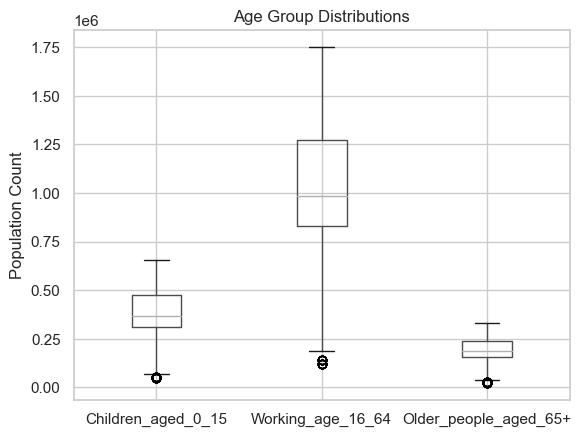

In [256]:
age_columns = ['Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+']
df_CompleteDS[age_columns].boxplot()
plt.title('Age Group Distributions')
plt.ylabel('Population Count')
plt.show()


Education Levels:

Explore the distribution of education levels using bar charts.

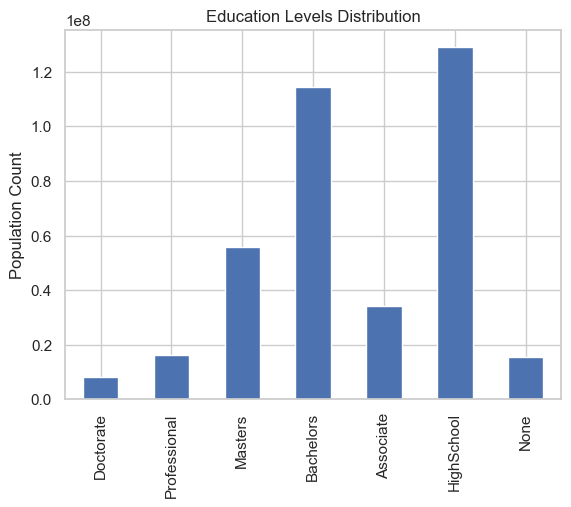

In [257]:
education_columns = ['Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']
df_CompleteDS[education_columns].sum().plot(kind='bar')
plt.title('Education Levels Distribution')
plt.ylabel('Population Count')
plt.show()


Unemployment and Poverty Rates:

Visualize the unemployment and poverty rates.

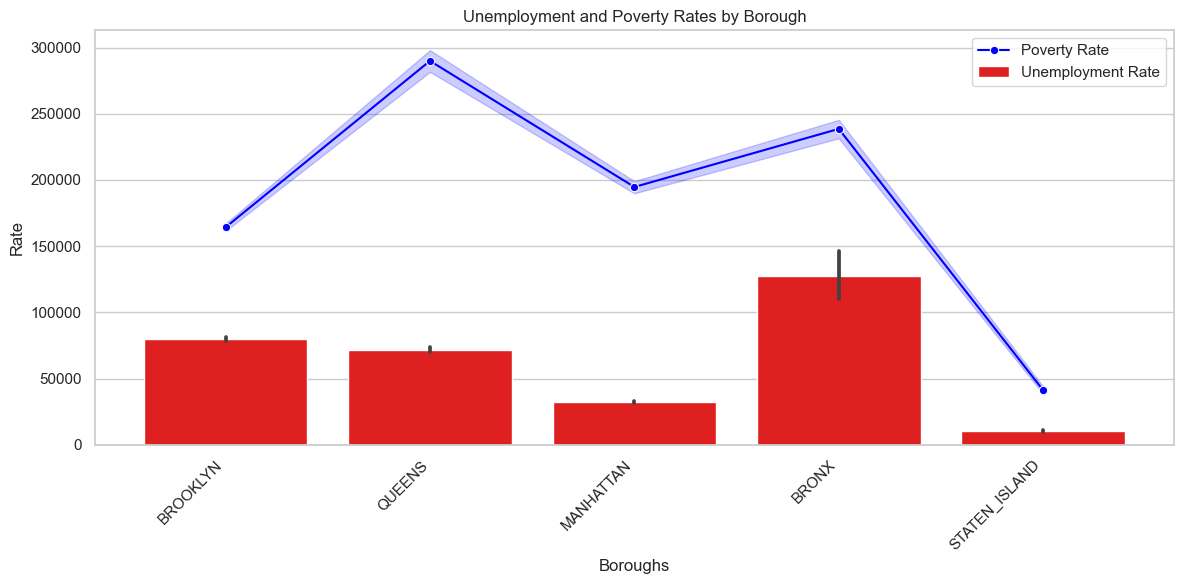

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_CompleteDS is your DataFrame with the specified columns
plt.figure(figsize=(12, 6))

# Set a seaborn style
sns.set(style="whitegrid")

# Bar graph for Unemployment Rate
sns.barplot(x='Bor_Names', y='UnEmployment_Rate', data=df_CompleteDS, color='red', label='Unemployment Rate')

# Line graph for Poverty Rate
sns.lineplot(x='Bor_Names', y='Poverty_Rate', data=df_CompleteDS, color='blue', marker='o', label='Poverty Rate')

plt.xlabel('Boroughs')
plt.ylabel('Rate')
plt.title('Unemployment and Poverty Rates by Borough')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


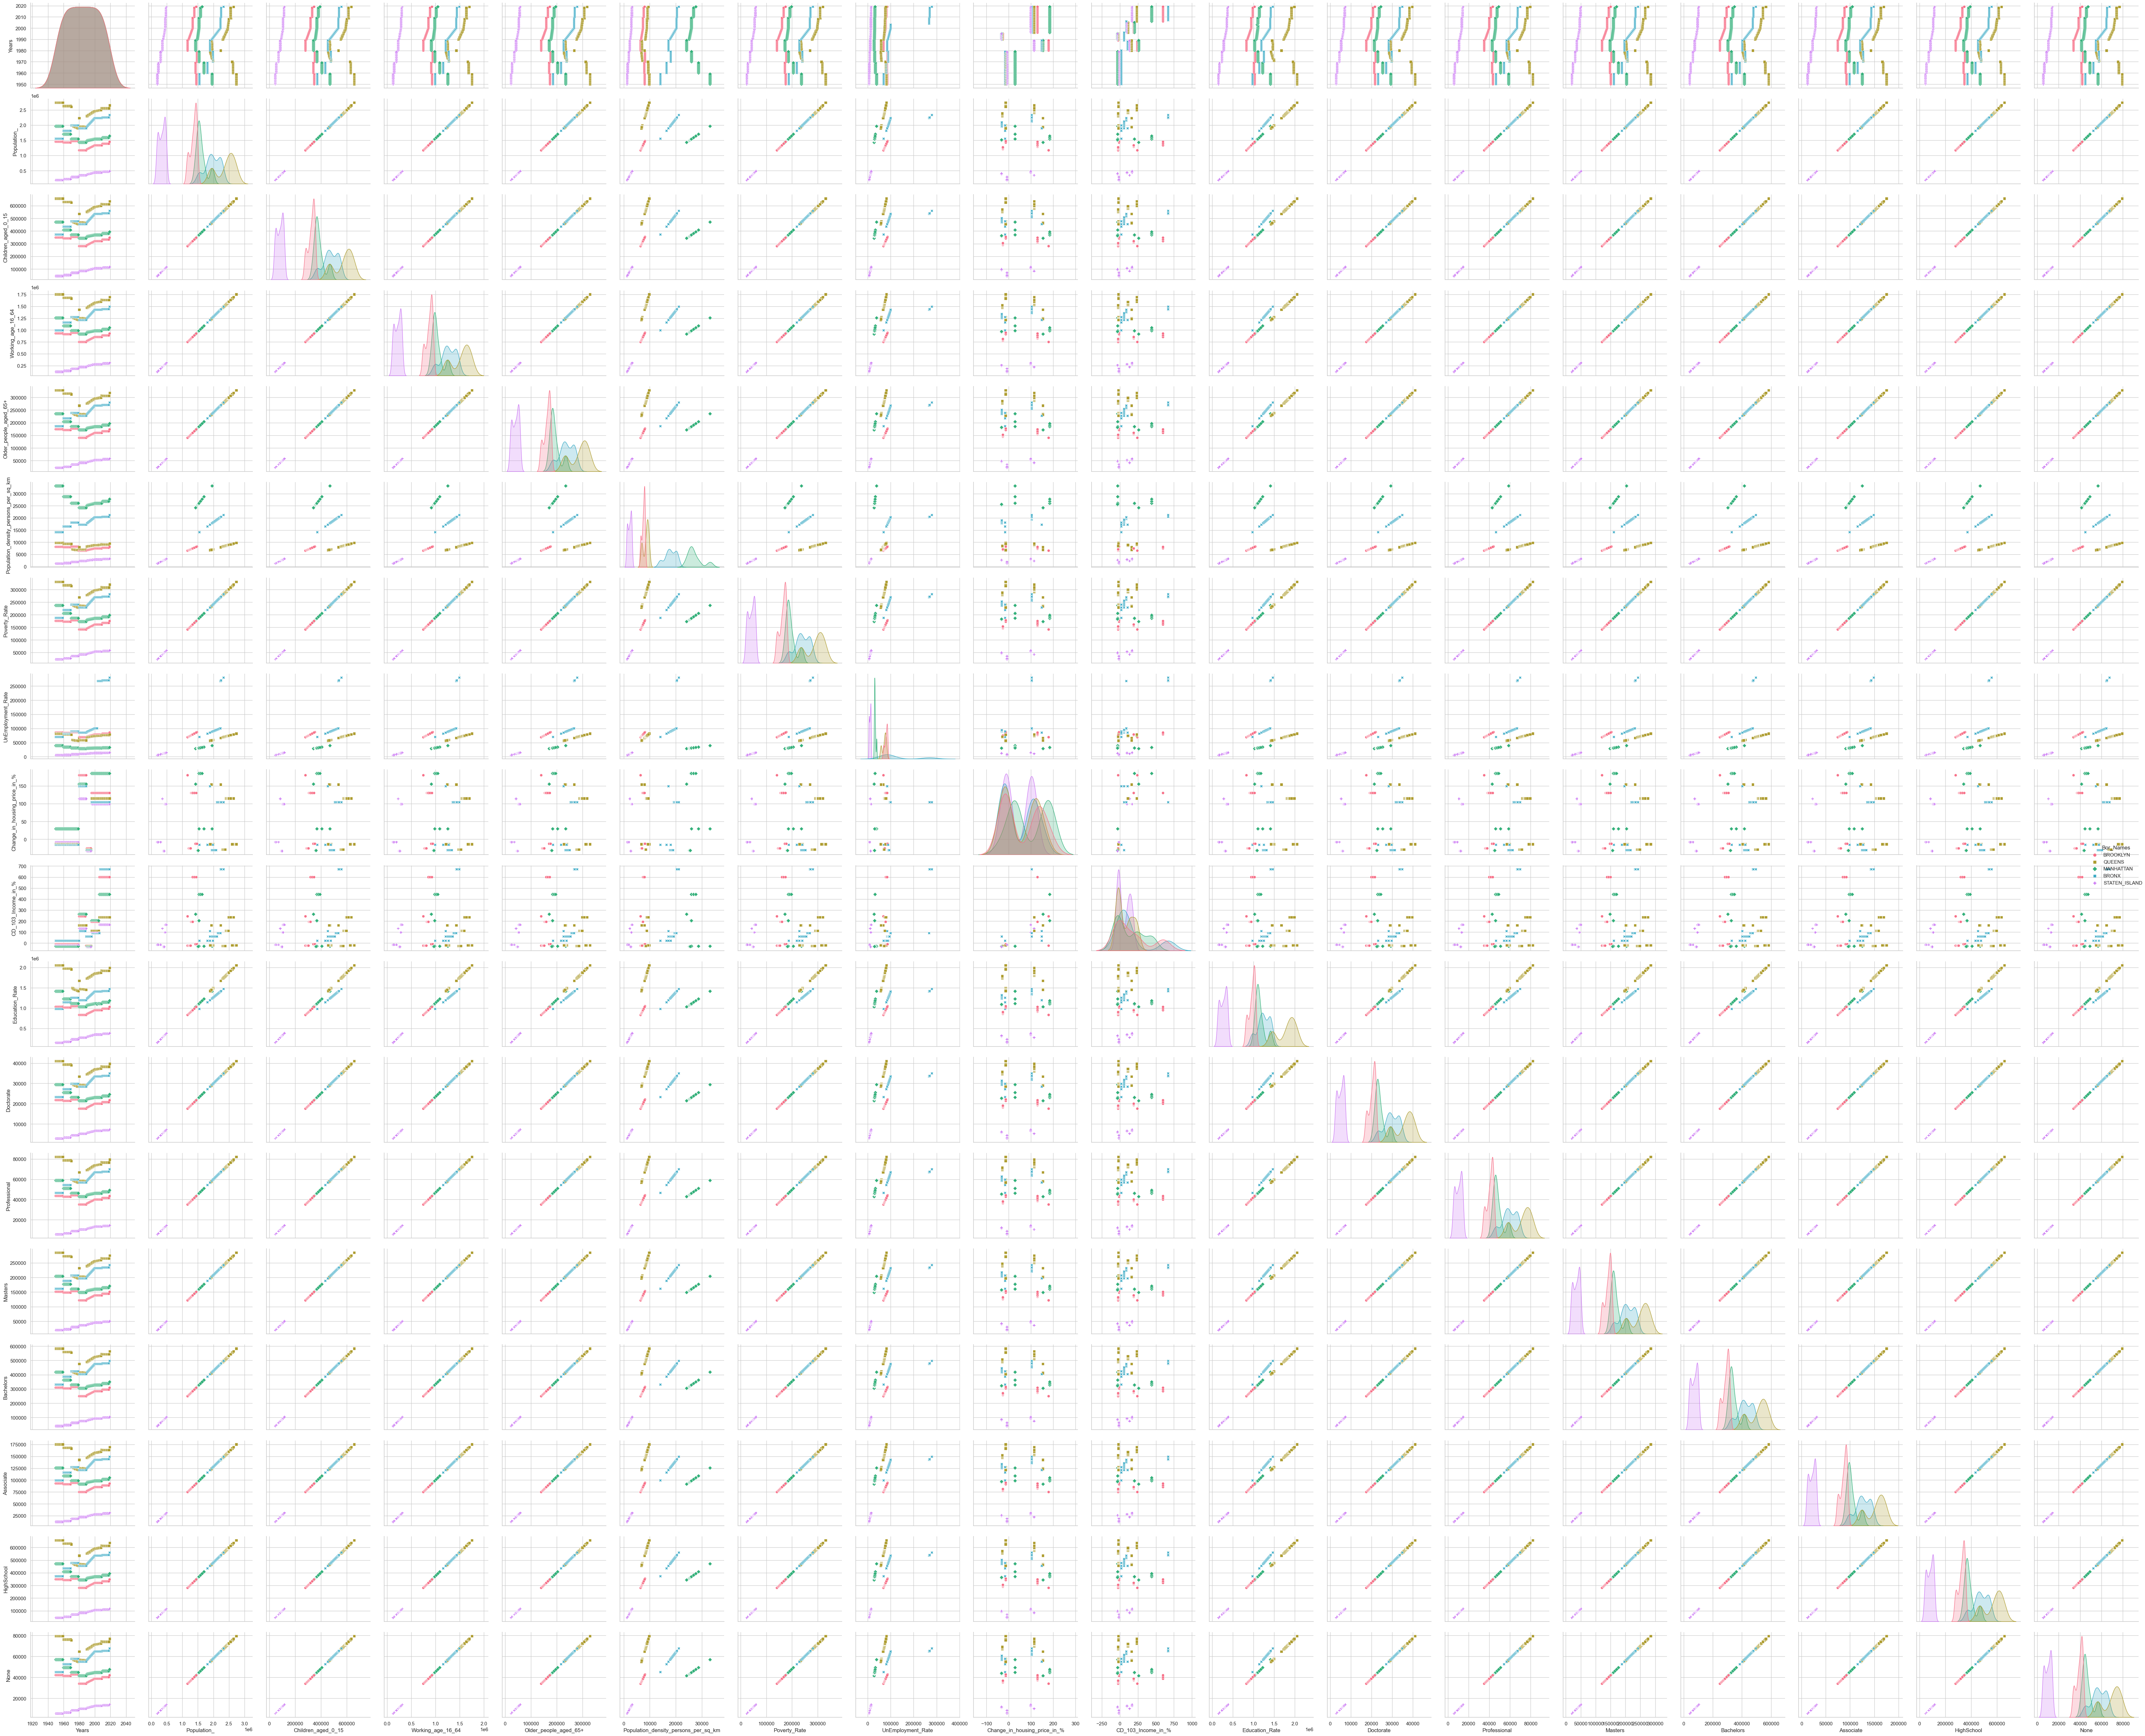

In [259]:
import plotly.express as px

# Assuming df_CompleteDS is your DataFrame with the specified columns
fig = px.parallel_coordinates(
    df_CompleteDS,
    dimensions=['Poverty_Rate', 'UnEmployment_Rate', 'Change_in_housing_price_in_%', 'CD_103_Income_in_%'],
    color='Population_',  # Replace with the actual numerical column you want to use
    labels={'Poverty_Rate': 'Poverty Rate', 'UnEmployment_Rate': 'Unemployment Rate',
            'Change_in_housing_price_in_%': 'Housing Price Change', 'CD_103_Income_in_%': 'CD 103 Income'},
    title='Parallel Coordinates Plot for Socio-Economic Indicators',
)

fig.show()

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_CompleteDS is your DataFrame with the specified columns
sns.set(style="whitegrid")
markers = ["o", "s", "D", "X", "P"]
palette = sns.color_palette("husl", n_colors=len(df_CompleteDS['Bor_Names'].unique()))

# Create a pair plot
g = sns.pairplot(df_CompleteDS, hue="Bor_Names", palette=palette, markers=markers, diag_kind='kde', height=3, aspect=1.2)

# Customize legend location
g._legend.set_bbox_to_anchor((1, 0.5))

# Set a tight layout
plt.tight_layout()

# Show the plot
plt.show()




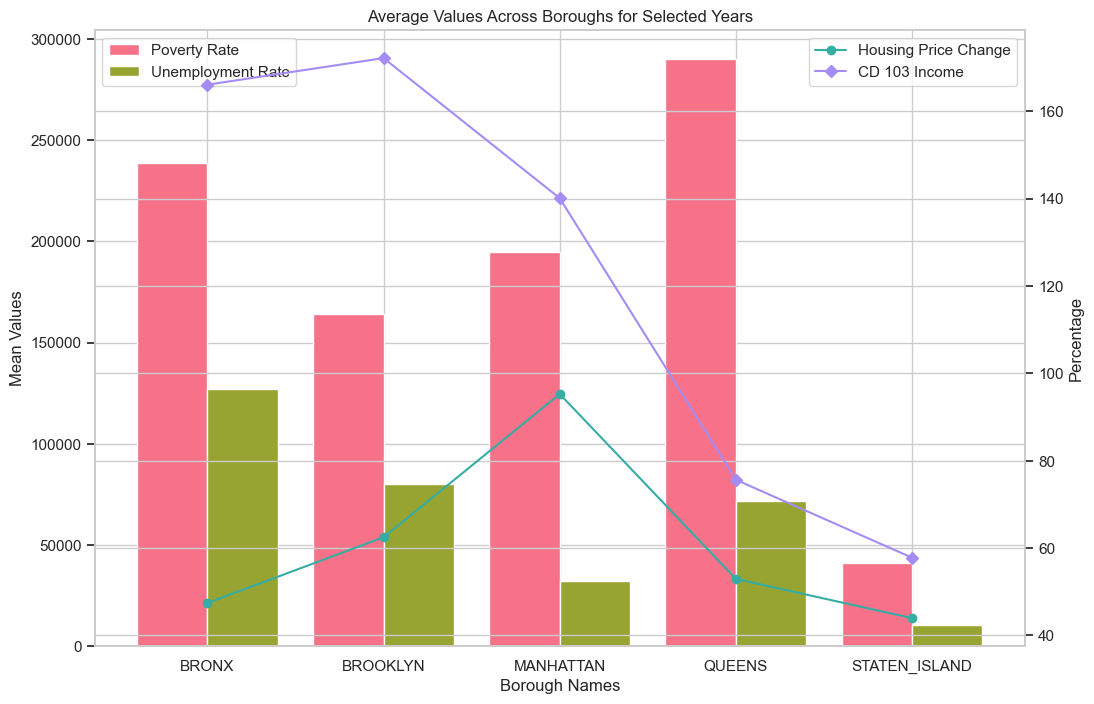

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_CompleteDS is your DataFrame with the specified columns

# Group by 'Bor_Names' and calculate the mean for each variable
grouped_data = df_CompleteDS.groupby('Bor_Names').mean().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define a custom color palette
colors = sns.color_palette("husl", 4)

# Bar plot for Poverty Rate and Unemployment Rate
bar_width = 0.4
bar_positions = range(len(grouped_data['Bor_Names']))
ax1.bar([pos - bar_width/2 for pos in bar_positions], grouped_data['Poverty_Rate'], width=bar_width, label='Poverty Rate', color=colors[0])
ax1.bar([pos + bar_width/2 for pos in bar_positions], grouped_data['UnEmployment_Rate'], width=bar_width, label='Unemployment Rate', color=colors[1])

# Set labels and title for the first y-axis
ax1.set_xlabel('Borough Names')
ax1.set_ylabel('Mean Values')
ax1.set_title('Average Values Across Boroughs for Selected Years')

# Create a secondary y-axis for percentage variables
ax2 = ax1.twinx()
ax2.plot(grouped_data['Bor_Names'], grouped_data['Change_in_housing_price_in_%'], marker='o', label='Housing Price Change', color=colors[2])
ax2.plot(grouped_data['Bor_Names'], grouped_data['CD_103_Income_in_%'], marker='D', label='CD 103 Income', color=colors[3])

# Set labels for the secondary y-axis
ax2.set_ylabel('Percentage')

# Show the legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [261]:
df_CompleteDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bor_Names                             350 non-null    object 
 1   Years                                 350 non-null    int64  
 2   Population_                           350 non-null    int64  
 3   Children_aged_0_15                    350 non-null    float64
 4   Working_age_16_64                     350 non-null    int64  
 5   Older_people_aged_65+                 350 non-null    int64  
 6   Population_density_persons_per_sq_km  350 non-null    float64
 7   Poverty_Rate                          350 non-null    float64
 8   UnEmployment_Rate                     350 non-null    float64
 9   Change_in_housing_price_in_%          350 non-null    int64  
 10  CD_103_Income_in_%                    350 non-null    float64
 11  Education_Rate     

In [262]:
import plotly.express as px

# Assuming df_CompleteDS is your DataFrame with the specified columns, and 'Years' is a datetime column
# If 'Years' is not already a datetime column, you can convert it using df_CompleteDS['Years'] = pd.to_datetime(df_CompleteDS['Years'])

# Set 'Years' as the index
df_CompleteDS.set_index('Years', inplace=True)

# Reset index for plotly express compatibility
df_CompleteDS.reset_index(inplace=True)

# Create a line plot using plotly express
fig = px.line(df_CompleteDS, x='Years', y=['Poverty_Rate', 'UnEmployment_Rate', 'Change_in_housing_price_in_%', 'CD_103_Income_in_%'],
              labels={'value': 'Values'}, title='Time Series Plot of Socio-Economic Indicators')

# Add markers for better visibility
fig.update_traces(mode='lines+markers')

# Show the plot
fig.show()


# DATASET 05: Merging 2 dataset for the final model building

In [263]:
# Merge the two DataFrames based on 'ComplaintYear' and 'BORO_NM'
merged_df = pd.merge(df_grouped, df_CompleteDS, how='right', left_on=['ComplaintYear', 'BORO_NM'], right_on=['Years', 'Bor_Names'])

# Fill in missing values if any
merged_df.fillna(0, inplace=True)  # Replace 0 with the appropriate value you want to fill in

# Display the resulting DataFrame
print(merged_df.head())

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('Dataset//merged_dataFinal.csv', index=False)


   ComplaintYear    BORO_NM  FELONY  MISDEMEANOR  VIOLATION   Latitude  \
0            0.0          0     0.0          0.0        0.0   0.000000   
1            0.0          0     0.0          0.0        0.0   0.000000   
2         1950.0  MANHATTAN     0.0          0.0        1.0  40.802012   
3            0.0          0     0.0          0.0        0.0   0.000000   
4            0.0          0     0.0          0.0        0.0   0.000000   

   Longitude  X_COORD_CD  Y_COORD_CD  Years  ... Change_in_housing_price_in_%  \
0   0.000000         0.0         0.0   1950  ...                          -13   
1   0.000000         0.0         0.0   1950  ...                          -14   
2 -73.947541    998774.0    231473.0   1950  ...                           29   
3   0.000000         0.0         0.0   1950  ...                          -16   
4   0.000000         0.0         0.0   1950  ...                           -8   

   CD_103_Income_in_%  Education_Rate  Doctorate  Professional     M

# Step01: Data Preprocessing

This code will drop the 'ComplaintYear' and 'BORO_NM' columns and keep only the specified columns related to coordinates. Adjust the column names and file names as needed.

In [264]:
# Drop unnecessary columns
merged_df.drop(columns=['ComplaintYear', 'BORO_NM'], inplace=True)
merged_df.head()

FELONY  MISDEMEANOR  VIOLATION   Latitude  Longitude  X_COORD_CD  \
0     0.0          0.0        0.0   0.000000   0.000000         0.0   
1     0.0          0.0        0.0   0.000000   0.000000         0.0   
2     0.0          0.0        1.0  40.802012 -73.947541    998774.0   
3     0.0          0.0        0.0   0.000000   0.000000         0.0   
4     0.0          0.0        0.0   0.000000   0.000000         0.0   

   Y_COORD_CD  Years      Bor_Names  Population_  ...  \
0         0.0   1950       BROOKLYN      1451277  ...   
1         0.0   1950         QUEENS      2738175  ...   
2    231473.0   1950      MANHATTAN      1960101  ...   
3         0.0   1950          BRONX      1550849  ...   
4         0.0   1950  STATEN_ISLAND       191555  ...   

   Change_in_housing_price_in_%  CD_103_Income_in_%  Education_Rate  \
0                           -13                -9.8      1030406.67   
1                           -14               -19.4      2053631.25   
2                            29               -28.5      1411272.72   
3                           -16                21.3       977034.87   
4                            -8               -14.2       151328.45   

   Doctorate  Professional     Masters   Bachelors   Associate  HighSchool  \
0  21769.155      43538.31  150932.808  309122.001   92881.728   348306.48   
1  41072.625      82145.25  284770.200  583231.275  175243.200   657162.00   
2  29401.515      58803.03  203850.504  417501.513  125446.464   470424.24   
3  23262.735      46525.47  161288.296  330330.837   99254.336   372203.76   
4   2873.325       5746.65   19921.720   40801.215   12259.520    45973.20   

        None  
0  42087.033  
1  79407.075  
2  56842.929  
3  44974.621  
4   5555.095  

[5 rows x 26 columns]

In [265]:
import pandas as pd

# Assuming 'merged_df' is your DataFrame

# Define approximate values
approximate_values = {'Latitude': 57209.72478, 'Longitude': -104040.8284, 'X_COORD_CD': 1406248865, 'Y_COORD_CD': 253291506}

# Create a boolean mask for rows where 'Bor_Names' is 'BROOKLYN' and any of the specified columns is equal to 0
mask = (merged_df['Bor_Names'] == 'BROOKLYN') & (merged_df[['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']] == 0).any(axis=1)

# Replace 0 values with the approximate values for the selected columns and rows
merged_df.loc[mask, ['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']] = approximate_values.values()

# Display the DataFrame
print(merged_df)


     FELONY  MISDEMEANOR  VIOLATION      Latitude      Longitude  \
0       0.0          0.0        0.0  57209.724780 -104040.828400   
1       0.0          0.0        0.0      0.000000       0.000000   
2       0.0          0.0        1.0     40.802012     -73.947541   
3       0.0          0.0        0.0      0.000000       0.000000   
4       0.0          0.0        0.0      0.000000       0.000000   
..      ...          ...        ...           ...            ...   
345     0.0          0.0        0.0  57209.724780 -104040.828400   
346     0.0          0.0        0.0      0.000000       0.000000   
347     0.0          0.0        0.0      0.000000       0.000000   
348     0.0          0.0        0.0      0.000000       0.000000   
349     0.0          0.0        0.0      0.000000       0.000000   

       X_COORD_CD   Y_COORD_CD  Years      Bor_Names  Population_  ...  \
0    1.406249e+09  253291506.0   1950       BROOKLYN      1451277  ...   
1    0.000000e+00          0.0   19

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values only if there are any
if not missing_values.empty:
    print("Plotting missing values...")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
    plt.title("Missing Values in DataFrame")
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45, ha="right")
    plt.show()
else:
    print("No missing values to plot.")


No missing values to plot.


In [267]:
import pandas as pd

# Assuming 'merged_df' is your DataFrame

# Define approximate values for Brooklyn, Queens, Bronx, and Staten Island
brooklyn_values = {'Latitude': 40.7128, 'Longitude': -74.0060, 'X_COORD_CD': 1000000, 'Y_COORD_CD': 500000}
queens_values = {'Latitude': 40.7282, 'Longitude': -73.7949, 'X_COORD_CD': 957823744, 'Y_COORD_CD': 184814677}
bronx_values = {'Latitude': 40.8448, 'Longitude': -73.8648, 'X_COORD_CD': 1057982672, 'Y_COORD_CD': 256952897}
staten_island_values = {'Latitude': 40.5795, 'Longitude': -74.1502, 'X_COORD_CD': 96543210, 'Y_COORD_CD': 12345678}


# Create masks for different boroughs
brooklyn_mask = (merged_df['Bor_Names'] == 'BROOKLYN') & (merged_df[['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']].eq(0).any(axis=1))
queens_mask = (merged_df['Bor_Names'] == 'QUEENS') & (merged_df[['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']].eq(0).any(axis=1))
bronx_mask = (merged_df['Bor_Names'] == 'BRONX') & (merged_df[['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']].eq(0).any(axis=1))
si_mask = (merged_df['Bor_Names'] == 'STATEN ISLAND') & (merged_df[['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']].eq(0).any(axis=1))

# Replace 0 values with the actual values for each borough for the selected columns and rows
merged_df.loc[brooklyn_mask, ['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']] = brooklyn_values.values()
merged_df.loc[queens_mask, ['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']] = queens_values.values()
merged_df.loc[bronx_mask, ['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']] = bronx_values.values()
merged_df.loc[si_mask, ['Latitude', 'Longitude', 'X_COORD_CD', 'Y_COORD_CD']] = staten_island_values.values()

# Display the DataFrame
print(merged_df)


     FELONY  MISDEMEANOR  VIOLATION      Latitude      Longitude  \
0       0.0          0.0        0.0  57209.724780 -104040.828400   
1       0.0          0.0        0.0     40.728200     -73.794900   
2       0.0          0.0        1.0     40.802012     -73.947541   
3       0.0          0.0        0.0     40.844800     -73.864800   
4       0.0          0.0        0.0      0.000000       0.000000   
..      ...          ...        ...           ...            ...   
345     0.0          0.0        0.0  57209.724780 -104040.828400   
346     0.0          0.0        0.0     40.728200     -73.794900   
347     0.0          0.0        0.0      0.000000       0.000000   
348     0.0          0.0        0.0     40.844800     -73.864800   
349     0.0          0.0        0.0      0.000000       0.000000   

       X_COORD_CD   Y_COORD_CD  Years      Bor_Names  Population_  ...  \
0    1.406249e+09  253291506.0   1950       BROOKLYN      1451277  ...   
1    9.578237e+08  184814677.0   19

In [268]:
# Display the data types of each column in the merged DataFrame
print(merged_df.dtypes)


FELONY                                  float64
MISDEMEANOR                             float64
VIOLATION                               float64
Latitude                                float64
Longitude                               float64
X_COORD_CD                              float64
Y_COORD_CD                              float64
Years                                     int64
Bor_Names                                object
Population_                               int64
Children_aged_0_15                      float64
Working_age_16_64                         int64
Older_people_aged_65+                     int64
Population_density_persons_per_sq_km    float64
Poverty_Rate                            float64
UnEmployment_Rate                       float64
Change_in_housing_price_in_%              int64
CD_103_Income_in_%                      float64
Education_Rate                          float64
Doctorate                               float64
Professional                            

Missing values and Duplicates Values removal

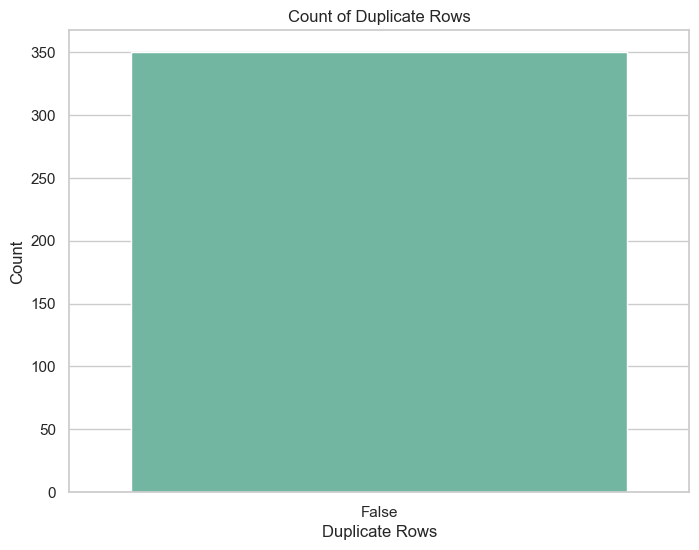

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
    plt.title("Missing Values in DataFrame")
    plt.xlabel("Columns")
    plt.ylabel("Number of Missing Values")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Check for duplicates
duplicates = merged_df.duplicated()

# Plot duplicate rows
plt.figure(figsize=(8, 6))
sns.countplot(x=duplicates, palette="Set2")
plt.title("Count of Duplicate Rows")
plt.xlabel("Duplicate Rows")
plt.ylabel("Count")
plt.show()


# Step02: EDA 

Correlation Heatmap:

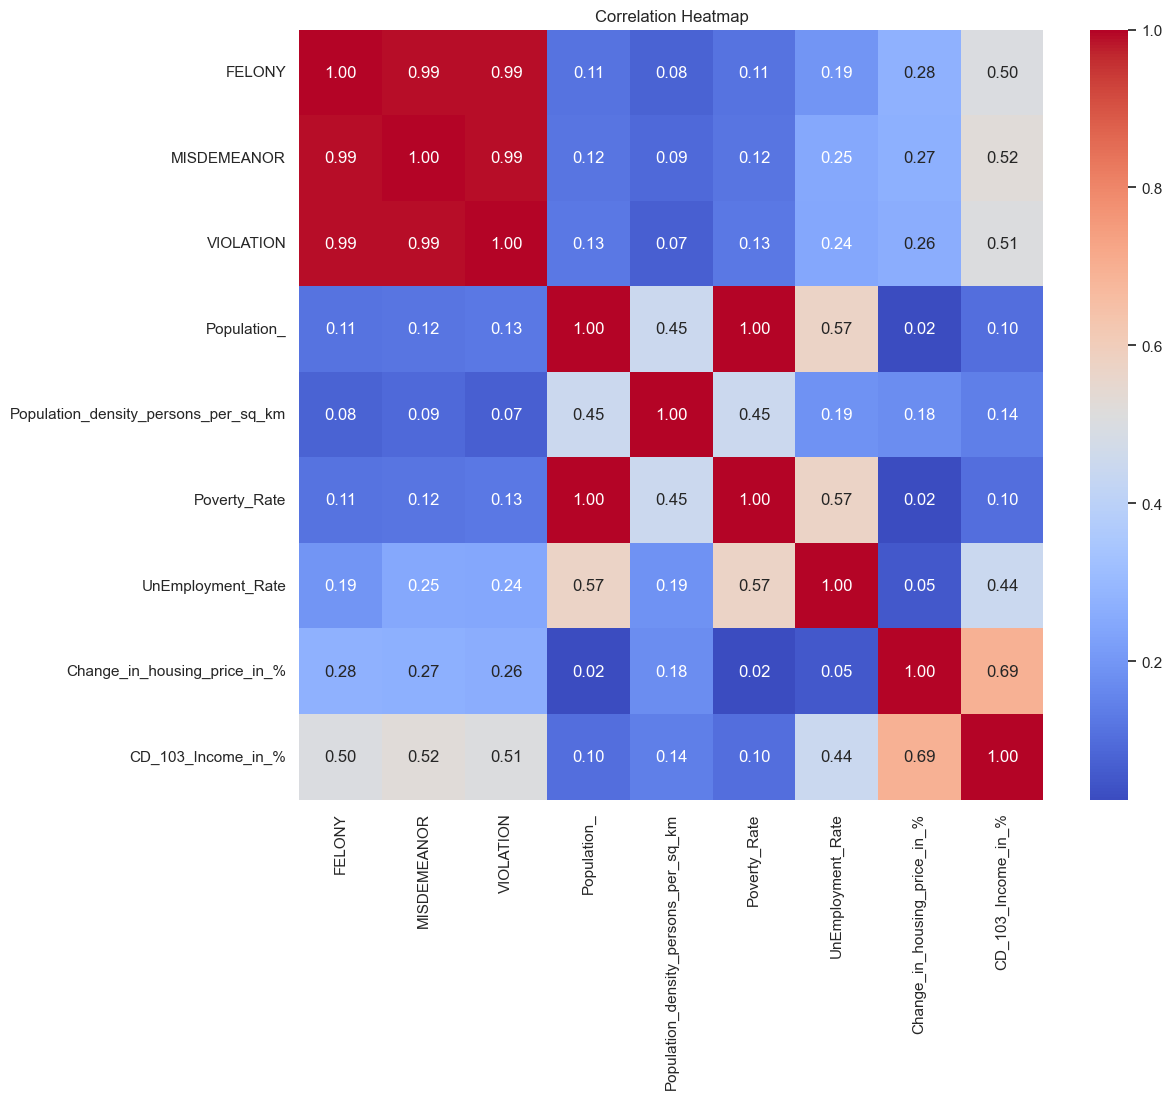

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_columns = ['FELONY', 'MISDEMEANOR', 'VIOLATION', 'Population_', 'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate', 'Change_in_housing_price_in_%', 'CD_103_Income_in_%']

# Create a correlation matrix
correlation_matrix = merged_df[correlation_columns].corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Pairplot

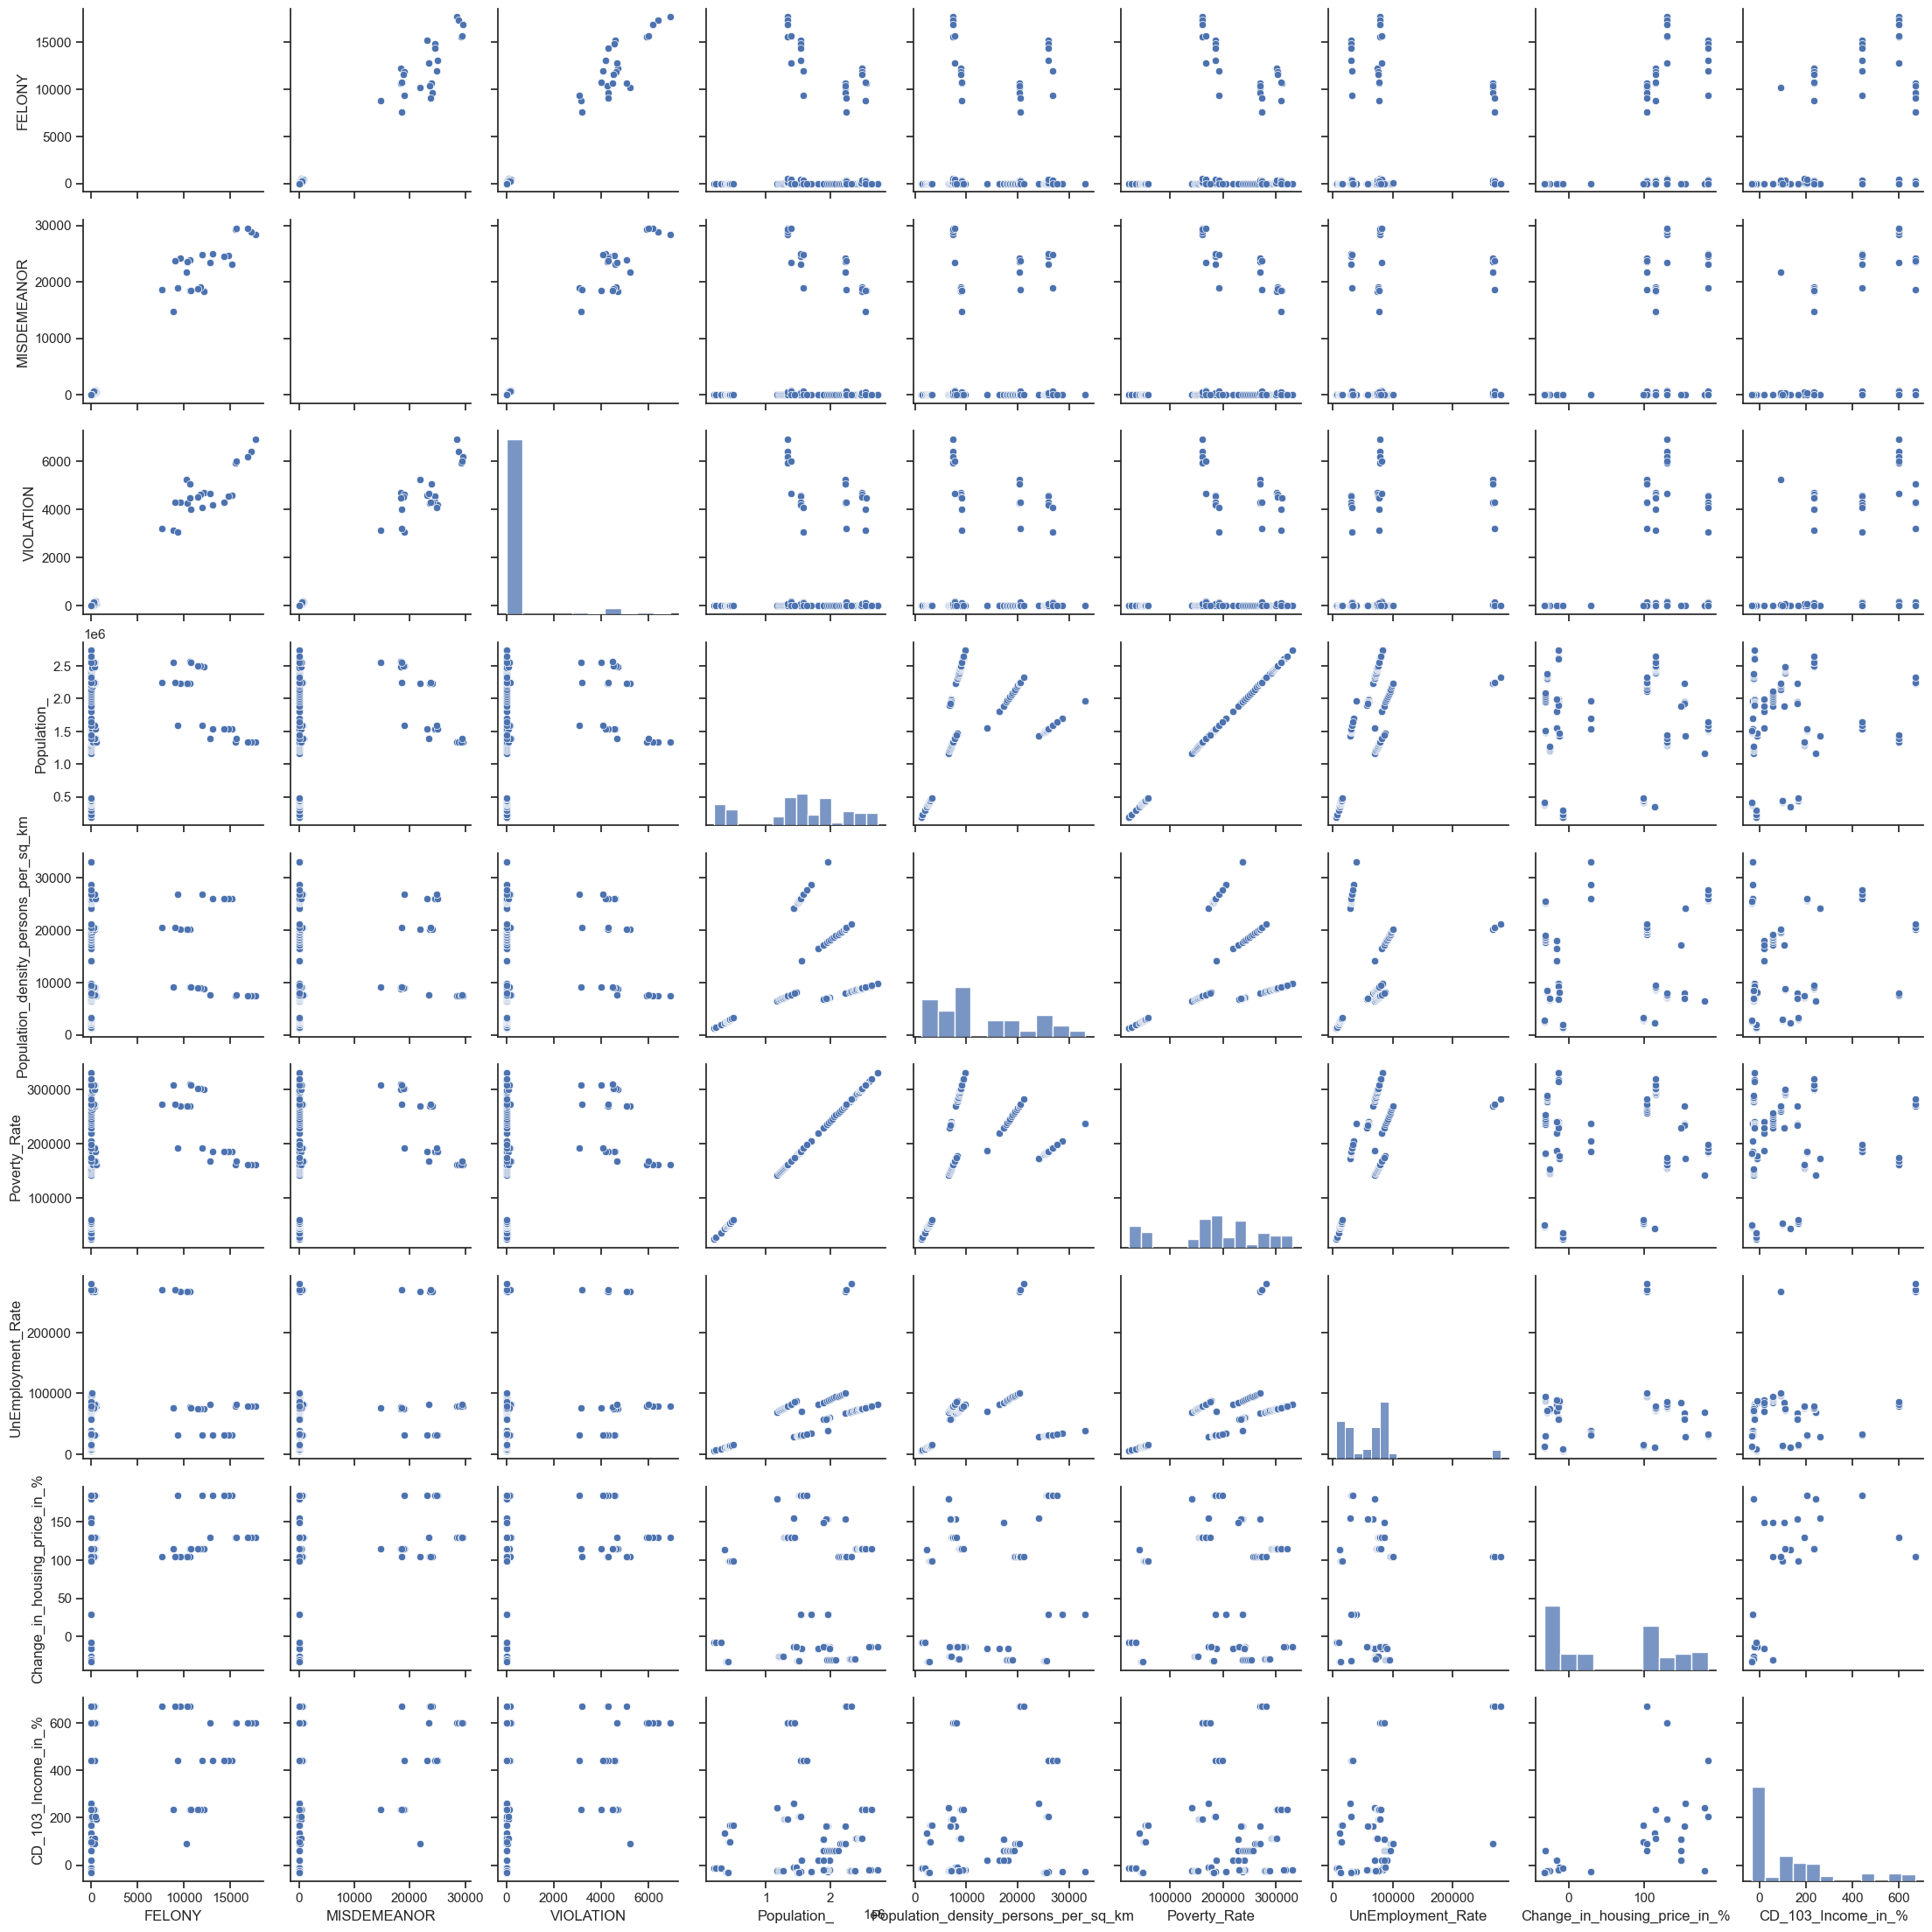

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for pairplot
pairplot_columns = ['FELONY', 'MISDEMEANOR', 'VIOLATION', 'Population_', 'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate', 'Change_in_housing_price_in_%', 'CD_103_Income_in_%']

# Create a pairplot
sns.set(style="ticks")
sns.pairplot(merged_df[pairplot_columns])
plt.show()


 Boxplots for Categorical Variables:

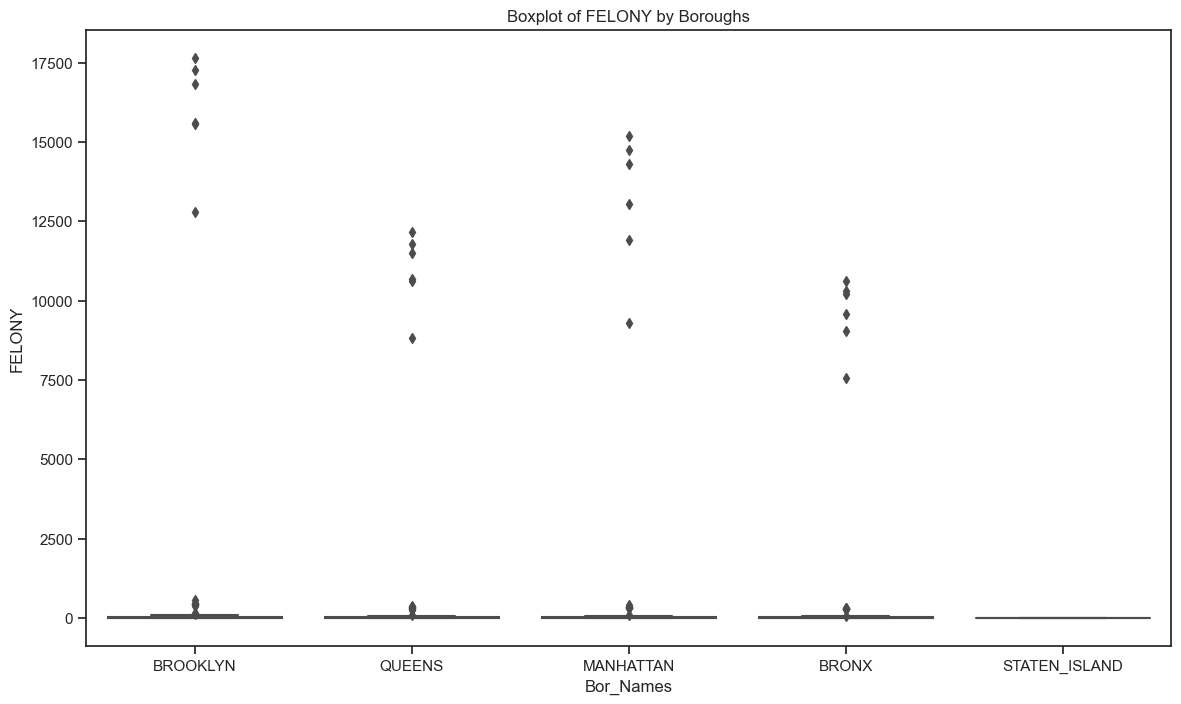

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for categorical variables
plt.figure(figsize=(14, 8))
sns.boxplot(x='Bor_Names', y='FELONY', data=merged_df)
plt.title('Boxplot of FELONY by Boroughs')
plt.show()


 Distribution Plots:

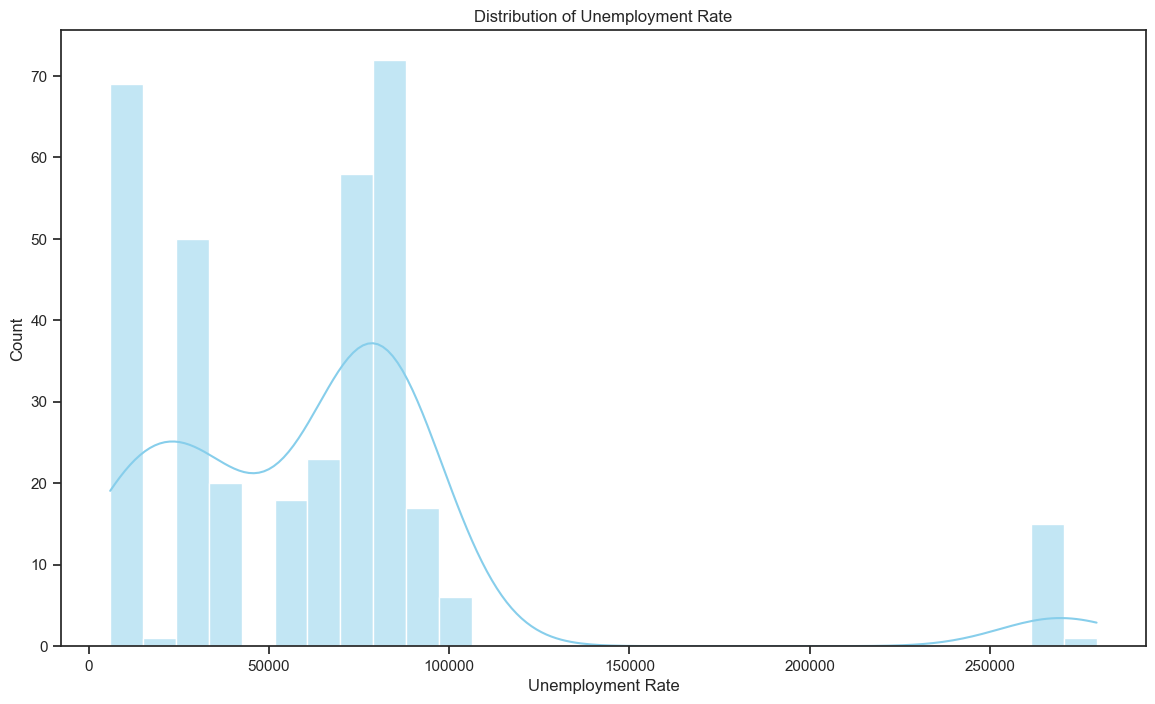

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
plt.figure(figsize=(14, 8))
sns.histplot(merged_df['UnEmployment_Rate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.show()


In [274]:
import plotly.graph_objects as go

# Assuming merged_df is your DataFrame with the specified columns
categories = ['FELONY', 'MISDEMEANOR', 'VIOLATION', 'Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+', 'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate', 'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate', 'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']
values = merged_df.loc[0, categories]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name='Category Values'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, max(values)],
    )),
  showlegend=False
)

fig.show()


In [275]:
import plotly.express as px

# Assuming df is your DataFrame with the specified columns
radar_columns = ['FELONY', 'MISDEMEANOR', 'VIOLATION', 'Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+', 'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate', 'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate', 'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']

fig = px.line_polar(merged_df, r=merged_df[radar_columns].mean(), theta=radar_columns, line_close=True)
fig.update_layout(title='Radar Chart for Crime Rates and Socio-Economic Indicators')
fig.show()


In [276]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FELONY                                350 non-null    float64
 1   MISDEMEANOR                           350 non-null    float64
 2   VIOLATION                             350 non-null    float64
 3   Latitude                              350 non-null    float64
 4   Longitude                             350 non-null    float64
 5   X_COORD_CD                            350 non-null    float64
 6   Y_COORD_CD                            350 non-null    float64
 7   Years                                 350 non-null    int64  
 8   Bor_Names                             350 non-null    object 
 9   Population_                           350 non-null    int64  
 10  Children_aged_0_15                    350 non-null    float64
 11  Working_age_16_64  

In [277]:
import plotly.express as px

# Assuming merged_df is your DataFrame with Latitude, Longitude, and other relevant columns
fig = px.scatter(
    merged_df,
    x='Longitude',
    y='Latitude',
    color='FELONY',  # You can change this to other crime categories
    size='FELONY',  # You can change this to other crime categories
    color_continuous_scale='Viridis',  # Choose a color scale
    size_max=15,  # Adjust the maximum marker size
    opacity=0.7,  # Set marker opacity
    labels={'FELONY': 'Felony Rate'},
    hover_name='Bor_Names',  # Replace with the actual column name containing borough names
    title='Crime Rates Across New York Boroughs',
)

fig.show()


# 3. MODEL BUILDING

# MODEL 01: LINEAR REGRESSION MODEL

Mean Squared Error: 9564238.036520848
R-squared: 0.38316551445891084


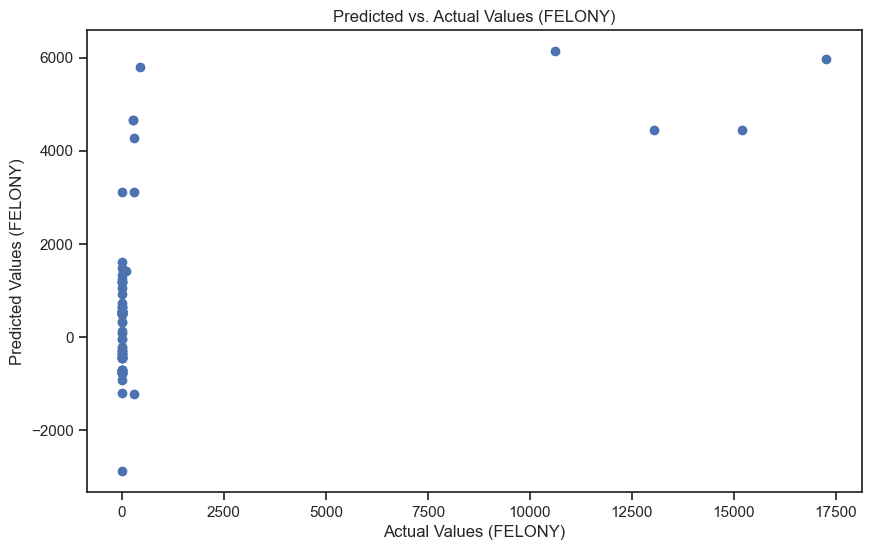

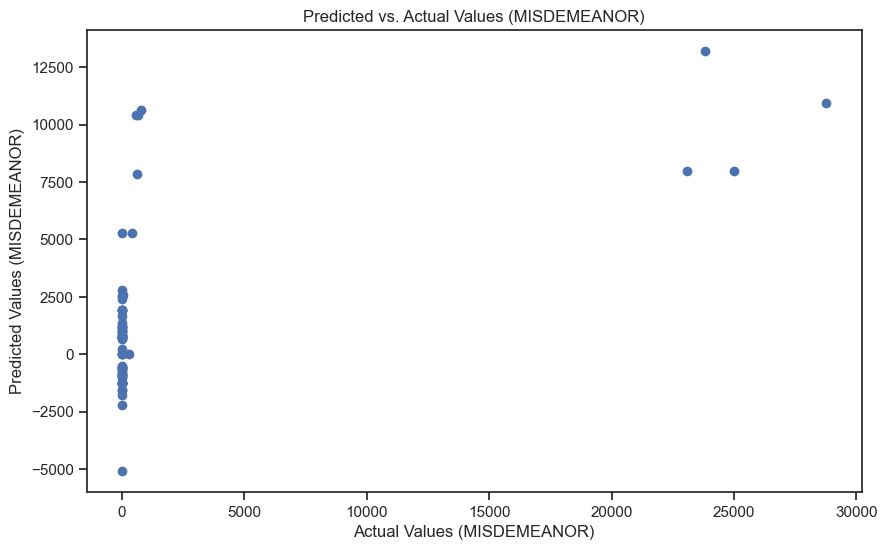

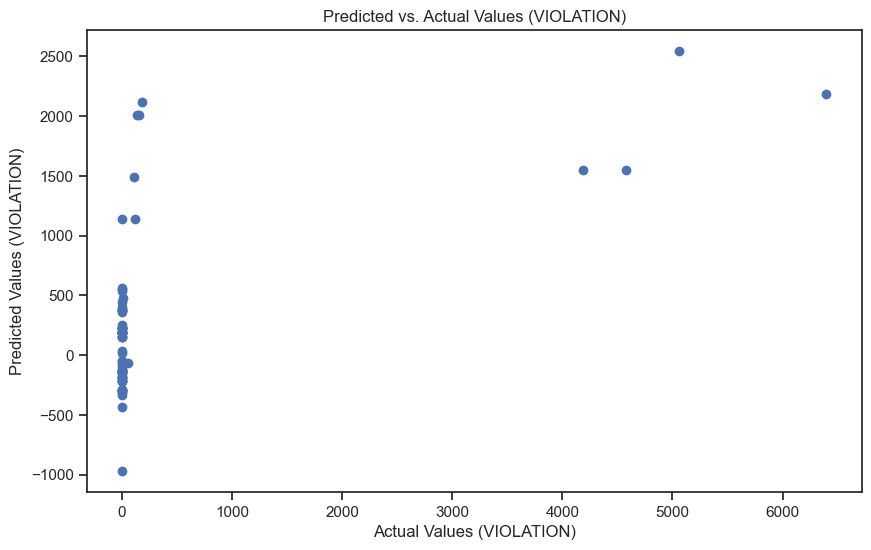


Feature Importance:
                                 Feature   Importance
2                      Working_age_16_64  1471.912420
1                     Children_aged_0_15   441.291631
8                     CD_103_Income_in_%    12.677766
9                         Education_Rate     0.000488
6                      UnEmployment_Rate    -0.011757
4   Population_density_persons_per_sq_km    -0.017130
7           Change_in_housing_price_in_%   -10.205497
10                             Doctorate   -12.810887
16                                  None   -24.767716
11                          Professional   -25.621775
14                             Associate   -54.659786
12                               Masters   -88.822153
5                           Poverty_Rate  -103.341158
13                             Bachelors  -181.914601
15                            HighSchool  -204.974198
3                  Older_people_aged_65+  -658.448402
0                            Population_  -854.059159


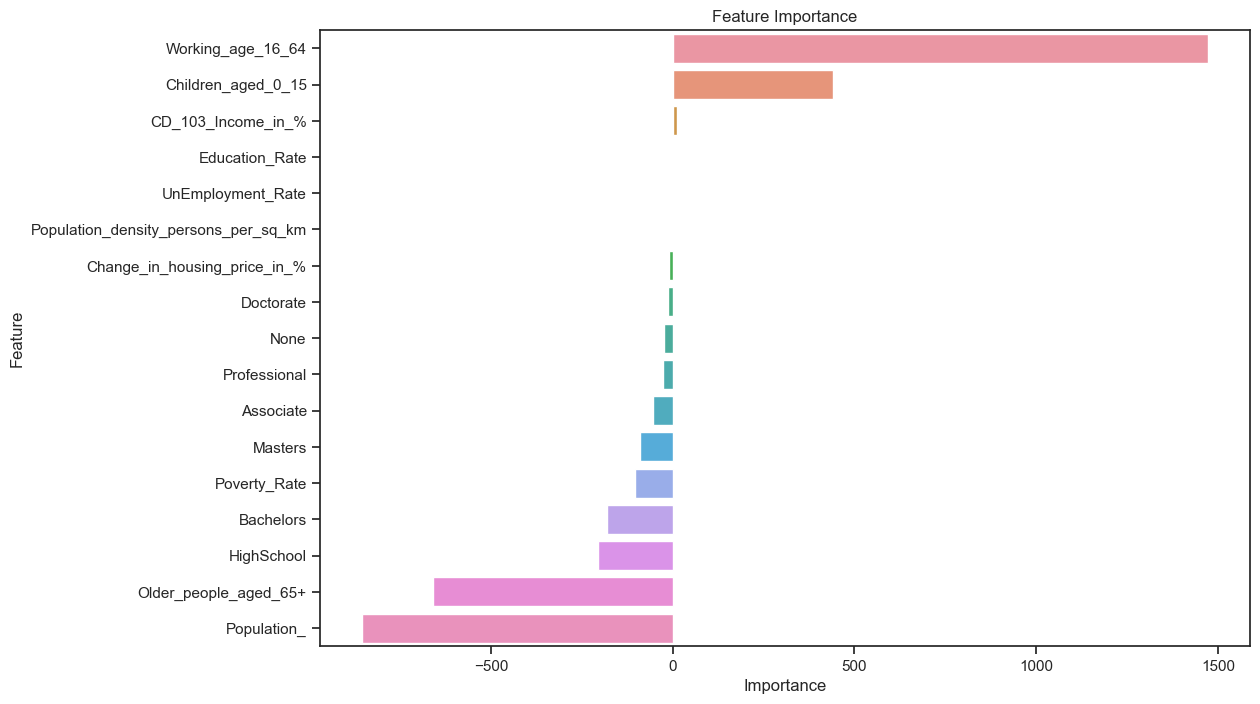

In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the relevant columns
# Select features and target variable
features = ['Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
            'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
            'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
            'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']

target = ['FELONY', 'MISDEMEANOR', 'VIOLATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs. actual values for each target variable
for target_variable in target:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[target_variable].values, y_pred[:, target.index(target_variable)])
    plt.xlabel(f'Actual Values ({target_variable})')
    plt.ylabel(f'Predicted Values ({target_variable})')
    plt.title(f'Predicted vs. Actual Values ({target_variable})')
    plt.show()

# Print feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('\nFeature Importance:')
print(feature_importance)

# If you want to plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


IMPROVING THE ACCURACY



3.1 FEATURE ENGINEERING

Feature Engineering:
Interaction Terms:

Create interaction terms by multiplying two or more features that might have a combined effect on the target variable.
Polynomial Features:

Consider adding polynomial features to capture nonlinear relationships.
Log Transformation:

Apply log transformation to features or the target variable if they have a skewed distribution.

In [279]:
import numpy as np

# Feature Engineering
merged_df['InteractionTerm'] = merged_df['Population_density_persons_per_sq_km'] * merged_df['Change_in_housing_price_in_%']
merged_df['SquaredPopulation'] = np.square(merged_df['Population_'])

# Log Transformation
merged_df['LogPopulation'] = np.log1p(merged_df['Population_'])

# Update the features list
features = ['Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
            'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
            'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
            'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None',
            'InteractionTerm', 'SquaredPopulation', 'LogPopulation']


3.2 REMOVING OUTLIERS

Outlier Handling:
Visualization:

Use box plots or scatter plots to visualize the distribution of each feature and identify potential outliers.
Z-Score or Standard Deviation:

Remove data points that fall outside a certain number of standard deviations from the mean.
IQR (Interquartile Range):

Remove data points that fall outside a certain range defined by the IQR.
Here's an example of how you might handle outliers using the Z-score:

In [280]:
from scipy.stats import zscore

# Calculate Z-scores for each feature
z_scores = zscore(merged_df[features])

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Identify and remove outliers
merged_df_no_outliers = merged_df[(np.abs(z_scores) < threshold).all(axis=1)]


3.3 Min-Max Scaling:

In [281]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected features
merged_df[features] = min_max_scaler.fit_transform(merged_df[features])


3.4 Standard Scaling (Z-score Normalization):

In [282]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
standard_scaler = StandardScaler()

# Apply Standard Scaling to the selected features
merged_df[features] = standard_scaler.fit_transform(merged_df[features])


APPLYING THE MODEL NOW ONCE AGAIN

Target Variable: FELONY
Mean Squared Error: 6862227.87015964
R-squared: 0.37119702031954094


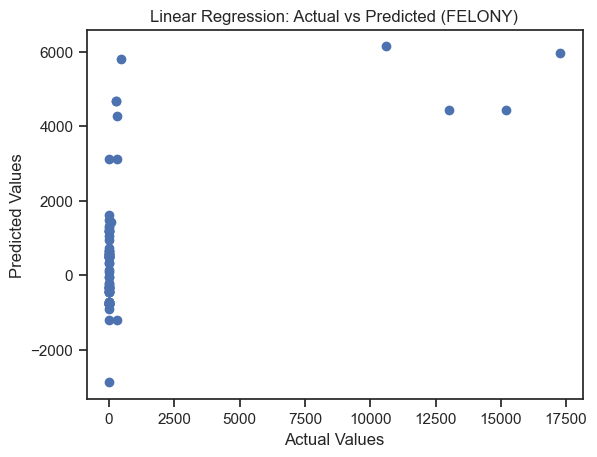

Target Variable: MISDEMEANOR
Mean Squared Error: 20968637.09052399
R-squared: 0.3884766455850538


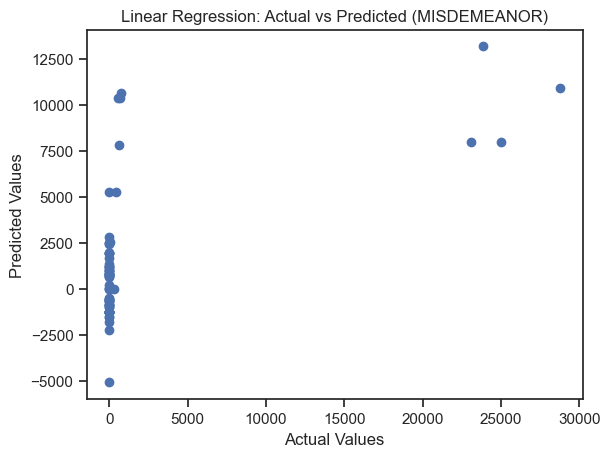

Target Variable: VIOLATION
Mean Squared Error: 861849.1482317938
R-squared: 0.3898228775321646


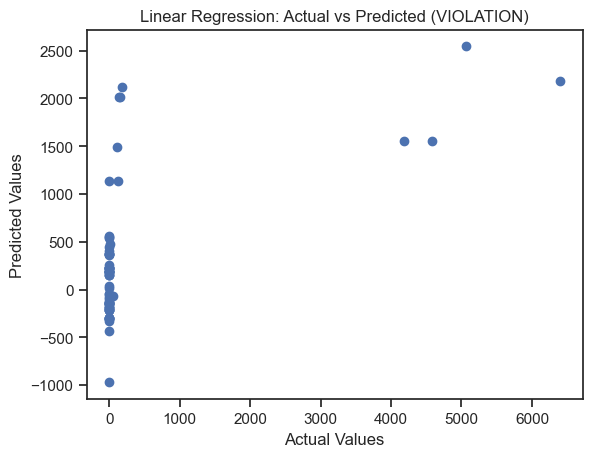

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'FELONY', 'MISDEMEANOR', and 'VIOLATION' are your target variables
target_variables = ['FELONY', 'MISDEMEANOR', 'VIOLATION']

# Assuming 'Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
# 'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
# 'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
# 'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None'
# are your features
features = ['Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
            'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
            'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
            'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']

# Loop through each target variable
for target_variable in target_variables:
    # Extract the target variable
    y = merged_df[target_variable]
    
    # Extract the features
    X = merged_df[features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the linear regression model
    model = LinearRegression()

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Target Variable: {target_variable}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plotting predictions vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Linear Regression: Actual vs Predicted ({target_variable})")
    plt.show()


# MODEL 02: RANDOM FOREST

Mean Squared Error: 1352772.031664056
R-squared: 0.9115046457487485


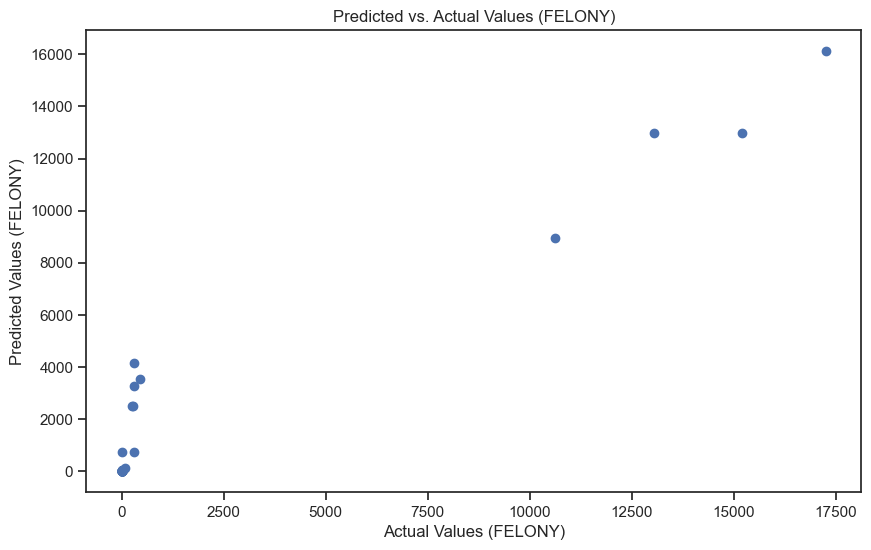

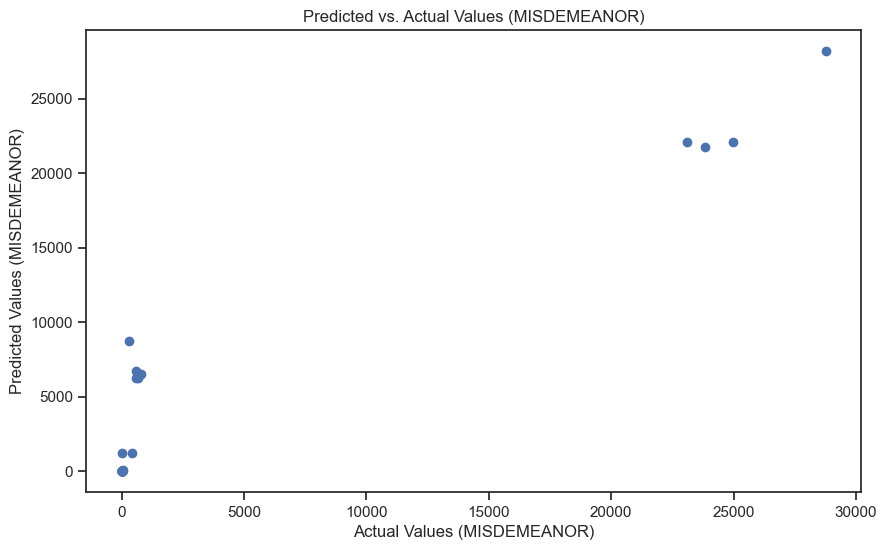

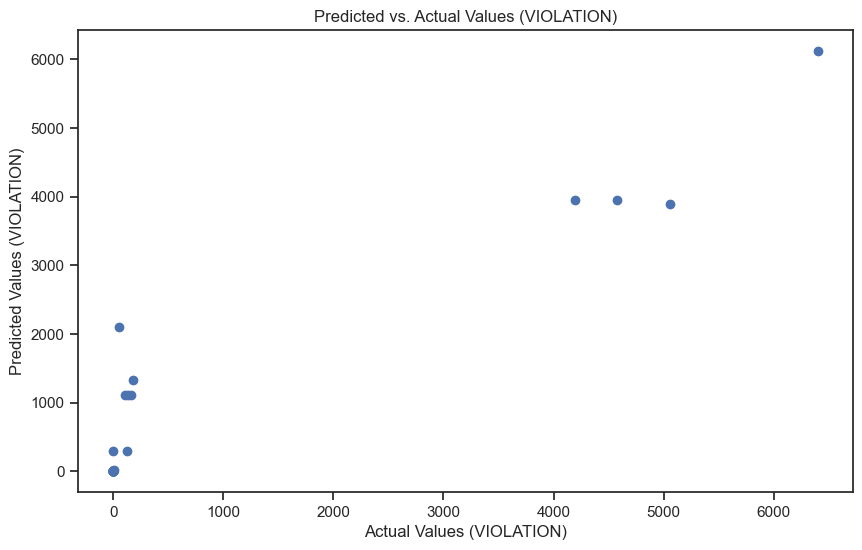


Feature Importance:
                                 Feature  Importance
8                     CD_103_Income_in_%    0.408206
6                      UnEmployment_Rate    0.154288
4   Population_density_persons_per_sq_km    0.065170
14                             Associate    0.035475
10                             Doctorate    0.031109
7           Change_in_housing_price_in_%    0.030001
0                            Population_    0.028066
9                         Education_Rate    0.027078
15                            HighSchool    0.027072
2                      Working_age_16_64    0.025739
5                           Poverty_Rate    0.025734
12                               Masters    0.025418
13                             Bachelors    0.025067
3                  Older_people_aged_65+    0.024329
16                                  None    0.023387
1                     Children_aged_0_15    0.022941
11                          Professional    0.020920


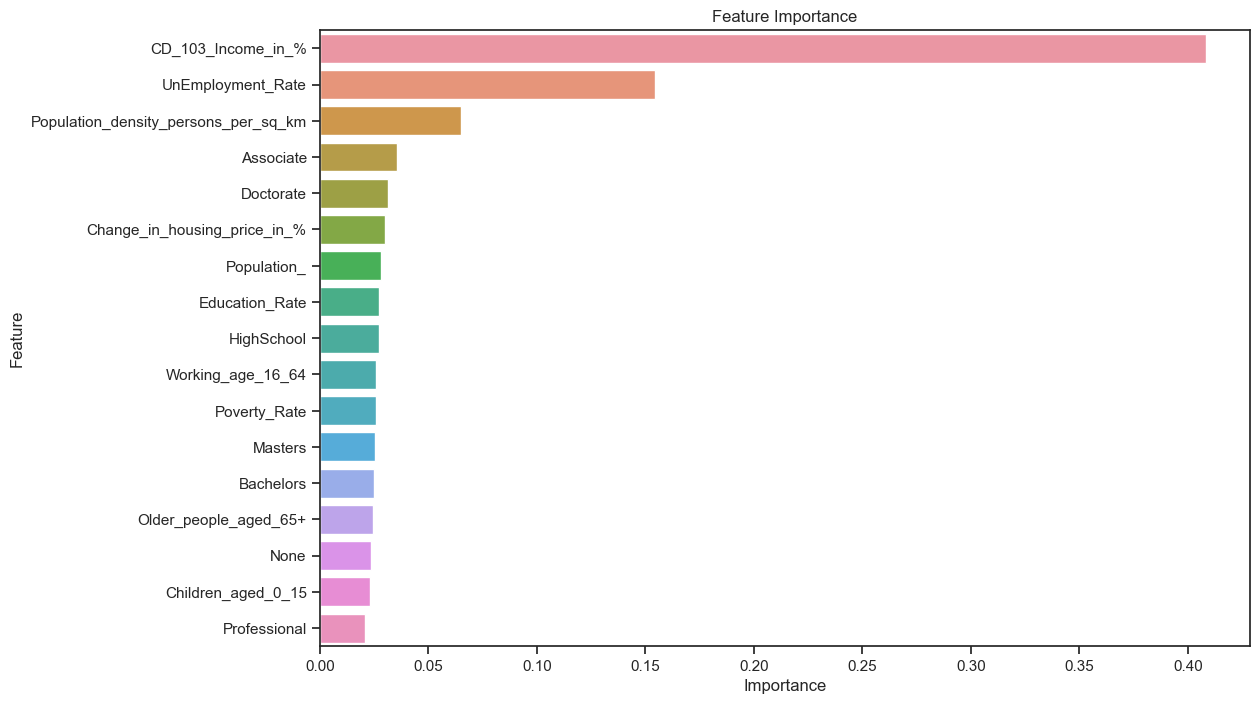

In [284]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the relevant columns
# Select features and target variable
features = ['Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
            'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
            'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
            'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']

target = ['FELONY', 'MISDEMEANOR', 'VIOLATION']  # Replace with the actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs. actual values for each target variable
for target_variable in target:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[target_variable].values, y_pred[:, target.index(target_variable)])
    plt.xlabel(f'Actual Values ({target_variable})')
    plt.ylabel(f'Predicted Values ({target_variable})')
    plt.title(f'Predicted vs. Actual Values ({target_variable})')
    plt.show()


# Print feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('\nFeature Importance:')
print(feature_importance)

# If you want to plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


CHECKING THE ACCURACY BY INCREASING THE TREES

Mean Squared Error: 1450358.8196453087
R-squared: 0.9044198686355589


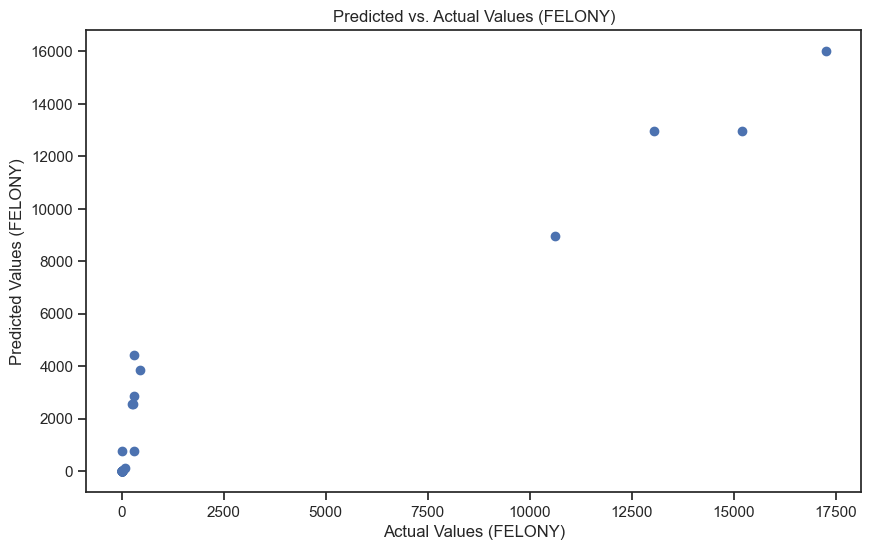

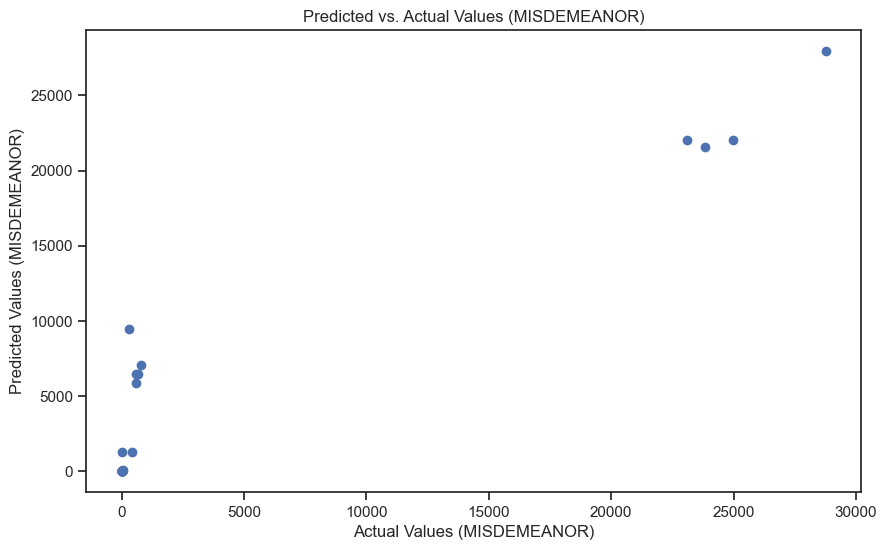

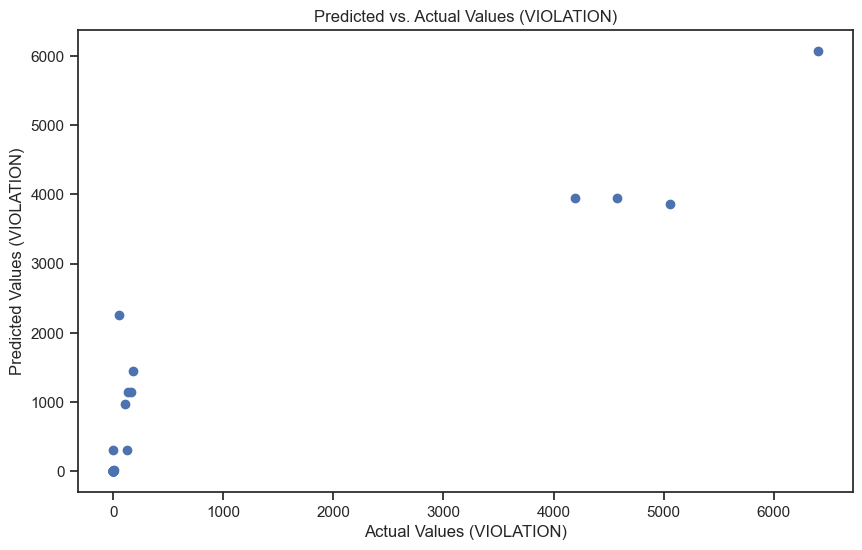


Feature Importance:
                                 Feature  Importance
8                     CD_103_Income_in_%    0.418279
6                      UnEmployment_Rate    0.157884
4   Population_density_persons_per_sq_km    0.068493
2                      Working_age_16_64    0.027365
5                           Poverty_Rate    0.026598
16                                  None    0.026542
13                             Bachelors    0.026038
14                             Associate    0.025894
10                             Doctorate    0.025785
12                               Masters    0.025650
9                         Education_Rate    0.025558
0                            Population_    0.025505
15                            HighSchool    0.025473
11                          Professional    0.025263
1                     Children_aged_0_15    0.025210
3                  Older_people_aged_65+    0.025093
7           Change_in_housing_price_in_%    0.019369


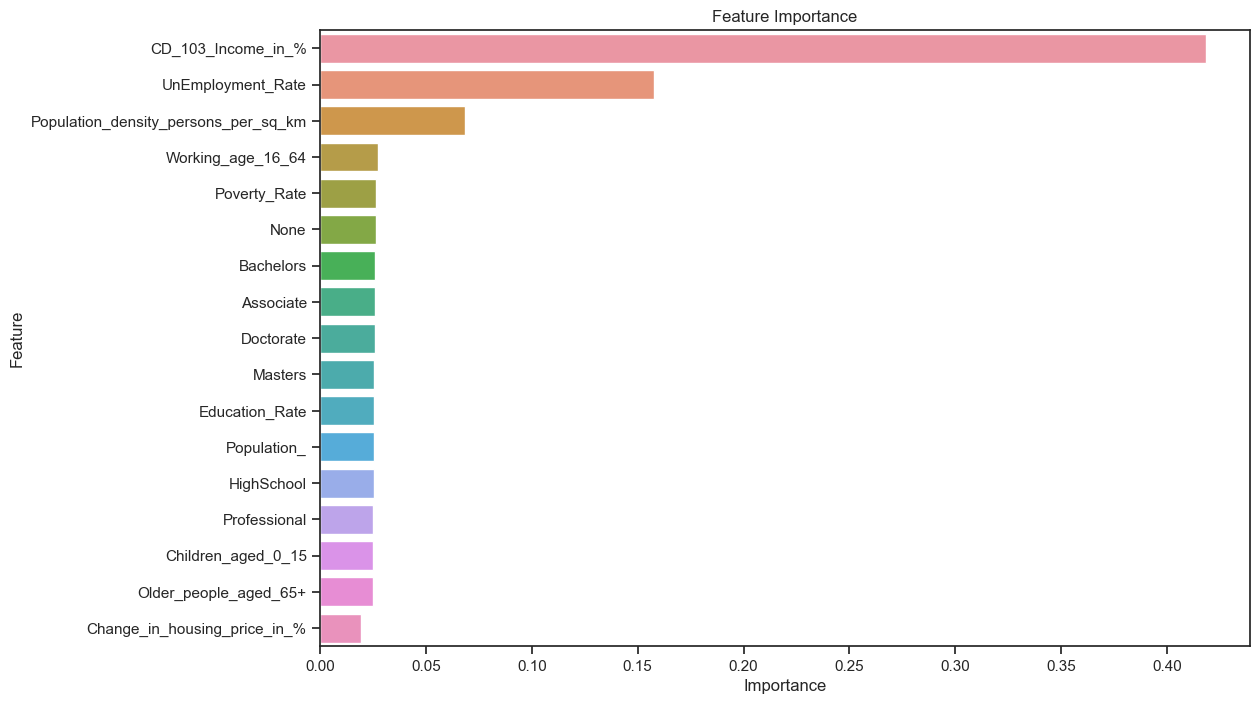

In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the relevant columns
# Select features and target variable
features = ['Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
            'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
            'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
            'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']

target = ['FELONY', 'MISDEMEANOR', 'VIOLATION']  # Replace with the actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor model with more trees (e.g., 200)
model = RandomForestRegressor(n_estimators=10000, random_state=55)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs. actual values for each target variable
for target_variable in target:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test[target_variable].values, y_pred[:, target.index(target_variable)])
    plt.xlabel(f'Actual Values ({target_variable})')
    plt.ylabel(f'Predicted Values ({target_variable})')
    plt.title(f'Predicted vs. Actual Values ({target_variable})')
    plt.show()

# Print feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('\nFeature Importance:')
print(feature_importance)

# If you want to plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


# MODEL 3: ORDINARY LEAST SQUARE (OLS) REGRESSION MODEL


Summary for OLS Model - Target: FELONY
                            OLS Regression Results                            
Dep. Variable:                 FELONY   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     12.93
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           4.01e-17
Time:                        21:09:53   Log-Likelihood:                -2605.6
No. Observations:                 280   AIC:                             5231.
Df Residuals:                     270   BIC:                             5267.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

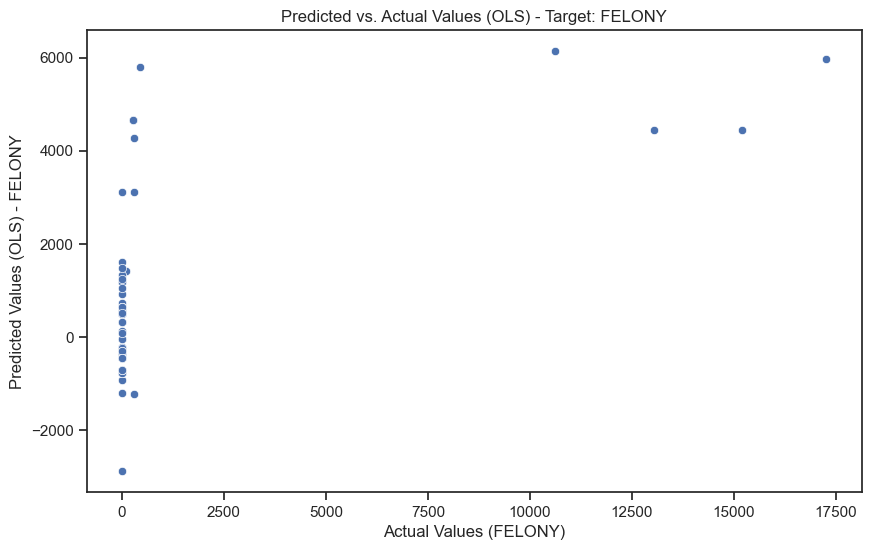


Summary for OLS Model - Target: MISDEMEANOR
                            OLS Regression Results                            
Dep. Variable:            MISDEMEANOR   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     14.04
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.56e-18
Time:                        21:09:53   Log-Likelihood:                -2776.2
No. Observations:                 280   AIC:                             5572.
Df Residuals:                     270   BIC:                             5609.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

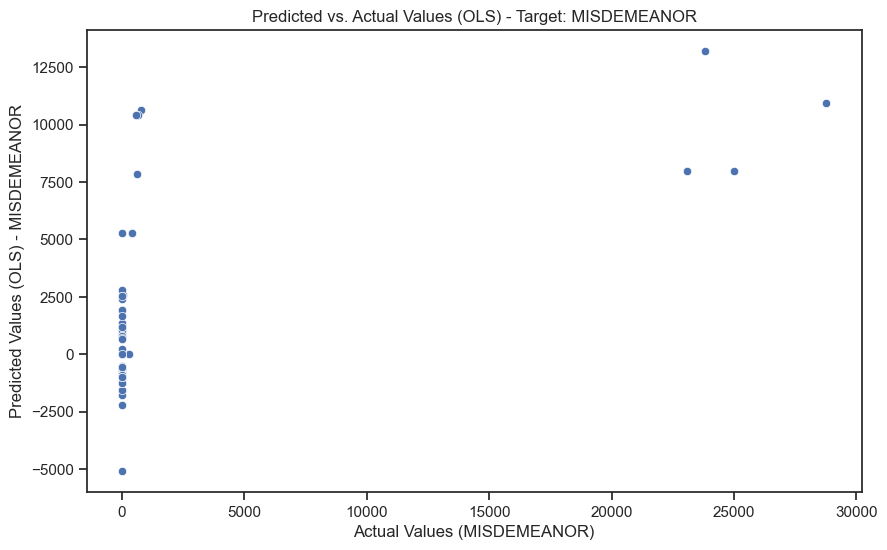


Summary for OLS Model - Target: VIOLATION
                            OLS Regression Results                            
Dep. Variable:              VIOLATION   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     12.60
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.07e-16
Time:                        21:09:53   Log-Likelihood:                -2336.8
No. Observations:                 280   AIC:                             4694.
Df Residuals:                     270   BIC:                             4730.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

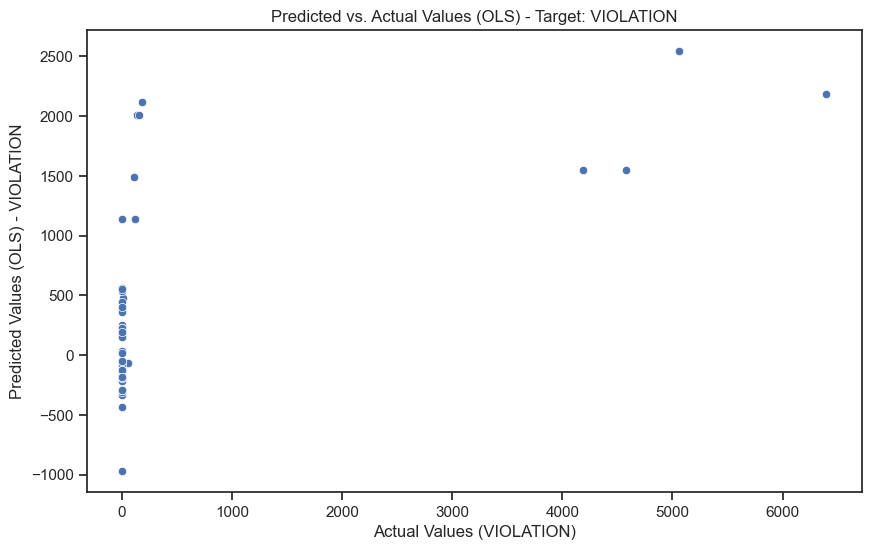

In [286]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the relevant columns
# Select features and target variables
features = ['Population_', 'Children_aged_0_15', 'Working_age_16_64', 'Older_people_aged_65+',
            'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate',
            'Change_in_housing_price_in_%', 'CD_103_Income_in_%', 'Education_Rate',
            'Doctorate', 'Professional', 'Masters', 'Bachelors', 'Associate', 'HighSchool', 'None']

targets = ['FELONY', 'MISDEMEANOR', 'VIOLATION']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[targets], test_size=0.2, random_state=42)

# Build separate OLS models for each target
ols_models = {}
for target in targets:
    # Add a constant term to the independent variables (X_train)
    X_train_with_const = sm.add_constant(X_train)
    
    # Initialize and fit the OLS model
    ols_model = sm.OLS(y_train[target], X_train_with_const)
    ols_results = ols_model.fit()
    ols_models[target] = ols_results
    
    # Print summary statistics of the model
    print(f"\nSummary for OLS Model - Target: {target}")
    print(ols_results.summary())

    # Make predictions on the test set
    X_test_with_const = sm.add_constant(X_test)
    y_pred_ols = ols_results.predict(X_test_with_const)

    # Evaluate the OLS model
    mse_ols = mean_squared_error(y_test[target], y_pred_ols)
    r2_ols = r2_score(y_test[target], y_pred_ols)

    print(f'Mean Squared Error (OLS) - Target: {target}: {mse_ols}')
    print(f'R-squared (OLS) - Target: {target}: {r2_ols}')

    # Plot the predicted vs. actual values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test[target], y=y_pred_ols)
    plt.xlabel(f'Actual Values ({target})')
    plt.ylabel(f'Predicted Values (OLS) - {target}')
    plt.title(f'Predicted vs. Actual Values (OLS) - Target: {target}')
    plt.show()


# 5.GEOSPATIAL ANALYSIS OF NEW YORK CITY

create separate maps for each target variable. Here's a basic example using the longitude and latitude information available in your dataset

In [287]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FELONY                                350 non-null    float64
 1   MISDEMEANOR                           350 non-null    float64
 2   VIOLATION                             350 non-null    float64
 3   Latitude                              350 non-null    float64
 4   Longitude                             350 non-null    float64
 5   X_COORD_CD                            350 non-null    float64
 6   Y_COORD_CD                            350 non-null    float64
 7   Years                                 350 non-null    int64  
 8   Bor_Names                             350 non-null    object 
 9   Population_                           350 non-null    float64
 10  Children_aged_0_15                    350 non-null    float64
 11  Working_age_16_64  

In [288]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'merged_df' is your original DataFrame
# Select relevant features for X and y
spatial_features = ['Latitude', 'Longitude', 'Population_density_persons_per_sq_km', 'Poverty_Rate', 'UnEmployment_Rate']
X = merged_df[spatial_features]
y = merged_df['Bor_Names']

# Encode borough names to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_mapping = {label: boro_name for label, boro_name in zip(y_encoded, y)}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Create a Folium map centered on New York City
crime_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create MarkerCluster for true crime locations
marker_cluster_true = MarkerCluster().add_to(crime_map)

# Reset the index of X_test
X_test.reset_index(drop=True, inplace=True)

# Plot true crime locations on the map
for index, row in X_test.iterrows():
    true_label = label_mapping[y_test[index]]
    
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=true_label,
                  icon=folium.Icon(color='green')).add_to(marker_cluster_true)

# Create MarkerCluster for predicted crime locations
marker_cluster_pred = MarkerCluster().add_to(crime_map)

# Plot predicted crime locations on the map
for index, row in X_test.iterrows():
    pred_label = label_mapping[knn_classifier.predict([row])[0]]
    
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=pred_label,
                  icon=folium.Icon(color='red')).add_to(marker_cluster_pred)

# Display the map
crime_map


c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Us